In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
import re
import os
from variableUtils import *
import variableUtils
from Utils import *
from ClassUtils import *
from pprint import pprint
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from reportlab.lib.pagesizes import letter, landscape, A4, A3
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, PageBreak, Paragraph, Spacer, Image
from reportlab.lib import colors
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.platypus import Paragraph, Spacer, KeepTogether, KeepInFrame
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch

from openpyxl import load_workbook
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import FormulaRule

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(sns.__version__)


{1616604, 1625702, 1616364}
Student ID
1600923    3
1605390    3
1608030    2
1615593    2
1605779    2
1610017    2
1637288    2
1606077    2
1615333    2
1466081    2
1352051    2
1639983    2
1472831    2
1615131    2
1637313    2
1606071    2
1606153    2
1430664    2
1617587    2
1617738    2
1146177    2
1461457    2
1594958    2
1615261    2
1617958    2
1624825    2
1473072    2
1625191    2
1606158    2
1605793    2
1625104    2
1616618    2
1617334    2
1617003    2
1594851    2
1605538    2
1616141    2
1606096    2
1617304    2
1616745    2
1321463    2
1535538    2
1625619    2
1605677    2
1634259    2
1617495    1
1605480    1
Name: count, dtype: int64

Aggregating data...


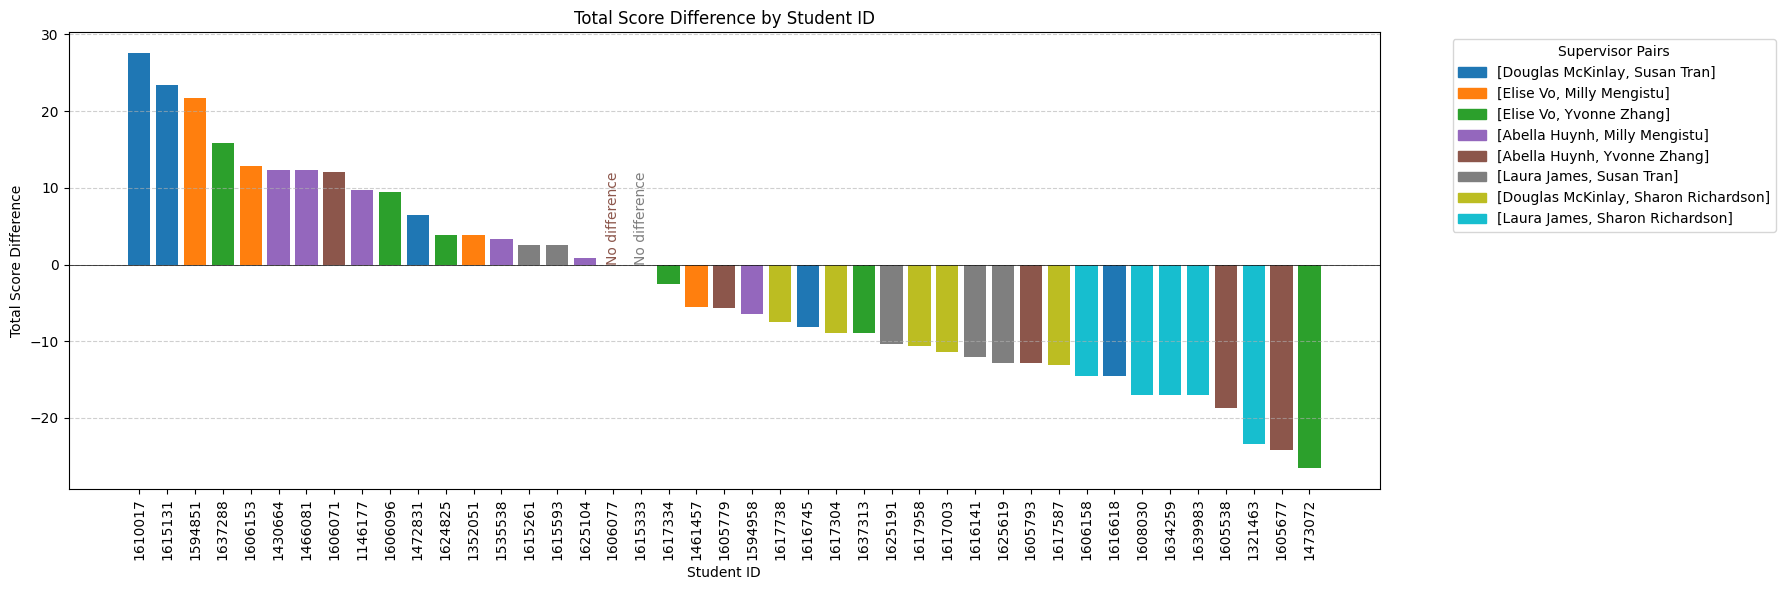

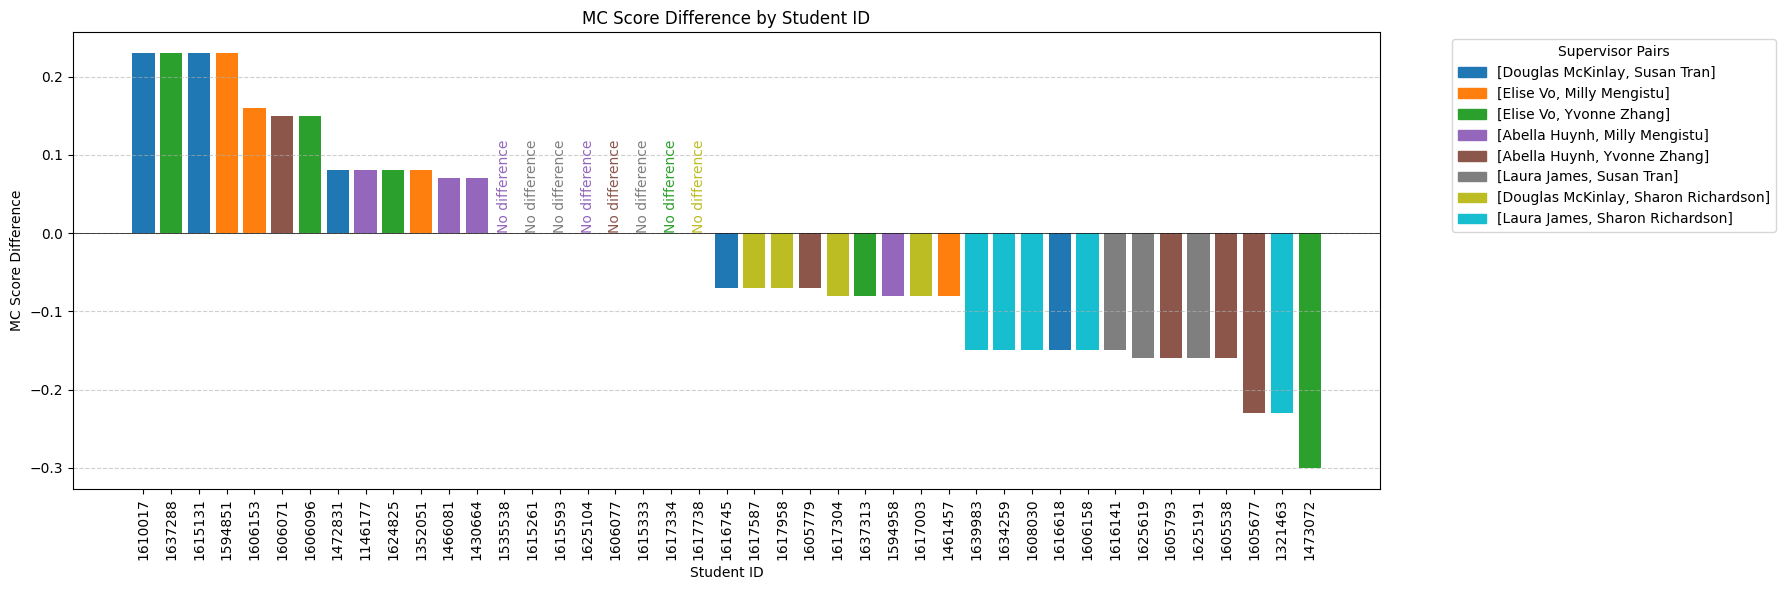

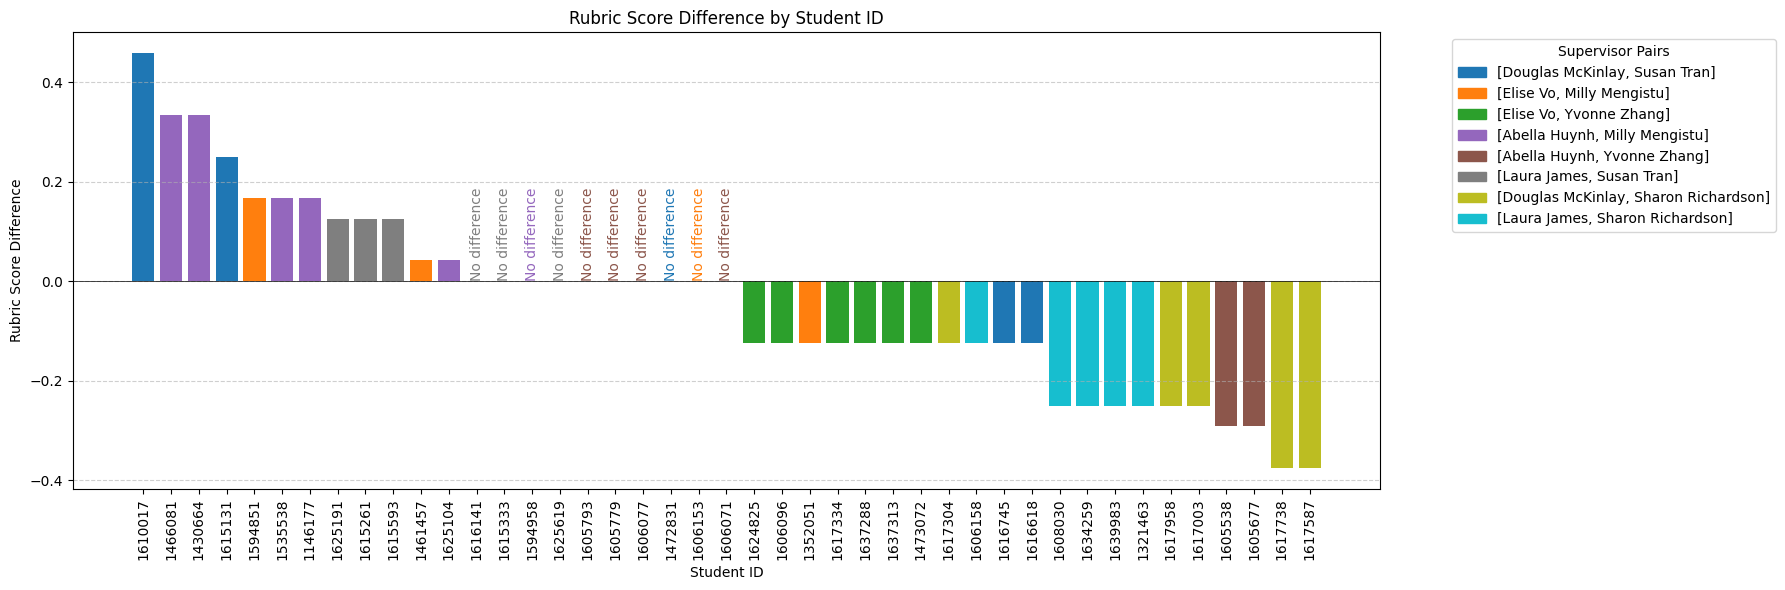

,Student ID,Supervisor Pair,MC Score Difference,Rubric Score Difference,Total Score Difference
21,1610017,"[Douglas McKinlay, Susan Tran]",0.23,0.458333,27.566667
22,1615131,"[Douglas McKinlay, Susan Tran]",0.23,0.250000,23.400000
9,1594851,"[Elise Vo, Milly Mengistu]",0.23,0.166667,21.733333
40,1637288,"[Elise Vo, Yvonne Zhang]",0.23,-0.125000,15.900000
18,1606153,"[Elise Vo, Milly Mengistu]",0.16,0.000000,12.800000
3,1430664,"[Abella Huynh, Milly Mengistu]",0.07,0.333333,12.266667
5,1466081,"[Abella Huynh, Milly Mengistu]",0.07,0.333333,12.266667
15,1606071,"[Abella Huynh, Yvonne Zhang]",0.15,0.000000,12.000000
0,1146177,"[Abella Huynh, Milly Mengistu]",0.08,0.166667,9.733333
17,1606096,"[Elise Vo, Yvonne Zhang]",0.15,-0.125000,9.500000


,532_MC13,ES-1,TS-1,532_MC1,TS-2,532_MC6,ES-2,TS-3,532_MC12,532_MC8,532_MC7,532_MC10,532_MC4,532_MC5,532_MC3,532_MC9,532_MC2,ES-3,532_MC11,ES-4,Finished,Date,Student Given Name,Student Family Name,Student ID,Examiners,Critical incident,CI Details,TS,ES,Supervisor comments,MC Score,Rubric Score,Total,Total CE Penalty 20%
11,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,True,5 Nov 2024,Chuling,Li,1594851,Milly Mengistu,Yes,"Caries remaining at DEJ, >1mm along DEJ\nEvide...",2,2,Thanks Chuling. Your initial restoration had a...,0.46,0.583333,48.466667,38.773333
58,1,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,True,5 Nov 2024,Vianna,Tran,1605390,Elise Vo,Yes,Excessive removal or caries close to pulp (exp...,3,1,Good effort today.\nThe occlusal portion of yo...,0.31,0.625,37.3,29.84
50,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,True,5 Nov 2024,Daniella,Icho Malak,1146177,Abella Huynh,Yes,Excessive removal or caries close to pulp (exp...,2,1,Restoration has poor aesthetics; with overhang...,0.31,0.458333,33.966667,27.173333
75,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,True,5 Nov 2024,Daniella,Icho Malak,1146177,Milly Mengistu,Yes,Excessive removal or caries close to pulp (exp...,1,1,Thanks Daniella. A few areas to work on around...,0.23,0.291667,24.233333,19.386667
Column Total,94,94,94,93,90,86,83,82,78,77,74,74,73,70,69,67,67,41,37,9,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,73.77,<NA>,NaN,NaN


In [43]:
workbookpath = 'BOH1\EOY Restorative\data.xlsx'
folder, filename, ext = getFolderandFileName(workbookpath)
df = pd.read_excel(workbookpath, sheet_name='Sheet1')
rubricQues = ['TS', 'ES']
mcCols = [col for col in df.columns if 'MC' in col]
df[colCEReason] = df[['Q2.6_6', 'Q2.6_7', 'Q2.6_8', 'Q2.6_9', 'Q2.6_10', 'CI Details']].apply(lambda x: '\n'.join(x.dropna().astype(str)), axis=1)
df.drop(['Q2.6_6', 'Q2.6_7', 'Q2.6_8', 'Q2.6_9', 'Q2.6_10'], axis=1, inplace=True)
# df.to_excel(workbookpath, sheet_name='Sheet1', index=False) 
fullTextDict = {col: df.loc[0, col] for col in mcCols}
df = df.drop([0], axis=0)
df[colId] = df[colId].astype(int)
studenList = getStudentList(cohort = 'BOH1 (2024)')
# find the missing students
missingStudents = set(studenList) - set(df[colId].unique())
print(missingStudents)
print(df[colId].value_counts())
students = df[colId].unique()
for col in mcCols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
newRubricQues = set()
df.sort_values(by=[colId, 'Examiners'], inplace=True)
dfAgg = aggregator(df, mcCols, colCE, colCEReason, [colComments], 'Examiners')
df = vectoriseRubricQues(df, rubricQues, newRubricQues)
dfAgg = vectoriseRubricQues(dfAgg, rubricQues, newRubricQues)
# get a total of columns in mcCols and newRubricQues
calcCols = mcCols + list(newRubricQues)
df.loc['Column Total'] = df[calcCols].sum(numeric_only=True, axis=0)

# sort based on the total
df = df.sort_values(by='Column Total', axis=1, ascending=False)
df['MC Score'] = (df[mcCols].sum(axis=1)/len(mcCols)).round(2)
rubricW = { 'TS': .1, 'ES': .1}
rubricDenom = { 'TS': 3, 'ES': 4}
df['Rubric Score'] = df.apply(lambda row: sum((row[ques]/rubricDenom[ques]) * rubricW[ques] for ques in rubricQues), axis=1)/sum(rubricW.values())
df['Rubric Score'] = df['Rubric Score'].round(2)    
df['Total'] = ((df['MC Score']*0.8 + df['Rubric Score']*0.2)*100).round(2)
df['Total CE Penalty 20%'] = df['Total']*df[colCE].apply(lambda x: 0.8 if x == 'Yes' else 1)
df['Total CE Penalty 20%'] = df['Total CE Penalty 20%'].round(2)
df = df.sort_values(by='Total', axis=0, ascending=False)
saveDf(df, f'{folder}\\{filename} guttman.xlsx', 'Sheet1', len(mcCols) + len(list(newRubricQues)))

dfAgg.loc['Column Total'] = dfAgg[calcCols].sum(numeric_only=True, axis=0)
dfAgg = dfAgg.sort_values(by='Column Total', axis=1, ascending=False)
dfAgg['MC Score'] = (dfAgg[mcCols].sum(axis=1)/len(mcCols)).round(2)
dfAgg['Rubric Score'] = dfAgg.apply(lambda row: sum((row[ques]/rubricDenom[ques]) * rubricW[ques] for ques in rubricQues), axis=1)/sum(rubricW.values())
dfAgg['Rubric Score'] = dfAgg['Rubric Score'].round(2)
dfAgg['Total'] = ((dfAgg['MC Score']*0.8 + dfAgg['Rubric Score']*0.2)*100).round(2)
dfAgg['Total CE Penalty 20%'] = dfAgg['Total']*dfAgg[colCE].apply(lambda x: 0.8 if x == 'Yes' else 1)
dfAgg['Total CE Penalty 20%'] = dfAgg['Total CE Penalty 20%'].round(2)
dfAgg = dfAgg.sort_values(by='Total', axis=0, ascending=False)
saveDf(dfAgg, f'{folder}\\{filename} guttman best.xlsx', 'Sheet1', len(mcCols) + len(list(newRubricQues)))
colSupervisor = 'Examiners'
paricounts, pair, dfBest = getSupervisorPairs(df, dfAgg, folder, filename)
display(pair)
# display(dfBest.head())
paricounts.to_excel(f'{folder}\\{filename} paircounts.xlsx', index=False)
pair.to_excel(f'{folder}\\{filename} difference.xlsx', index=False)
display(df.tail())

In [ ]:
workbookpath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\Rachel Data\CAF v0.1_September 30, 2024_18.49.csv'
workbookpath = 'FullSpreadsheets\CAF+v0.1_October+7,+2024_18.49\CAF v0.1_October 7, 2024_18.49.csv'
workbookpath = 'BOH2\CAF+v0.1_October+14,+2024 few students\CAF v0.1_October 14, 2024_16.56.csv'
workbookpath = 'BOH3\CAF+v0.1_October+22,+2024_22.00\CAF v0.1_October 22, 2024_22.00.csv'
# savepath = 'BOH2\Asma Fatima\CAF v0.1_October 14, 2024_16.24 filtered.xlsx'
savepath = 'DDS2\CAF+v0.1_October+17,+2024_20.45\CAF v0.1_October 17, 2024_20.45 filtered.xlsx'
savepath = None
# savepath = 'FullSpreadsheets\CAF+v0.1_October+7,+2024_18.49\CAF v0.1_October 7, 2024_18.49 filtered.xlsx'
guttmancreator = CreateGuttman(savepath, workbookpath) 
# splitDfPath = 'FullSpreadsheets\CAF+v0.1_October+7,+2024_18.49\CAF v0.1_October 7, 2024_18.49 split.xlsx'
splitDfPath = None
# guttmancreator.createGuttman(splitDfPath)

In [ ]:
# Select from dates 5th Aug to 21st Sept
folder, file = guttmancreator.folder, guttmancreator.fileName
print(folder, file)
df = guttmancreator.df
print(df[colId].unique())
df[colDate] = pd.to_datetime(df[colDate], format = '%d/%m/%Y')

# Define the date range
start_date = pd.to_datetime("2024-09-23")
end_date = pd.to_datetime("2024-11-30")

# Select rows within the date range
print(df[colId].unique())
filtered_df = df[(df[colDate] >= start_date) & (df[colDate] <= end_date)]
filtered_df = filtered_df.reset_index(drop = True)
print(filtered_df[colDate].min(), filtered_df[colDate].max())
filtered_df[colDate] = filtered_df[colDate].dt.strftime('%d/%m/%Y')
print(filtered_df[colId].unique())
guttmancreator.df = filtered_df
# splitDfPath = 'DDS2\CAF+v0.1_October+17,+2024_20.45\CAF v0.1_October 17, 2024_20.45 split.xlsx'
guttmancreator.createGuttman(splitDfPath)

## Extra

In [ ]:
workbookpath = 'Extra\Postgraduate Clinical Evaluation Paeds_October 27, 2024_19.20.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
df = pd.read_excel(workbookpath)
df =df[1:]
# for i, col in enumerate(df.columns):
#     print(i, col)
markCols = df.columns.to_list()[24:67]
print(markCols)
df[markCols] = df[markCols].replace({'Completed independently (competent)': 3, 'Completed with minimal assistance':2,
                                     'Completed with substantial assistance':1, 'No basis for evaluation': np.nan})
df[markCols] = df[markCols].astype('Int64')
rubricCols = df.columns.to_list()[68:74]
print(rubricCols)
df[rubricCols] = df[rubricCols].replace({'ALWAYS': 4, 'OFTEN':3, 'SOMETIMES':2, 'RARELY':1})
df[rubricCols] = df[rubricCols].astype('Int64')
# print(df['Q22'].unique())   
replacement_dict = {
    'Far exceeds expected level of performance considering stage of training: H1 (80-100)': 5,
    'Exceeds expected level of performance considering stage of training: H 2A (75-79) and B (70-74)': 4,
    'At expected level of performance considering stage of training: H3 (65-69)': 3,
    'Barely meets expected level of performance considering stage of training: P (50-64)': 2,
    'Does not meet expected level of performance considering stage of training: N (0-49)': 1
}
df['Q22'] = df['Q22'].replace(replacement_dict)
# display(df.head())
df['Marks Total'] = df[markCols].sum(axis = 1)
# denominator is 3*number of non nan values in markCols row
df['Denominator'] = 3*df[markCols].notna().sum(axis = 1)    
df['Marks Total'] = (df['Marks Total'])/(3*df[markCols].notna().sum(axis = 1))
df.rename(columns = {'Q22':'Final Grade'}, inplace = True)
# df.to_excel(f'{folder}\\{file} filtered.xlsx', index = False)
# display(df)
sns.scatterplot(data = df, y = 'Marks Total', x = 'Final Grade')
# draw a line of best fit
x = df['Final Grade']
y = df['Marks Total']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.show()

## BOH3 Presentation

In [ ]:
workbookpath = 'BOH3\\2024+BOH3+Portfolio+Presentation_November+4,+2024_11.12\\2024 BOH3 Portfolio Presentation_November 4, 2024_11.12.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
df = pd.read_excel(workbookpath)
contentCol = 'Content_1'
orgCol = 'Organisation_1'	
presCol1 = 'Presentation design_1'	
presCol2 = 'Presentation skills_1'
markCol = [contentCol, orgCol, presCol1, presCol2]
fullnameDict = {col: df.iloc[0][col] for col in markCol}
df = df.iloc[1:]
replaceDictContent = {'Provides very clear and concise overview of the how you engaged with the ePortfolio to document your development over the entire degree.': 4,
               'Provides an overview of how you engaged with the ePortfolio to document your development over the entire degree.': 3,
               'Attempted an overview of how you engaged with the ePortfolio to document your development over the entire degree.': 2}
replaceDictOrg = {'Information is organised in a very clear, concise and logical manner. Presentation sections are very well structured with very clear links to ensure the presentation flows well.': 4,
                  'Information is organised in logical manner, but more clarity needed. Presentation sections are generally well structured but links between sections could be more clearly established.': 3,
                  'Information presented in separate sections but not consistent. Attempted to link presentation sections but structure compromised flow of the presentation.': 2}
replaceDictPres1 = {'Proficient use of slide design, font, colour and graphics in the presentation. Visual aids appropriate for the research topic and mostly complement the style of presentation.': 4,
        'Skilful use of slide design, font, colour and graphics to enhance the presentation. Visual aids highly appropriate for the research topic and complement the style of presentation.': 3,
        'Slide design did not complement the style of the presentation. Attempted to use visual aids in the presentation but they did not complement the presentation style.': 2}
replaceDictPres2 = {'Highly effective display of oral communication skills through speaking clearly and distinctly, and at an appropriate volume and speed. Demonstrates strong interest in and enthusiasm for the topic. Highly engaging delivery style and communication style. Articulately and confidently answers audience questions.': 4,
                    'Effective display of oral communication skills but more dynamics in speech rhythm and tone needed. Demonstrates enthusiasm for the topic but delivery style could be more engaging. Clearly answers audience questions.': 3,
                    'Oral communication skills adequate but delivery style detracts from the presentation. Lacks enthusiasm for the research topic. Answers audience questions but more clarity needed in responses.': 2,
                    'Lack of effective oral communication skills, and pronunciation errors and hesitation in speech affected the presentation. Shows no interest in the research topic. Unable to answer or respond to audience questions.': 1}
replaceDict = {contentCol: replaceDictContent, orgCol: replaceDictOrg, presCol1: replaceDictPres1, presCol2: replaceDictPres2}
for col in markCol:
    df[col] = df[col].map(replaceDict[col])

df['Total'] = df[markCol].sum(axis = 1)
colSupervisor='Assessor Name'
df.sort_values(by = [colId, colSupervisor], inplace = True)
display(df.head())
df.to_excel(f'{folder}\\{file} filtered.xlsx', index = False)
print(df[colId].value_counts())
# calculate the difference for each student marked by the two markers})
dfAgg  = df.groupby([colId]).agg({colSupervisor: lambda x: ', '.join(x), 'Total': lambda x: x.iloc[0] - x.iloc[1]}).reset_index()
dfAgg = dfAgg.rename(columns = {'Total': 'Difference'})
display(dfAgg.head())


# Plotting
unique_supervisor_pairs = dfAgg[colSupervisor].unique()
color_palette = plt.cm.get_cmap('tab10', len(unique_supervisor_pairs))
print(unique_supervisor_pairs)
color_dict = {pair: color_palette(i) for i, pair in enumerate(dfAgg[colSupervisor].unique())}
plt.figure(figsize=(10, 6))
dfAgg.sort_values(by = 'Difference', inplace = True, ascending = False)
bars = plt.bar(dfAgg[colId], dfAgg['Difference']/16*100, color=[color_dict[pair] for pair in unique_supervisor_pairs])
# Creating a legend
handles = [plt.Rectangle((0,0),1,1, color=color_dict[pair]) for pair in unique_supervisor_pairs]
plt.legend(handles, unique_supervisor_pairs, title='Supervisors', loc='best')
plt.xticks(rotation=90)
plt.xlabel('Student ID')
plt.ylabel('Difference in Marks (%)')
plt.title('Difference in Marks by Supervisor Pair')
# plt.legend(title='Supervisors', loc='best')
plt.grid(True, axis='y', linestyle='--', alpha=0.4
         )
plt.savefig(f'{folder}\\Difference in Marks by Supervisor Pair.png')

# Get the average total for each student
dfAvg = df.groupby([colId]).agg({'Total': 'mean'}).reset_index()
# Get the maximum total for each student
dfMax = df.groupby([colId]).agg({'Total': 'max'}).reset_index()
# get max for each markColumn
dfMaxMark = df.groupby([colId]).agg({col: 'max' for col in markCol}).reset_index()
dfMaxMark['Total'] = dfMaxMark[markCol].sum(axis = 1)   
# combine the totals
dfAvg['Max of Total'] = dfMax['Total']
dfAvg['Total with max for each checklist'] = dfMaxMark['Total']
dfAvg.rename(columns = {'Total': 'Average'}, inplace = True)
display(dfAvg.head())
dfAvg.to_excel(f'{folder}\\Average and Max Marks.xlsx', index = False)

## DDS4 Viva

In [ ]:
workbookpath = 'DDS4\\2024+DDS+4+Case+Pres+Viva_October+28,+2024_15.16\\2024 DDS 4 Case Pres Viva_October 28, 2024_15.16.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
gradeFile  = pd.read_excel(workbookpath, sheet_name = 'Sheet1')
gradeFile[colId] = gradeFile[colId].astype(int)
df = pd.read_excel(workbookpath, sheet_name = 'Marks')
df[colId] = df[colId].astype(int)
colTotalGrade = 'Unposted Final Score'
totalGradeDict = {row[colId]: row[colTotalGrade] for index, row in gradeFile.iterrows()} 
df[colTotalGrade] = df[colId].map(totalGradeDict)
# display(df)
# scatter plot of Overall Grade vs Total Grades
# color code based on Examiners column
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Overall Grade', y = colTotalGrade, data = df)
# sns.scatterplot(x = 'Overall Grade', y = colTotalGrade, data = df)
plt.xlabel('Presentation Grade')
plt.ylabel('Total Grade')
# df[(df['Overall Grade']<55) & (df[colTotalGrade] > 55)] marks these as red outliers
plt.scatter(df[(df['Overall Grade']<55) & (df[colTotalGrade] > 50)]['Overall Grade'], df[(df['Overall Grade']<55) & (df[colTotalGrade] > 50)][colTotalGrade], color = 'red')
# plt.scatter(df[(df['Overall Grade']>65) & (df[colTotalGrade] < 55)]['Overall Grade'], df[(df['Overall Grade']>65) & (df[colTotalGrade] < 55)][colTotalGrade], color = 'green')
plt.show()
# display(df[(df['Overall Grade']<55) & (df[colTotalGrade] > 55)])
marksCol = gradeFile.columns.to_list()[7:20]
gradeFile[marksCol] = gradeFile[marksCol].fillna(0)
# create a vector simlarity matrix for the marks
from sklearn.metrics.pairwise import cosine_similarity
marksMatrix = gradeFile[marksCol].values
similarityMatrix = cosine_similarity(marksMatrix)
similarityDf = pd.DataFrame(similarityMatrix, columns = gradeFile[colId], index = gradeFile[colId])   
# with pd.ExcelWriter(workbookpath, mode='a', engine='openpyxl') as writer:
#     similarityDf.to_excel(writer, sheet_name='Similarity Matrix')
# print(marksCol)
# find the top 5 similar students for 1137740 914405 911686
def getTop5SimilarStudents(studentId, similarityDf):
    similarityDfCopy = similarityDf.copy()
    # remove the ids that are given in the comment above
    similarityDfCopy = similarityDfCopy.drop(index = [1137740, 914405, 911686])
    top5 = similarityDfCopy[studentId].sort_values(ascending = False).head(6)
    display(gradeFile[gradeFile[colId].isin(top5.index)])
    print(f'Grade= {gradeFile[gradeFile[colId] == studentId][colTotalGrade]}')
    # get average of the top 5 students from df['Overall Grade]
    top5Id = top5.index.to_list()
    dfsim = df[df[colId].isin(top5Id)]
    # display(dfsim)
    average = dfsim['Overall Grade'].mean()
    print(f'Average of the top 5 students for {studentId} is {average}')
    return top5

top5_1 = getTop5SimilarStudents(1137740, similarityDf)
top5_2 = getTop5SimilarStudents(914405, similarityDf)
top5_3 = getTop5SimilarStudents(911686, similarityDf)


In [ ]:
workbookpath =  'DDS4\\2024+DDS+4+Case+Pres+Viva_October+28,+2024_15.16\\2024 DDS 4 Case Pres Viva_October 28, 2024_15.16.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
df = pd.read_excel(workbookpath, sheet_name = 'Clean')
for i, col in enumerate(df.columns):
    print(i, col)
df.rename(columns = {'Marks Diagnosis/es': 'Marks for Diagnosis'}, inplace = True)
colset1 = df.columns.to_list()[6:18]
colset2 = df.columns.to_list()[18:29]
colset3 = df.columns.to_list()[29:35]
colset4 = df.columns.to_list()[35:40]
marksCol = ['Marks for Audience Engagement', 'Marks for Delivery of Presentation', 'Marks for Information Gathering', 
    'Marks for Diagnosis', 'Overall Marks for Treatment Plan', 'Overall marks for Clinical Outcomes ', 'Marks Knowledge']
demoninator = [5, 5, 10, 30, 25, 25, 100]
denominator = dict(zip(marksCol, demoninator))
print(denominator)
# Create a table for each set of columns
for i, row in df.iterrows():
    elements = []
    studentId = row[colId]
    studentName = row[colNameG] + ' ' + row[colNameF]
    studentName = studentName.strip()
    doc = SimpleDocTemplate(f"{folder}/{studentId} ({studentName}).pdf", pagesize=pageSize,
                            rightMargin=rightMargin, leftMargin=leftMargin, topMargin=topMargin, bottomMargin=bottomMargin)
    elements.append(Paragraph(f"{studentName} ({studentId})", headingStyle))
    elements.append(Spacer(1, 0.5 * inch))
    
    # row.fillna('----', inplace=True)
    totalMarks = 0
    for col in row.index:
        if col in marksCol:
            totalMarks += int(row[col])
            row[col] = str(int(row[col])) + ' / ' + str(denominator[col])

    # Engagement, Information, Diagnosis
    row1 = row[colset1]
    row1 = row1.T
    row1= row1.reset_index()
    row1.columns = ["Marking Criteria", "Result"]
    # display(row1)
    table1 = createTable(row1, 'Engagement, Information, Diagnosis', [1, 1], customTextCols=[0, 1])
    elements.append(table1)
    elements.append(Spacer(1, 24))

    # Clinical Outcomes
    row3 = row[colset3]
    row3 = row3.T
    row3= row3.reset_index()
    row3.columns = ["Marking Criteria", "Result"]
    # display(row3)
    table3 = createTable(row3, 'Clinical Outcomes', [1, 1], customTextCols=[0, 1])
    elements.append(table3)
    
    # Treatment Plan
    row2 = row[colset2]
    row2 = row2.T
    row2= row2.reset_index()
    row2.columns = ["Marking Criteria", "Result"]
    # display(row2)
    table2 = createTable(row2, 'Treatment Plan', [1, 1], customTextCols=[0, 1])
    elements.append(table2)
    elements.append(Spacer(1, 24))


    # Knowledge
    row4 = row[colset4]
    row4 = row4.T
    row4= row4.reset_index()
    row4.columns = ["Marking Criteria", "Result"]
    # display(row4)
    table4 = createTable(row4, 'Knowledge', [1, 1], customTextCols=[0, 1])
    elements.append(table4)

    # Overall Marks
    elements.append(Spacer(1, 32))
    elements.append(Paragraph(f"Total Marks: {totalMarks} / {sum(denominator.values())}", subheadingStyle))

    doc.build(elements)
    # break
# table1 = createTable(df1, 'Engagement, Information, Diagnosis')



In [ ]:
workbookpath =  'DDS4\\2024+DDS+4+Case+Pres+Viva_October+28,+2024_15.16\\2024 DDS 4 Case Pres Viva_October 28, 2024_15.16.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
df = pd.read_excel(workbookpath, sheet_name = 'Marks')
colMarks = 'Overall Grade'
colSupervisor = 'Examiners'
df[colId] = df[colId].astype(int)
df1 = df[[colId, colMarks, colSupervisor]]
# Aggregate over the examiners and get counts for each examiner and the average marks
df1 = df1.groupby([colSupervisor]).agg({colMarks: ['mean', 'count', 'min', 'max']})
# drop the top level of the multiindex
df1.columns = df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.sort_values(by = ['mean'], ascending = False, inplace = True)
# plot a bar chart
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data = df1, x = colSupervisor, y = 'mean', ax = ax)
# add min and max marks as error bars
# Calculate error margins (difference between mean and min/max)
yerr = [df1['mean'] - df1['min'], df1['max'] - df1['mean']]

# Add error bars with capsize for better visibility
ax.errorbar(df1[colSupervisor], df1['mean'], yerr=yerr, fmt='none', ecolor='black', elinewidth=1.5, capsize=5)
plt.xticks(rotation = 90)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.ylabel('Average Marks')
plt.title('Average Marks by Examiner Pair')
plt.show()
display(df1)

In [ ]:
# Each examiner cell have two examiners separated by a comma separate them and create a new row for each examiner
workbookpath =  'DDS4\\2024+DDS+4+Case+Pres+Viva_October+28,+2024_15.16\\2024 DDS 4 Case Pres Viva_October 28, 2024_15.16.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
df = pd.read_excel(workbookpath, sheet_name = 'Marks')
df2 = df.copy()
df2[colSupervisor] = df2[colSupervisor].apply(lambda x: x.split(','))
df2 = df2.explode(colSupervisor)
df2[colSupervisor] = df2[colSupervisor].str.strip()
# display(df2)
dfAvg = df2.groupby([colSupervisor]).agg({colMarks: ['mean', 'count', 'min', 'max']})
dfAvg.columns = dfAvg.columns.droplevel(0)
dfAvg.reset_index(inplace=True)
dfAvg.sort_values(by = ['mean'], ascending = False, inplace = True)
# plot a bar chart
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data = dfAvg, x = colSupervisor, y = 'mean', ax = ax)
# Calculate error margins (difference between mean and min/max)
yerr = [dfAvg['mean'] - dfAvg['min'], dfAvg['max'] - dfAvg['mean']]

# Add error bars with capsize for better visibility
ax.errorbar(dfAvg[colSupervisor], dfAvg['mean'], yerr=yerr, fmt='none', ecolor='black', elinewidth=1.5, capsize=5)
plt.xticks(rotation = 90)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.ylabel('Average Marks')
plt.title('Average Marks by Examiner')
plt.show()

display(dfAvg)

### Language Analysis

In [ ]:
workbookpath =  'DDS4\\2024+DDS+4+Case+Pres+Viva_October+28,+2024_15.16\\2024 DDS 4 Case Pres Viva_October 28, 2024_15.16.xlsx'
df = pd.read_excel(workbookpath, sheet_name = 'Clean')
folder, file, ext = getFolderandFileName(workbookpath)
commentCols = ['Comments for Audience Engagement', 'Comments for Delivery of Presentation', 'Comments for Information Gathering', 'Comments for Diagnosis/es', 
               'Comments for Treatment Plan', 'Comments for Clinical Outcomes', 'Comments for Knowledge']
marksCols = ['Marks for Audience Engagement', 'Marks for Delivery of Presentation', 'Marks for Information Gathering', 
             'Marks Diagnosis/es', 'Overall Marks for Treatment Plan', 'Overall marks for Clinical Outcomes ', 'Marks Knowledge']
demoninator = [5, 5, 10, 30, 25, 25, 100]
for i, col in enumerate(marksCols):
    df[col] = df[col] / demoninator[i]
    df[col] = df[col].apply(lambda x: round(x, 2))
commentMarkDict = dict(zip(commentCols, marksCols))
print(commentMarkDict) 
display(df[marksCols])



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Vectorize the comments
vectorizer = TfidfVectorizer()
commentVectors = {col: vectorizer.fit_transform(df[col].fillna('')) for col in commentCols}
print(commentVectors)
# Step 2: Compute average vectors for each comment column
avgCommentVectors = {col: np.array(commentVectors[col].mean(axis=1)).flatten() for col in commentCols}
print(avgCommentVectors)

# Step 3: Compute cosine similarity with marks
for commentCol, markCol in commentMarkDict.items():
    # Reshape marks column to have compatible dimensions
    marksArray = df[markCol].fillna(0).values.reshape(1, -1)  # 2D array with single row
    
    similarity = cosine_similarity([avgCommentVectors[commentCol]], marksArray)
    print(f"Similarity between {commentCol} and {markCol}: {similarity}")




Using LLM vectorization

In [ ]:

comments_stacked = df[commentCols].stack().reset_index(drop=True).to_frame(name='AllComments')
marks_stacked = df[marksCols].stack().reset_index(drop=True).to_frame(name='AllMarks')
stacked_df = pd.concat([comments_stacked, marks_stacked], axis=1)
display(stacked_df.head())


In [ ]:
from dotenv import load_dotenv
load_dotenv()
from openai import OpenAI
from openpyxl import Workbook
client = OpenAI()
from sentence_transformers import SentenceTransformer, util
import numpy as np
from textblob import TextBlob

# Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Smaller model, effective for sentence similarity

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

# Function to calculate sentiment score and adjust similarity matrix
def sentiment_adjustment(remarks, similarity_matrix, weight=0.1):
    adjusted_matrix = similarity_matrix.copy()
    for i in range(len(remarks)):
        for j in range(len(remarks)):
            if i != j:
                # Calculate sentiment for each remark
                sentiment_i = TextBlob(remarks[i]).sentiment.polarity
                sentiment_j = TextBlob(remarks[j]).sentiment.polarity
                # Increase similarity if both remarks are positive
                if sentiment_i > 0 and sentiment_j > 0:
                    adjusted_matrix[i][j] += weight * abs(sentiment_i - sentiment_j)
    return np.clip(adjusted_matrix, 0, 1)  # Ensure values are within [0, 1]

def getSimilarityMatrix(remarks):
    # Generate embeddings
    embeddings = model.encode(remarks, convert_to_tensor=True)
    # Calculate similarity matrix
    similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).numpy()
    return similarity_matrix

def computeSimilarity(df, colMarks, colComments, columnNames=None, indexNames=None):
   # Convert embeddings column to a numpy array for efficient calculation
   # embedding_matrix = np.array(df['embeddings'].tolist())

   # # Step 1: Compute pairwise cosine similarity for embeddings
   # embedding_similarity = cosine_similarity(embedding_matrix)
   if columnNames is None:
       columnNames = df[colComments].values
   if indexNames is None:
       indexNames = df[colComments].values
   embedding_similarity = getSimilarityMatrix(df[colComments].values)
   embedding_similarity = sentiment_adjustment(df[colComments].values, embedding_similarity, 0.5)
   embedding_similarity = 1 - embedding_similarity  # Convert cosine similarity to cosine distance
   embedding_similarity = np.round(embedding_similarity, 2)
   # create a multiiindex dataframe with supervisor, column names as index
   
   embedding_similarity_df = pd.DataFrame(embedding_similarity, columns = columnNames, index = indexNames)

   marks_difference = np.abs(df[colMarks].values.reshape(-1, 1) - df[colMarks].values)
   marks_difference_df = pd.DataFrame(marks_difference, columns = columnNames, index = indexNames)

   print("Marks difference matrix shape:", marks_difference.shape)

   # Step 3: Flatten matrices and calculate correlation between similarity and marks difference
   embedding_similarity_flat = embedding_similarity[np.triu_indices_from(embedding_similarity, k=1)]
   marks_difference_flat = marks_difference[np.triu_indices_from(marks_difference, k=1)]

   # # Calculate correlation
   correlation = np.corrcoef(embedding_similarity_flat, marks_difference_flat)[0, 1]
   print("Correlation between embedding similarity and marks difference:", correlation)
   return correlation, embedding_similarity_df, marks_difference_df


def getSimilarity(df, commentCol, markCol,  columnNames=None, IndexNames=None):
   # remove all nan comments
   df = df.dropna(subset=[commentCol])
   # display(df[[commentCol, markCol]].head(), df[[commentCol, markCol]].shape)
   embeddings = df.apply(lambda x: get_embedding(x[commentCol]), axis=1)
   print('Finished embeddings')
   if embeddings.empty:
      return None
   df['embeddings'] = embeddings
   # display(df[['embeddings', markCol]].head())
   return computeSimilarity(df, markCol, commentCol, columnNames, IndexNames)

In [ ]:
df2 = df.copy()
colSupervisor = 'Examiners'
df2[colSupervisor] = df2[colSupervisor].apply(lambda x: x.split(','))
df2 = df2.explode(colSupervisor)
df2[colSupervisor] = df2[colSupervisor].str.strip()
display(df2.head())
print(df2[colSupervisor].unique())

In [ ]:
# commentCol = 'AllComments'
# markCol = 'AllMarks'
# similarity = getSimilarity(stacked_df, commentCol, markCol)
similarityDf = pd.DataFrame(columns = df2[colSupervisor].unique(), index = commentMarkDict.keys())
savefolder = f'{folder}/Similarity'
os.makedirs(savefolder, exist_ok=True)

for supervisor in df2[colSupervisor].unique():
    print(f'\nSupervisor: {supervisor}')
    x = df2[df2[colSupervisor] == supervisor]
    file_path = f'{savefolder}/{supervisor} similarity.xlsx' if supervisor is not None else f'{folder}/similarity.xlsx'
    for commentCol, markCol in commentMarkDict.items():    
        print('\n', commentCol, markCol)
        similarity, commentEmbeddingDf, marksEmbeddingDf = getSimilarity(x, commentCol, markCol)
        similarityDf.loc[commentCol, supervisor] = similarity
        
    if not os.path.exists(file_path):
        with pd.ExcelWriter(file_path, engine='openpyxl', mode='w') as writer:
            commentEmbeddingDf.to_excel(writer, sheet_name=colComments[::-1][:30][::-1].replace('/', '-'), index=True)
    else:
        with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace')    as writer:
            commentEmbeddingDf.to_excel(writer, sheet_name=colComments[::-1][:30][::-1].replace('/', '-'), index=True)
    
    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
      marksEmbeddingDf.to_excel(writer, sheet_name=colMarks.replace('/', '-'), index=True)
        
    # break
similarityDf.to_excel(f'{folder}/similarityDf.xlsx', index=True)

In [ ]:
saveFolder = f'{folder}/Itemwise'
os.makedirs(saveFolder, exist_ok=True)
for commentCol, markCol in commentMarkDict.items():
    # create double level index for the similarity matrix with [Supervisor, Comment]
    indexNames = [(row[colSupervisor], row[commentCol]) for i, row in df2.iterrows()]
    columnNames = [(row[colSupervisor], row[commentCol]) for i, row in df2.iterrows()]
    print(indexNames[:5])
    similarity, commentEmbeddingDf, marksEmbeddingDf = getSimilarity(df2, commentCol, markCol, columnNames, indexNames)
    file_path = f'{saveFolder}/{commentCol} similarity.xlsx'
    if not os.path.exists(file_path):
        with pd.ExcelWriter(file_path, engine='openpyxl', mode='w') as writer:
            commentEmbeddingDf.to_excel(writer, sheet_name=colComments[::-1][:30][::-1].replace('/', '-'), index=True)
            marksEmbeddingDf.to_excel(writer, sheet_name=colMarks.replace('/', '-'), index=True)
    else:
        with pd.ExcelWriter(f'{saveFolder}/{commentCol} similarity.xlsx', engine='openpyxl', mode='a') as writer:
            commentEmbeddingDf.to_excel(writer, sheet_name=colComments[::-1][:30][::-1].replace('/', '-'), index=True)
            marksEmbeddingDf.to_excel(writer, sheet_name=colMarks.replace('/', '-'), index=True)

    print(f'Similarity between {commentCol} and {markCol}: {similarity}')
    print()
    break

## Critical Incidents

In [ ]:
workbookpath = 'FullSpreadsheets\CAF+v0.1_October+28,+2024_00.59\CAF v0.1_October 28, 2024_00.59.csv'
folder, file, ext = getFolderandFileName(workbookpath)
df = pd.read_csv(workbookpath)
df = df[[colId, colDate, colCE, colCEReason]]
df[colId] = pd.to_numeric(df[colId], errors = 'coerce')
df = df[df[colId].isin(getStudentList())]
df.head()

In [ ]:
# Aggregate the data by student id and date
df[colDate] = df[colDate].apply(convertDate)
df[colId] = df[colId].astype(int)
df[colCE] = df[colCE].astype(str)
df[colCEReason] = df[colCEReason].fillna(' ')
df[colCEReason] = df[colCEReason].astype(str)
# remove non-ascii characters
df[colCEReason] = df[colCEReason].apply(lambda x: re.sub(r'[\x00-\x1F\x7F-\x9F]', '', x))
def CEReasonAgg(x):
    # if all nan, return nan
    if x.isnull().all():
        return ''
    else:
        return (', '.join(x.dropna())).strip().strip(',')
def CEAgg(x):
    if 'Yes' in x:
        return 'Yes'
    else:
        return 'No'
    
dfAgg = df.groupby([colId, colDate]).agg({colCE: lambda x: 'Yes' if 'Yes' in x.values else 'No', colCEReason: lambda x: CEReasonAgg(x)}).reset_index()
dfAgg= df.copy()
dfAgg = dfAgg[dfAgg[colCE] == 'Yes']
dfAgg.sort_values([colId, colDate], inplace = True)
dfAgg = dfAgg[[colId, colDate, colCEReason]]
dfAgg = dfAgg.rename(columns = {colCEReason: 'Critical Incident Reason'})
display(dfAgg.head())

In [ ]:
doc = SimpleDocTemplate(f'{folder}/ Critical Events Report.pdf', pagesize = pageSize, 
                        rightMargin = rightMargin, leftMargin = leftMargin, topMargin = topMargin, bottomMargin = bottomMargin)
elements = []   
table = createTable(dfAgg, 'Critical Incidents', [2, 2, 5], 0.9, [2])
elements.append(table)
doc.build(elements)

## BOH2 Assessment Reports

In [ ]:
done = []

In [ ]:
assessment1path = 'BOH2\Assessment 1\\522+SIM+Supervisor_October+14,+2024_22.57\\522 SIM Supervisor_October 14, 2024_22.57.xlsx'
assessment2path = 'BOH2\Assessment 2\BOH2 Sim Assessment data 578 Complete\BOH2 Sim Assessment data 524_578 Complete best guttman.xlsx'
assessment3path = 'BOH2\Assessment 3\Sim Clinic Assessment 3_October 2, 2024\ORAL20005 Sim Clinic Assessment 3_October 2, 2024_18 best guttman.xlsx'
assessment4path = 'BOH2\Assessment 4\BOH2+SIM+Exo+Assessment\BOH2 SIM Exo Assessment_All_processed.xlsx'
ass3Resits = [1377061, 1443777, 1460189, 1462155, 1463086, 1472769, 1472800, 1473169]
ass2Resits = [1280725, 1387538, 1462377, 1472336, 1472717, 1473664]


df1 = pd.read_excel(assessment1path)
df1[colComments] = df1[colComments].fillna(' ').astype(str)
df1[colComments] = df1[colComments].astype(str)
df2M = pd.read_excel(assessment2path, sheet_name = 'Main')
df2R = pd.read_excel(assessment2path, sheet_name = 'Resits')

# to get full mc names for assessment 2
dftemp2 = pd.read_excel('BOH2\Assessment 2\BOH2 Sim Assessment data 578 Complete\BOH2 Sim Assessment data 524_578 Complete.xlsx')
mcCols2 = [col for col in dftemp2.columns if 'MC' in col]
df3M = pd.read_excel(assessment3path, sheet_name = 'Main')
df3R = pd.read_excel(assessment3path, sheet_name = 'Resits')

# to get full mc names for assessment 3
dftemp3 = pd.read_csv('BOH2\Assessment 3\Sim Clinic Assessment 3_October 2, 2024\ORAL20005 Sim Clinic Assessment 3_October 2, 2024_18.csv',
                      encoding = 'ISO-8859-1')
mcCols3 = [col for col in dftemp3.columns if 'MC' in col]

# to get full mc names for assessment 4
df4M = pd.read_excel(assessment4path, sheet_name = 'Main')
df4R = pd.read_excel(assessment4path, sheet_name = 'Resits')
mcCols4 = [col for col in df4M.columns if 'SIM Exo' in col]
df4M[mcCols4] = df4M[mcCols4].replace({'Yes': 1, 'No': 0})    
df4R[mcCols4] = df4R[mcCols4].replace({'Yes': 1, 'No': 0})
colnewDict = {}
for col in mcCols4:
    colnew = col.replace('SIM Exo item#2', 'MC')
    colnewDict[col] = colnew
mcCols4 = [colnewDict[col] for col in mcCols4]
df4M = df4M.rename(columns = colnewDict)
df4R = df4R.rename(columns = colnewDict)

ids = df1[colId].unique()
outDir = 'BOH2/Assessment Reports'
os.makedirs(outDir, exist_ok = True)
allDict = {id: {} for id in ids}

rubricRefDf = pd.read_excel('Rubric Reference Table.xlsx')
rubricFullNames = {'PS': 'Professionalism', 'TS': 'Time Management', 'ES': 'Entrustment', 'CS': 'Communication'}

tableTextStyleLarge = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=15, alignment=1, leading=18)

plt.ioff()

def plotRubric(df):
    fig, ax = plt.subplots(2, 2, figsize=(figSize[0], figSize[1]/2))
    ax_flat = ax.flatten()
    for i, column in enumerate(df.columns):
        series = df[column].dropna()
        series.plot(marker='o', linestyle='-', title=f"{column} over Assessments", ax = ax_flat[i])
            # Set only specific labels
        if i % 2 == 0:  # Set y-label only for the left column (0 and 2)
            ax_flat[i].set_ylabel('Score')
        else:
            ax_flat[i].set_ylabel("")  # Hide y-label for the right column (1 and 3)
        
        if i >= 2:  # Set x-label only for the bottom row (2 and 3)
            ax_flat[i].set_xlabel("Assessment")
        else:
            ax_flat[i].set_xlabel("")  # Hide x-label for the top row (0 and 1)

        ax_flat[i].set_ylim(0, 4.2)
        ax_flat[i].set_xticks(range(len(series.index)))
        ax_flat[i].set_xticklabels([x.replace('Assessment', 'Ass') for x in series.index], rotation = 45)
        ax_flat[i].set_title(rubricFullNames[column])
        
    plt.tight_layout()
    # plt.show()
    return fig

def getComments(df, id):
    comment = df[df[colId] == id][colComments].values[0] if not df[df[colId] == id][colComments].empty else ' '
    comment = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', comment)
    comment = comment if comment != ' ' else 'No Comments'
    return comment

def assessment2Page(df2M, id, rubricFullNames, mcCols, dftemp, heading = 'Assessment 2', 
                    splitelement = 'comments -', dfrubric = None, dfMC = None):
    elements2 = []
    ass2heading = Paragraph(heading, subheadingStyle)
    elements2.append(ass2heading)
    elements2.append(Spacer(1, 12))
    df = df2M[df2M[colId] == id]
    if df.empty:
        elements2.append(Paragraph('No data found', subsubheadingStyle))
        elements2.append(PageBreak())
        return elements2
    display(df)
    # get both the supervisors
    tableDf = pd.DataFrame(columns=['Item', 'Full Question', 'Result'])
    # Read file to get full text
    fulltextDict = {col: dftemp[col].values[0].split(splitelement)[-1].strip() for col in mcCols}
    
    for col in mcCols:
            colText = col.replace('_', ' ')
            score = df[col].values[0]
            score = 'Yes' if score == 1 else 'No'
            if heading in dfMC.index:
                # print(heading, score)
                dfMC.loc[heading, score] = dfMC.loc[heading, score] + 1 if not pd.isna(dfMC.loc[heading, score]) else 1
            else:
                # print('Heading not in dfMC', heading, score)
                dfMC.loc[heading, score] = 1
            tableDf = pd.concat([tableDf, pd.DataFrame([[colText, fulltextDict[col], score]], columns=['Item', 'Full Question', 'Result'])])
    table = createTable(tableDf, title = 'Marking Checklist', 
                        colRatio = [1, 3, 1], tableWidth=0.9, customTextCols=[1], cellHighlight=True)
    elements2.append(table)
    elements2.append(Spacer(1, 12))

    # rubric table
    rubricQues = [col for col in df2M.columns if col in variableUtils.rubricQues]
    rubricDf = pd.DataFrame(columns = ['Rubric Question', 'Score', 'Description'])
    for q in rubricQues:
        score = df[q].values[0]
        # score = re.findall(r'Lvl (\d+)', score)[0]
        score = int(score)
        if dfrubric is not None:
            dfrubric.loc[heading, q] = score
        fulltext = rubricRefDf[rubricRefDf['Score'] == score][rubricFullNames[q]].iloc[0]
        rubricDf = pd.concat([rubricDf, pd.DataFrame([[rubricFullNames[q], score, fulltext]], columns = rubricDf.columns)])
    rubricTable = createTable(rubricDf, 'Rubric Scores', [2, 1, 6], 0.9, [2])
    elements2.append(rubricTable)
    elements2.append(Spacer(1, 12))

    # Add comments
    if colComments in df.columns:
        df[colComments] = df[colComments].fillna(' ').astype(str).apply(lambda x: re.sub(r'[\x00-\x1F\x7F-\x9F]', '', x))
        dfAgg = df.groupby(colId)[colComments].apply(lambda x: ' '.join(x)).reset_index()
        # display(dfAgg)
        comments = dfAgg[colComments].values[0]
        elements2.append(KeepTogether([Paragraph('Comments', subsubheadingStyle), Spacer(1, 12), Paragraph(f"{comments if comments!= ' ' else 'No Comments'}", tableTextStyleLarge)]))
    
    # Add critical incidents
    elements2.append(Spacer(1, 12))
    cetext = df[colCE].values[0]
    cereason = df[colCEReason].values[0] if cetext == 'Yes' else 'No Critical Incident Occurred'
    elements2.append(KeepTogether([Paragraph('Critical Incident', subsubheadingStyle), Spacer(1, 12), Paragraph(f"{cereason}", tableTextStyleLarge)]))
    # elements2.append(PageBreak())
    return elements2

for id in ids[1:]:
    # id = int(id)
    if id in done:
        continue
    commentDict = {}
    dfrubric = pd.DataFrame(columns =  rubricQues)
    dfMC = pd.DataFrame(columns = ['Yes', 'No'])
    print(f'\n============================ ({id}) ====================================')
    # if int(id)!= 1295910:
    #     continue
    doc = SimpleDocTemplate(f'{outDir}/{id}.pdf', pagesize = pageSize, rightMargin = rightMargin, 
                            leftMargin = leftMargin, topMargin = topMargin, bottomMargin = bottomMargin)
    elements = []
    name = df1[df1[colId] == id][colNameG].values[0] + ' ' + df1[df1[colId] == id][colNameF].values[0]
    elements.append(Paragraph(f'{name} ({id})', headingStyle))
    elements.append(Spacer(1, 16))
    
    # Assessment 1--------------------------------------------------
    elements1 = []
    ass1heading = Paragraph('Assessment 1', subheadingStyle)
    elements1.append(ass1heading)
    elements1.append(Spacer(1, 12))
    mcCols = [col for col in df1.columns if 'MC' in col]
    fulltextDict = {col: df1[col].values[0].split('comments -')[-1].strip() for col in mcCols}
    # print(fulltextDict)
    tableDf = pd.DataFrame(columns=['Item', 'Full Question', 'Result'])
    dfid1 = df1[df1[colId] == id]
    for col in mcCols:
        colText = col.replace('_', ' ')
        score = dfid1[col].values[0]
        score = 'Yes' if score == 1 else 'No'
        if 'Assessment 1' in dfMC.index:
            dfMC.loc['Assessment 1', score] = dfMC.loc['Assessment 1', score] + 1 if not pd.isna(dfMC.loc['Assessment 1', score]) else 1
        else:
            dfMC.loc['Assessment 1', score] = 1
        tableDf = pd.concat([tableDf, pd.DataFrame([[colText, fulltextDict[col], score]], columns=['Item', 'Full Question', 'Result'])])
    
    table = createTable(tableDf, title = 'Marking Checklist', 
                        colRatio = [1, 3, 1], tableWidth=0.9, customTextCols=[1], cellHighlight=True)
    elements1.append(table)
    elements1.append(Spacer(1, 12))
    
    # rubric table
    rubricQues = [col for col in df1.columns if col in variableUtils.rubricQues]
    rubricDf = pd.DataFrame(columns = ['Rubric Question', 'Score', 'Description'])
    for q in rubricQues: 
        score = df1[df1[colId] == id][q].values[0]
        score = re.findall(r'Lvl (\d+)', score)[0]
        score = int(score)
        # add to rubric df with Assessment 1 as index
        dfrubric.loc['Assessment 1', q] = score
        fulltext = rubricRefDf[rubricRefDf['Score'] == score][rubricFullNames[q]].iloc[0]
        rubricDf = pd.concat([rubricDf, pd.DataFrame([[rubricFullNames[q], score, fulltext]], columns = rubricDf.columns)])
    rubricTable = createTable(rubricDf, 'Rubric Scores', [2, 1, 6], 0.9, [2])
    elements1.append(rubricTable)
    elements1.append(Spacer(1, 12))

    # Add comments
    dfAgg = df1.groupby(colId)[colComments].apply(lambda x: ' '.join(x)).reset_index()
    comments = dfAgg[dfAgg[colId] == id][colComments].values[0]
    elements1.append(KeepTogether([Paragraph('Comments', subsubheadingStyle), Spacer(1, 12), Paragraph(f"{comments if comments!= ' ' else 'No Comments'}",
                                                                                         tableTextStyleLarge)]))
    commentDict['Assessment 1'] = getComments(df1, int(id))
    elements1.append(PageBreak())
    

    # Assessment 2--------------------------------------------------

    elements2 = assessment2Page(df2M, int(id), rubricFullNames, mcCols2, dftemp2,
                                 heading = 'Assessment 2', dfrubric = dfrubric, dfMC = dfMC)
    commentDict['Assessment 2'] = getComments(df2M, int(id))

    ass2resitIds = df2R[colId].unique()
    # remove nan
    ass2resitIds = [int(i) for i in ass2resitIds if i == i]
    # print(ass2resitIds)
    if int(id) in ass2resitIds:
        elements2.append(PageBreak())
        elements2resit = assessment2Page(df2R, int(id), rubricFullNames, mcCols2, dftemp2, 
                                         heading = 'Assessment 2 Resit', dfrubric = dfrubric, dfMC = dfMC)
        elements2 = elements2 + elements2resit
        commentDict['Assessment 2 Resit'] = getComments(df2R, int(id))
    elements2.append(PageBreak())

    # Assessment 3--------------------------------------------------
    elements3 = assessment2Page(df3M, int(id), rubricFullNames, mcCols3, dftemp3, 
                                heading = 'Assessment 3', splitelement = 'Supervisor -', dfrubric = dfrubric, dfMC = dfMC)
    commentDict['Assessment 3'] = getComments(df3M, int(id))
    ass3ResitIds = df3R[colId].unique()
    # remove nan
    ass3ResitIds = [int(i) for i in ass3ResitIds if i == i]
    # print(f'Assessment 3 Resit ids: {ass3ResitIds}')
    if int(id) in ass3ResitIds:
        elements3.append(PageBreak())
        elements3resit = assessment2Page(df3R, int(id), rubricFullNames, mcCols3, dftemp3, 
                                         heading = 'Assessment 3 Resit', splitelement = 'Supervisor -', dfrubric = dfrubric, dfMC = dfMC)
        elements3 = elements3 + elements3resit
        commentDict['Assessment 3 Resit'] = getComments(df3R, int(id))
    elements3.append(PageBreak())
    
    # Assessment 4--------------------------------------------------
    dfid4 = df4M[df4M[colId] == id]
    elements4 = []
    if not dfid4.empty:
        fulltextDict = {col: df4M[col].values[0].split('Supervisor -')[-1].strip() for col in mcCols4}
        # print(fulltextDict)
        commentDict['Assessment 4'] = getComments(df4M, id)
        elements4 = assessment2Page(dfid4.copy(), id, rubricFullNames, mcCols4, df4M, 
                                    heading = 'Assessment 4', splitelement = 'Supervisor -', dfrubric = dfrubric, dfMC = dfMC)
        fail = dfid4['Fail'].values[0]
        result = 'Pass' if fail == 0 else 'Fail'
        elements4.append(KeepTogether([Paragraph('Outcome', subsubheadingStyle), Spacer(1, 12), Paragraph(result, tableTextStyleLarge)]))
        elements4.append(PageBreak())
        if fail:
            # Add resit
            df4R[colId] = df4R[colId].astype(str)
            dfid4R = df4R[df4R[colId] == str(id)]
            print(df4R[colId].unique())
            print(id)
            elements4resit = assessment2Page(df4R, str(id), rubricFullNames, mcCols4, df4R, heading = 'Assessment 4 Resit', 
                                            splitelement = 'Supervisor -', dfrubric = dfrubric, dfMC = dfMC)
            commentDict['Assessment 4 Resit'] = getComments(df4R, id)
            fail = dfid4R['Fail'].values[0]
            result = 'Pass' if fail == 0 else 'Fail'
            elements4resit.append(KeepTogether([Paragraph('Outcome', subsubheadingStyle), Spacer(1, 12), Paragraph(result, tableTextStyleLarge)]))
            elements4 = elements4 + elements4resit
            elements4.append(PageBreak())


    # Add dfMC subplots
    nsubplots = len(dfMC.index)
    ncols = 2
    nrows = nsubplots // ncols + 1
    ratio = nrows/ncols
    fig, ax = plt.subplots(nrows, ncols, figsize=(figSize[0]*1.3, figSize[1]*ratio))
    ax_flat = ax.flatten()
    for i, (index, row) in enumerate(dfMC.iterrows()):
        # pie chart
        total = row.sum()
        row.plot.pie(autopct = lambda x: autopct(x, total), ax = ax_flat[i], title = index, startangle=120)
        ax_flat[i].set_ylabel('')
        ax_flat[i].set_title(index, fontsize = 15)
    # remove unused subplots
    for i in range(nsubplots, nrows*ncols):
        fig.delaxes(ax_flat[i])
    plt.tight_layout()
    image = addPlotImage(fig, 0.9)
    elements.append(KeepTogether([Paragraph('Marking Checklist Counts', subheadingStyle), Spacer(1, 12), image]))
    elements.append(PageBreak())

    # Add comments
    dfComments = pd.DataFrame(list(commentDict.items()), columns=['Assessment', 'Supervisor Comments'])
    table = createTable(dfComments, 'Supervisor Comments', [3, 6], 0.9, [1])
    elements.append(table)
    if len(dfrubric) <2:
        dfrubric.fillna(0, inplace = True)
    display(dfrubric)
    fig = plotRubric(dfrubric)
    image = addPlotImage(fig, 0.9)
    elements.append(KeepTogether([Paragraph('Rubric Scores', subsubheadingStyle), Spacer(1, 12), image]))
    elements.append(PageBreak())

    elements = elements + elements1
    elements = elements + elements2
    elements = elements + elements3
    elements = elements + elements4

    doc.build(elements)
    done.append(id)
    # break


## DDS2 and DDS3 Fixed Pros Grades

In [ ]:
filepath = 'DDS3\Fix Pros\CAF+v0.1_October+17,+2024_20.46\CAF v0.1_October 17, 2024_20.46 marks.xlsx'
folder, file, ext = getFolderandFileName(filepath)
df = pd.read_excel(filepath)
# Filter items 555_SIM, 545_SIM, 631_SIM, 613_SIM, 615_SIM and 618_SIM
# filteredItems = ['555_SIM', '545_SIM', '631_SIM', '613_SIM', '615_SIM', '618_SIM']
# df = df[df['Item'].isin(filteredItems)]
# if colFinished is 0 then set the value of Total Score CE Penalty (20%) to 0
df.loc[df[colFinished] == 0, 'Total Score CE Penalty (20%)'] = 0
pivotDf = df.pivot_table(index=[colId], columns='Item', values='Total Score CE Penalty (20%)', dropna=False, aggfunc='max')


pivotDf = pivotDf.reset_index()
# sort columns based on length of column name
# pivotDf = pivotDf.reindex(sorted(pivotDf.columns, key=len), axis=1)
pivotDf.to_excel(f'{folder}/{file} pivot.xlsx', index=False)

## BOH2 Paeds

In [ ]:
filepath = 'BOH2\CAF+v0.1_October152024_19.01\CAF v0.1_October 15, 2024_19.01.csv'
folder, file, ext = getFolderandFileName(filepath)
df = pd.read_csv(filepath)

In [ ]:
print(df[colAge].unique())
# remove rows that are of not number type
dfPaed = df[pd.to_numeric(df[colAge], errors='coerce').between(0, 17.9)]
print(dfPaed[colAge].unique())
print(len(dfPaed))
# add row 0 of df to the row 0 dataframe
dfPaed = pd.concat([df.iloc[0:1], dfPaed], axis = 0)
display(dfPaed.head())
dfPaed.to_csv(f'{folder}\\{file} Paeds.csv', index = False)

In [ ]:
workbookpath = f'{folder}\\{file} Paeds.csv'
savepath = None
guttmancreator = CreateGuttman(savepath, workbookpath)
splitDfPath = None
guttmancreator.createGuttman(splitDfPath)

## BOH2 Assessment 4

In [ ]:
folder = 'BOH2\BOH2+SIM+Exo+Assessment_October7'
# find all csv files in the folder
files = [f for f in os.listdir(folder) if f.endswith('.csv')]
for file in files:
# file = files[0]
    print(file)
    df = pd.read_csv(folder + '/' + file)
    # create a dictionary of the columns to first row
    colnamedict = {col: df[col][0].split('- Supervisor -')[-1] for col in df.columns}
    # remove first 4 rows
    row0 = df.iloc[0]
    df = df.iloc[4:]
    # display(df.head())
    mcCols = [col for col in df.columns if '#2' in col]
    print(mcCols)
    timeCol = 'TM Scale'
    entrustCol = 'Entrustment'
    commCol = 'Comms scale'
    colCE = 'CI occurred'
    colCEReason = 'CI explanation'

    rubricQues = [timeCol, entrustCol, commCol]
    for col in rubricQues:
        df[col] = df[col].str.extract(r'Lvl (\d+)')[0]
    # for a row define fail criteria
    notimportantCols = ['SIM Exo item#2_1', 'SIM Exo item#2_2', 'SIM Exo item#2_4', 'SIM Exo item#2_11']
    def failCriteria(row):
        name = row[colNameG] + ' ' + row[colNameF]
        print(f'{row[colId]} ({name})----------------------------------')
        noItems =[]
        fail = False
        # if any of the mc columns except the 0, 1, 3, -3 positions are No they are failed
        importantCols = [col for col in mcCols if col not in notimportantCols + ['SIM Exo item#2_5']]
        for col in importantCols:
            if row[col] == 'No':
                noItems.append(colnamedict[col])
                fail = True
        # if more than 2 of the not important columns are No, then fail
        count = 0
        for col in notimportantCols:
            if row[col] == 'No':
                noItems.append(colnamedict[col])
                count += 1
        if count > 2:
            fail = True
        
        if row['SIM Exo item#2_5'] == 'No':
            noItems.append(colnamedict['SIM Exo item#2_5'])
            if count>1:
                fail = True
        
        if row[entrustCol] == '1' or row[entrustCol] == '2':
            noItems.append(entrustCol)
            # print(f'{row["Student ID"]} failed on {entrustCol}, Value: {row[entrustCol]}')
            fail = True
        
        if row[timeCol] == '1' or row[timeCol] == '2':
            noItems.append(timeCol)
            # print(f'Failed on {timeCol}, Value: {row[timeCol]}')
            fail = True
        

        if row[colCE] == 'Yes':
            noItems.append(f'{colCE}. Reason: {row[colCEReason]}')
            print(f'Failed on critical incident. Reason: {row[colCEReason]}')
            fail = True
        
        reason = f'{"  |  ". join(noItems)}'
        print(f"Unsatisfactory on {noItems} \nConclusion: {'Fail' if fail else 'Pass'}\n")
        return fail, reason

    # for i, row in df.iterrows():
    #     print(f'{i}-----------------')
    #     failCriteria(row)
        
    print('\n\n')
    # Invesree the current order of rows
    df = df.iloc[::-1]
    df[['Fail', 'Reason']] = pd.DataFrame(df.apply(failCriteria, axis=1).tolist(), index=df.index)
    df.head()

    # add the first row back
    df = pd.concat([row0.to_frame().T, df])
    df.to_excel(f'{folder}/{file.split(".")[0]}_processed2.xlsx', index=False)
    wb = load_workbook(f'{folder}/{file.split(".")[0]}_processed2.xlsx')
    ws = wb.active

    # Define the red fill color
    red_fill = PatternFill(start_color='FFC7CE', end_color= 'FFC7CE', fill_type='solid')

    # Apply conditional formatting to the "Student ID" column based on the "Fail" column
    # Find the column indexes by names
    student_id_col = df.columns.get_loc('Student ID') + 1  # 1-based index for openpyxl
    fail_col = df.columns.get_loc('Fail') + 1  # 1-based index for openpyxl
    uom_col = df.columns.get_loc('uomid') + 1  # 1-based index for openpyxl
    gname_col = df.columns.get_loc('gname') + 1  # 1-based index for openpyxl
    fname_col = df.columns.get_loc('fname') + 1  # 1-based index for openpyxl
    # Loop through the rows to apply formatting
    for row in range(2, len(df) + 2):  # Starting from row 2 (skipping the header)
        if ws.cell(row=row, column=fail_col).value:  # If 'Fail' is True
            ws.cell(row=row, column=student_id_col).fill = red_fill
            ws.cell(row=row, column=fail_col).fill = red_fill
            ws.cell(row=row, column=uom_col).fill = red_fill
            ws.cell(row=row, column=gname_col).fill = red_fill
            ws.cell(row=row, column=fname_col).fill = red_fill

    # Save the workbook with the applied formatting
    wb.save(f'{folder}/{file.split(".")[0]}_processed2.xlsx')

## DDS2 Endo Report

In [ ]:
guttmanPath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\CAF v0.1_September 2, 2024_22.43 endo guttman teeth standard 28 Aug.xlsx'
workbook, folder, file = loadWorkbook(guttmanPath)
studentInfoDict = {}
for sheet in workbook.sheetnames:
    df = loadDfFromSheet(workbook, sheetName=sheet)
    tooth = sheet.split('_')[-1]
    code = sheet.split('_')[0]
    print(sheet)
    # print(df[colId].value_counts())
    df[colId] = df[colId].astype('Int64')
    for i, row in df.iterrows():
        if row[colId] not in studentInfoDict.keys():
            studentInfoDict[row[colId]] = {sheet: row}
        else:
            studentInfoDict[row[colId]][sheet] = row

# names get

namedf = pd.read_excel('2024 MDS Student List_v10.xlsx')
namedict = {}
# create id name dict
for i, row in namedf.iterrows():
    namedict[int(row[colId])] = row['First Name'] + ' ' + row['Surname']

print(namedict) 
    


In [ ]:
pageSize = ( 11.69 * inch, 8.27 * 1 * inch) # page size
print(pageSize)
figSize = (pageSize[0] / 100, pageSize[1] / 100)

# Define the margins
leftMargin = 0 * inch
rightMargin = 0 * inch
topMargin = 0.5 * inch
bottomMargin = 0 * inch
sns.set_palette('colorblind')


In [ ]:
from io import BytesIO
def createPlotImage(fig):
        buf = BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        return buf

def addPlotImage(fig, ratio = None):
        plotImage = createPlotImage(fig)
        image = Image(plotImage)
        # print(image.drawWidth, image.drawHeight)
        
        # Resize image to fit within margins
        max_height = pageSize[1] - topMargin - bottomMargin  # Max height for Page
        max_width = pageSize[0] - leftMargin - rightMargin  # Max width for Page
        if ratio is not None:
            max_width = max_width * ratio
            max_height = max_height * ratio
        aspect_ratio = min(max_width / image.drawWidth, max_height / image.drawHeight)
        image.drawWidth *= aspect_ratio
        image.drawHeight *= aspect_ratio
        # print(image.drawWidth, image.drawHeight, aspect_ratio)
        # if idx + 1 < numSubplots:
        #    self.elements.append(PageBreak())
        #self.elements.append(PageBreak())
        plt.close(fig)
        return(image)

In [ ]:
rubricRefDf = pd.read_excel('Rubric Reference Table.xlsx')
rubricFullNames = {'PS': 'Professionalism', 'TS': 'Time Management', 'ES': 'Entrustment', 'CS': 'Communication'}
with open('MC Reference Dictionary.json', 'r') as f:
    mcReferenceDict = json.load(f)
# get the dict part of mcReferenceDict based on the respectiveMCKey
countsDfDict = {}
def createReport(studentDict, id):
    name = namedict[id]
    os.makedirs(f'{folder}/Endo Report', exist_ok=True)
    doc = SimpleDocTemplate(f'{folder}/Endo Report/{id} ({name}).pdf', pagesize = pageSize, leftMargin=leftMargin,
                    rightMargin=rightMargin, topMargin=topMargin, bottomMargin=bottomMargin)
    elements = []
    # first sort based on tooth
    keys = studentDict.keys()
    sortedKeys = sorted(keys, key=lambda x: (int(x.split('_')[-1]), x.split('_')[0]))

    
    idheading = Paragraph(f'{id} ({name})', headingStyle)
    elements.append(KeepTogether([idheading, Spacer(1, 22)]))
    prevTooth = None
    i=0
    for sheet in sortedKeys:
        row = studentDict[sheet]
        row = pd.DataFrame([row])
        code = sheet.split('_')[0]
        tag = sheet.split('_')[1]
        mcCols = findMCColumns(row, code)
        rubricQues = [q for q in variableUtils.rubricQues if q in row.columns]
        # print(mcCols, rubricQues)
        tooth = sheet.split('_')[-1]
        
        if tooth!=prevTooth:
            i=0
            prevTooth = tooth
            # page 1
            # print('This is page one, adding rubric info')
            heading = Paragraph(f'Teeth Number {tooth} ', heading2Style)
            elements.append(heading)
            elements.append(Spacer(1, 12))
            
            # Add a table for rubric info
            rubricDf = pd.DataFrame(columns = ['Rubric Question', 'Score', 'Description'])
            for q in rubricQues:
                score = int(row[q].iloc[0])
                fulltext = rubricRefDf[rubricRefDf['Score'] == score][rubricFullNames[q]].iloc[0]
                rubricDf = pd.concat([rubricDf, pd.DataFrame([[rubricFullNames[q], score, fulltext]], columns = rubricDf.columns)])
            # display(rubricDf)
            rubricTable = createTable(rubricDf, 'Rubric Scores', [2, 1, 6], 0.9, [2])
            elements.append(rubricTable)

            # Add critical incident info
            ceheading = Paragraph('Critical Incident', subsubheadingStyle)
            elements.append(ceheading)
            elements.append(Spacer(1, 12))
            if row[colCE].iloc[0] == 'Yes':
                reason = row[colCEReason].iloc[0]
                ceText = f'Critical Incident occurred. Reason: {reason if reason != "" else "No reason provided"}'
                ce = Paragraph(ceText, tableTextStyle)
                elements.append(ce)
                elements.append(Spacer(1, 12))
            elif row[colCE].iloc[0] == 'No':
                ce = Paragraph('No Critical Incident occurred', tableTextStyle)
                elements.append(ce)
                elements.append(Spacer(1, 12))
            # Add comments
            comments = row[colComments].iloc[0]
            if comments != '' and comments is not None:
                commentHeading = Paragraph('Supervisor Comments', subsubheadingStyle)
                elements.append(commentHeading)
                elements.append(Spacer(1, 12))
                comment = Paragraph(comments, tableTextStyle)
                elements.append(comment)
                elements.append(Spacer(1, 12))
            # Add a page break
            elements.append(PageBreak())

        

        # each row is for a tooth/one page of items


        
        # add heading for teeth
        heading = Paragraph(f'Teeth Number {tooth} ', heading2Style)
        elements.append(heading)
        elements.append(Spacer(1, 12))
        # add subheading for code
        subheading = Paragraph(f'{code} {tag}', subheadingStyle)
        elements.append(subheading)

        # add a table for the mc items
        respectiveMCKey = [key for key in mcReferenceDict.keys() if re.match(f'{code}_MC\d+', key)]
        respectiveMCKey = [key for key in respectiveMCKey if tag in key]
        # print(respectiveMCKey)
        mcRef = {key: mcReferenceDict[key] for key in respectiveMCKey}
        # change keys to the respective MC number
        mcRef = {re.search(r'MC(\d+)', key).group(): value for key, value in mcRef.items()}
        # print(mcRef)
        mcDf = pd.DataFrame(columns = ['Question', 'Full Text', 'Marking'])
        for mc in mcRef.keys():
            mcText = mcRef[mc]
            score = row[f'{code}_{mc}'].iloc[0]
            mcDf = pd.concat([mcDf, pd.DataFrame([[mc, mcText, score]], columns = mcDf.columns)])
        mcDf.replace({1: 'Yes', 0: 'No'}, inplace=True) 
        # display(mcDf)
        mcTable = createTable(mcDf, 'MC Questions', [1, 3, 1], 0.9, [1], tableTextStyle, cellHighlight=True)
        elements.append(mcTable)
        elements.append(PageBreak())
    doc.build(elements)
for id, studentDict in studentInfoDict.items():
    print(id)
    # if not (id == 1420119 or id == 1184941):
    #     continue
    try:
        createReport(studentDict, id)
    except Exception as e:
        continue
    # break
# createReport(studentDict)

In [ ]:
def plotPie(ax, valueCounts, title, colors=None):
    # print(valueCounts)
    # define a fixed colour palette color blind friendly
    # print(valueCounts.index)
    colorList = [colors[val] for val in valueCounts.index] if colors is not None else None
    total = valueCounts.values.sum()
    
    wedges, texts, autotexts = ax.pie(valueCounts, labels=valueCounts.index, autopct= lambda x: autopct(x, total), startangle=90, colors=sns.color_palette() if colorList is None else colorList,
            wedgeprops={'edgecolor': 'black', 'linewidth': 0.35}, labeldistance = 0.7, pctdistance=1.15, textprops={'color': 'black', 'fontsize': 10})
    for autotext in texts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
    ax.set_title(title)

def processLabel(label):
    words = label.split()  # Split the label into words
    if len(words) >= 3:
        # Truncate the third word to its first four letters
        words = words[:2] + [words[2][:4]]
    elif len(words) == 2:
        # If there are only two words, use them as is
        words = words
    elif len(words) == 1:
        # If there is only one word, use it as is
        words = words
    return ' '.join(words)

def createSubplot(ax, subset, show_legend=False, colors = None, xticks = None):
    
    subset.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', color=colors if colors is not None else sns.color_palette(), legend=show_legend)
    # Add the legend only if show_legend is True
    if show_legend:
        ax.legend(title='', loc='upper right', bbox_to_anchor=(1.25, 1), bbox_transform=ax.transAxes)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    # desired_ticks = range(len(xticks))
    # print(desired_ticks)
    # ax.set_xticks(range(len(xticks)))
    # ax.set_xticklabels(xticks)
    # y ticks should be integers
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    # ylim should start from 0
    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
    # minimum gap of y ticks is 1
    if ax.get_ylim()[1] < 5:
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    # Show gridlines on the y-axis
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    # Convert index to strings to avoid errors with re.sub
    subset.index = [str(i) for i in subset.index]
    # x tick labels, remove _ and put space
    subset.index = [processLabel(i) for i in subset.index]
    ax.set_xticklabels(subset.index, rotation=45, ha='center')

    # Check for bars with total value of zero
    for i, total in enumerate(subset.sum(axis=1)):
        if total == 0 and subset.index[i] != '':
            # Overlay 'No data available' text vertically, adjusted lower
            ax.text(i, ax.get_ylim()[0] + 0.25 * ax.get_ylim()[1], 'No data available', 
                    ha='center', va='center', rotation=90, fontsize=10, color='black', alpha=0.7)

def createMcReferenceDf(code, tag):
    respectiveMCKey = [key for key in mcReferenceDict.keys() if re.match(f'{code}_MC\d+', key)]
    respectiveMCKey = [key for key in respectiveMCKey if tag in key]
    # get the dict part of mcReferenceDict based on the respectiveMCKey
    mcRef = {key: mcReferenceDict[key] for key in respectiveMCKey}
    # print(mcRef)
    # Trun mcRef into a DataFrame
    if mcRef:
        mcRefdf = pd.DataFrame(list(mcRef.items()), columns=['Abbreviation', 'Full Text'])
    
        # extract MC\d+ from Abbreviation and replace it
        if code!= '114' and code != '115':
            mcRefdf['MC'] = mcRefdf['Abbreviation'].str.extract(r'(MC\d+)')
        else:
            mcRefdf['MC'] = mcRefdf['Abbreviation'].str.extract(r'(MC\d+)')
            extracted_values = mcRefdf['Abbreviation'].str.extract(r'(H/S|U/S)', expand=False)
            # print(extracted_values)
            # Add H/S or U/S to the MC column based on what is present in the Abbreviation
            mcRefdf['MC'] = mcRefdf['MC'] + ' ' + extracted_values
        # drop the Abbreviation column
        # print(mcRefdf.columns)
        # Swap columns
        mcRefdf = mcRefdf[['MC', 'Full Text']]
        # mcRefdf.drop(columns=['Abbreviation'], inplace=True)
        # display(mcRefdf)
    
    else:
        # print(mcRef)
        mcRefdf = None
    return mcRefdf

In [ ]:
pageSize = ( 11.69 * inch, 8.27 * 2 * inch) # page size
print(pageSize)
figSize = (pageSize[0] / 100, pageSize[1] / 100)

# Define the margins
leftMargin = 0 * inch
rightMargin = 0 * inch
topMargin = 0.5 * inch
bottomMargin = 0 * inch
sns.set_palette('colorblind')
labelYes = 'Yes'
labelNo = 'No'
labelNA = 'Not Reviewed'
countsDfDict = {}
Checklistcolors = {'Yes': 'blue', 'No': 'orange', 'Not Reviewed': 'lightgrey'}
doc = SimpleDocTemplate(f'{folder}/Endo Report/Summary.pdf', pagesize = pageSize, leftMargin=leftMargin,
                    rightMargin=rightMargin, topMargin=topMargin, bottomMargin=bottomMargin)
sheetNames = workbook.sheetnames
sortedKeys = sorted(sheetNames, key=lambda x: (int(x.split('_')[-1]), x.split('_')[0]))
elements = []

for sheet in sortedKeys:
    df = loadDfFromSheet(workbook, sheetName=sheet)
    df.fillna('NA', inplace=True)
    tooth = sheet.split('_')[-1]
    code = sheet.split('_')[0]
    tag = sheet.split('_')[1]
    mcCols = findMCColumns(df, code)
    # sort the columns based on the number
    mcCols = sorted(mcCols, key=lambda x: int(re.search(r'\d+', x).group()))
    rubricQues = [q for q in variableUtils.rubricQues if q in df.columns]

    # add heading for teeth
    heading = Paragraph(f'Teeth Number {tooth} ', heading2Style)
    elements.append(heading)
    elements.append(Spacer(1, 12))
    # add subheading for code
    subheading = Paragraph(f'{code} {tag}', subheadingStyle)
    elements.append(subheading)
    elements.append(Spacer(1, 15))

    # mc questions graph
    countsMCWiseDf = pd.DataFrame(index=mcCols, columns=[labelYes, labelNo, labelNA])
    for col in mcCols:
        countsMCWiseDf.at[col, labelYes] = (df[col] == 1).sum() + (df[col] == '1').sum()
        countsMCWiseDf.at[col, labelNo] = (df[col] == 0).sum() + (df[col] == '0').sum()
        countsMCWiseDf.at[col, labelNA] = (df[col] == 'NA').sum()
    
    # value counts for rubric questions
    display(countsMCWiseDf)
    fig, ax = plt.subplots(1, 1, figsize=(figSize[0], figSize[1] / 3))
    createSubplot(ax, countsMCWiseDf, show_legend=True, colors=Checklistcolors)
    ax.set_title('MC Questions')
    ax.set_xticklabels([i.split('_')[1] for i in countsMCWiseDf.index], rotation=0, ha='center')
    image = addPlotImage(fig)
    elements.append(image)
    elements.append(Spacer(1, 15))
    # mc reference table
    mcRefdf = createMcReferenceDf(code, tag)
    if mcRefdf is not None:
        mcRefTable = createTable(mcRefdf, 'MC Reference Table', [1, 4], 0.9, [1], tableTextStyle)
        elements.append(mcRefTable)
        elements.append(Spacer(1, 15))
    elements.append(PageBreak())
    
    # Add rubric pie chart
    heading = Paragraph(f'Rubrics', subheadingStyle)
    elements.append(heading)
    elements.append(Spacer(1, 15))
    fig, ax = plt.subplots(2, 2, figsize=(figSize[0], figSize[1]))
    for i, q in enumerate(rubricQues):
        valueCounts = df[q].value_counts()
        # remove NA from value counts
        valueCounts = valueCounts.drop('NA', errors='ignore')
        # keys as int
        valueCounts.index = valueCounts.index.astype(int)
        plotPie(ax.flatten()[i], valueCounts, rubricFullNames[q], colors=None)
    image = addPlotImage(fig, 0.8)
    elements.append(image)
    elements.append(PageBreak())

doc.build(elements)

In [ ]:
filepath = 'BOH2\BOH2+524_578_September+22,+2024_21.24\\578_September 22, 2024_21.24.xlsx'
folder, file, ext = getFolderandFileName(filepath)
df = pd.read_excel(filepath)
aggFunc = {'Comments': lambda x: '\n==============\n '.join(x)}
df = df.groupby([colId]).agg(aggFunc).reset_index()
df.to_excel(f'{folder}/comments.xlsx')

## OSCE

#### Main OSCE

### BOH1


In [ ]:
workbookpath = 'BOH1\OSCE\All OSCE.xlsx'
workbook, folder, file = loadWorkbook(workbookpath)
colCEReason = 'Critical comments'
colCE = 'Critical incident'
colNameG = 'Given name'
colNameF = 'Family name'
studentlist = getStudentList(cohort = 'BOH1 (2024)')
colRating = 'Overall rating_1'
colComments = 'Feedback'
def getTotals(df, mcCols, newRubricQues):
    df['MC Total'] = df[mcCols].sum(axis=1)/len(mcCols)
    df['MC Total'] = df['MC Total'].round(2)
    # add a row for sum of each column
    total_row = pd.Series({col: df[col].sum() if col in mcCols + list(newRubricQues) else None for col in df.columns}, name='Total')
    df = pd.concat([df, total_row.to_frame().T])

    df.sort_values(by='Total', ascending=False, inplace=True, axis=1)
    df.sort_values(by='MC Total', ascending=False, inplace=True, axis=0)
    return df
rubricW = {'PS': 0.05, 'CS': 0.1, 'TS': .1, 'ES': .2}
rubricDenom = {'PS': 2, 'CS': 4, 'TS': 4, 'ES': 4}
dflowes= pd.DataFrame(columns=['Station', colId, 'Total CE Penalty 20%', 'ES'])
for station in workbook.sheetnames:
    df = loadDfFromSheet(workbook, sheetName=station)
    print('='*20)
    print(station)
    df.rename(columns = {'Q3.5':colSupervisor}, inplace=True)
    
    mcColsText = f'{station}_\d+'
    mcCols = [col for col in df.columns if re.match(mcColsText, col)]
    # extract \d+ and replace name with MC\d+
    df.rename(columns={col: ('MC' + re.search(r'_(\d+)', col).group()).replace('_', '') for col in mcCols}, inplace=True)
    mcCols = [col for col in df.columns if 'MC' in col]
    # print(mcCols)
    renameCols = {'Professionalism': 'PS', 'Entrustment': 'ES', 'Communication': 'CS', 'Time Management': 'TS'}
    df.rename(columns = {col: newCol for col, newCol in renameCols.items() if col in df.columns}, inplace=True)
    
    rubricQues = [q for q in variableUtils.rubricQues if q in df.columns]
    # full name dict
    mcFullText = {col: df.iloc[0][col].split(' - ')[-1] for col in mcCols}
    df.drop(0, inplace=True)
    
    df[colSupervisor] = df[colSupervisor].str.strip()
    # filter out supervisors
    if station =='Station 1':
        print(df[colSupervisor].value_counts())
        df = df[(df[colSupervisor]=='Quor Teh')|(df[colSupervisor]=='Susan Tran')]

    df[colId] = pd.to_numeric(df[colId], errors='coerce').astype('Int64')
    df = df[df[colId].isin(studentlist)]
    print('Number of students:', df[colId].nunique())
    # print(df[colId].value_counts())
    # find students in studentlist but not in df
    missing = [id for id in studentlist if id not in df[colId].values]
    print(f'Missing students: {missing}')

    df[mcCols] = df[mcCols].replace({'Yes': 1, 'No': 0})
    df[colSupervisor] = df[colSupervisor].fillna(' ').astype(str)   
    for ques in rubricQues:
        df[ques] = df[ques].str.extract(r'Lvl (\d+)')[0]
        df[ques] = pd.to_numeric(df[ques], errors='coerce').astype('Int64')
    newRubricQues = set()
    df = vectoriseRubricQues(df, rubricQues, newRubricQues)
    
    dfguttman = df[[colId, colNameG, colNameF, colFinished, colSupervisor]+mcCols+list(newRubricQues)+ rubricQues + [colCE, colCEReason, colComments, colRating, colDate]]
    dfguttmanbest = aggregator(dfguttman, mcCols + list(newRubricQues), colCE, colCEReason, [colComments], colSupervisor)
    thisrubricDenom = {key: rubricDenom[key] for key in rubricQues}
    thisrubricW = {key: rubricW[key] for key in rubricQues}
    
    dfguttman = getTotals(dfguttman, mcCols, newRubricQues)
    dfguttman['Rubric Score'] = dfguttman.apply(lambda row: sum(row[ques] * thisrubricW[ques] / thisrubricDenom[ques] for ques in rubricQues), axis=1)/sum(thisrubricW.values())
    dfguttman['Rubric Score'] = dfguttman['Rubric Score'].round(2)
    dfguttman['Total'] = 0.7*dfguttman['MC Total'] + 0.3*dfguttman['Rubric Score']    
    df = dfguttman.sort_values(by='Total', ascending=False)
    dfguttman['Total'] = dfguttman['Total'].round(2)

    dfguttmanbest = getTotals(dfguttmanbest, mcCols, newRubricQues)
    dfguttmanbest['Rubric Score'] = dfguttmanbest.apply(lambda row: sum(row[ques] * thisrubricW[ques] / thisrubricDenom[ques] for ques in rubricQues), axis=1)/sum(thisrubricW.values())
    dfguttmanbest['Rubric Score'] = dfguttmanbest['Rubric Score'].round(2)
    dfguttmanbest['Total'] = 0.7*dfguttmanbest['MC Total'] + 0.3*dfguttmanbest['Rubric Score']
    dfguttmanbest = dfguttmanbest.sort_values(by='Total', ascending=False)
    dfguttmanbest['Total'] = dfguttmanbest['Total'].round(2)*100
    dfguttmanbest['Total CE Penalty 20%'] = dfguttmanbest['Total'] * dfguttmanbest[colCE].apply(lambda x: 0.8 if x == 'Yes' else 1.0)
    dfguttmanbest['Total CE Penalty 20%'] = dfguttmanbest['Total CE Penalty 20%'].round(2)
    dfguttmanbest.sort_values(by=colId, inplace=True)
    # scatter plot of Total CE Penalty 20% vs colOverallRating

    # correlation matrix between each mc question and the total score
    corr = dfguttmanbest[mcCols + ['Total']].corr()['Total']
    # plot correlation matrix
    sns.heatmap(corr.to_frame().T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
    plt.title(f'{station} Correlation Matrix')
    plt.savefig(f'{folder}/{station} Correlation Matrix.png')
    plt.show()
    #  filter with 'ES' == 1
    lowes = dfguttmanbest
    lowes['Station'] = station
    lowes = lowes[['Station', colId, 'Total CE Penalty 20%', 'ES']]

    dflowes = pd.concat([dflowes, lowes])
    
    # display(dfguttman.tail())
    # saveDf(dfguttman, f'{folder}/{file} processed.xlsx', sheet_name=station, numColsToColor=len(mcCols) + len(newRubricQues))
    saveDf(dfguttmanbest, f'{folder}/BOH1 OSCE best.xlsx', sheet_name=f'{station}', numColsToColor=len(mcCols) + len(newRubricQues))
# find correlation between ES and Total CE Penalty 20%
corr = dflowes['ES'].corr(dflowes['Total CE Penalty 20%'])
plt.scatter(dflowes['ES'], dflowes['Total CE Penalty 20%'])
plt.xlabel('ES')
plt.ylabel('Total CE Penalty 20%')
plt.title(f'Correlation: {corr}')
plt.show()
print(corr)
# dflowes = dflowes.pivot(index=colId, columns='Station', values='Total CE Penalty 20%').reset_index()
# dflowes.to_excel(f'{folder}/BOH1 OSCE ES.xlsx', index=False)

### BOH2

In [ ]:
workbookpath = 'BOH2\OSCE\All OSCE.xlsx'
workbook, folder, file = loadWorkbook(workbookpath)
colCEReason = 'Critical comments'
colCE = 'Critical incident'
colNameG = 'Given name'
colNameF = 'Family name'
studentlist = getStudentList(cohort = 'BOH2 (2024)')
colRating = 'Overall rating_1'
colComments = 'Feedback'
def getTotals(df, mcCols, newRubricQues):
    df['MC Total'] = df[mcCols].sum(axis=1)/len(mcCols)
    df['MC Total'] = df['MC Total'].round(2)
    # add a row for sum of each column
    total_row = pd.Series({col: df[col].sum() if col in mcCols + list(newRubricQues) else None for col in df.columns}, name='Total')
    df = pd.concat([df, total_row.to_frame().T])

    df.sort_values(by='Total', ascending=False, inplace=True, axis=1)
    df.sort_values(by='MC Total', ascending=False, inplace=True, axis=0)
    return df
rubricW = {'PS': 0.05, 'CS': 0.1, 'TS': .1, 'ES': .2}
rubricDenom = {'PS': 2, 'CS': 4, 'TS': 4, 'ES': 4}
dflowes= pd.DataFrame(columns=['Station', colId, 'Total CE Penalty 20%', 'ES'])
for station in workbook.sheetnames:
    df = loadDfFromSheet(workbook, sheetName=station)
    print('='*20)
    print(station)
    df.rename(columns = {'Q3.5':colSupervisor}, inplace=True)
    
    mcColsText = f'{station}_\d+'
    mcCols = [col for col in df.columns if re.match(mcColsText, col)]
    # extract \d+ and replace name with MC\d+
    df.rename(columns={col: ('MC' + re.search(r'_(\d+)', col).group()).replace('_', '') for col in mcCols}, inplace=True)
    mcCols = [col for col in df.columns if 'MC' in col]
    # print(mcCols)
    renameCols = {'Professionalism': 'PS', 'Entrustment': 'ES', 'Communication': 'CS', 'Time Management': 'TS'}
    df.rename(columns = {col: newCol for col, newCol in renameCols.items() if col in df.columns}, inplace=True)
    
    rubricQues = [q for q in variableUtils.rubricQues if q in df.columns]
    # full name dict
    mcFullText = {col: df.iloc[0][col].split(' - ')[-1] for col in mcCols}
    df.drop(0, inplace=True)
    
    # filter out supervisors
    df[colSupervisor] = df[colSupervisor].str.strip()
    df[colSupervisor] = df[colSupervisor].str.lower()   
    df[colId] = pd.to_numeric(df[colId], errors='coerce').astype('Int64')
    df = df[df[colId].isin(studentlist)]
    print(df[colId].value_counts())
    print('Number of students:', df[colId].nunique())
    missing = [id for id in studentlist if id not in df[colId].values]
    print(f'Missing students: {missing}')
    if station =='Station 3':
        print(df[colSupervisor].value_counts())
        df = df[(df[colSupervisor]=='venessa misale')|(df[colSupervisor]=='lucyanne')]

    # find students in studentlist but not in df
    missing = [id for id in studentlist if id not in df[colId].values]
    print(f'Missing students: {missing}')
    
    df[mcCols] = df[mcCols].replace({'Yes': 1, 'No': 0})
    df[colSupervisor] = df[colSupervisor].fillna(' ').astype(str)   
    for ques in rubricQues:
        df[ques] = df[ques].str.extract(r'Lvl (\d+)')[0]
        df[ques] = pd.to_numeric(df[ques], errors='coerce').astype('Int64')
    newRubricQues = set()
    df = vectoriseRubricQues(df, rubricQues, newRubricQues)
    
    dfguttman = df[[colId, colNameG, colNameF, colFinished, colSupervisor]+mcCols+list(newRubricQues)+ rubricQues + [colCE, colCEReason, colComments, colRating, colDate]]
    dfguttmanbest = aggregator(dfguttman, mcCols + list(newRubricQues), colCE, colCEReason, [colComments], colSupervisor)
    thisrubricDenom = {key: rubricDenom[key] for key in rubricQues}
    thisrubricW = {key: rubricW[key] for key in rubricQues}
    
    dfguttman = getTotals(dfguttman, mcCols, newRubricQues)
    dfguttman['Rubric Score'] = dfguttman.apply(lambda row: sum(row[ques] * thisrubricW[ques] / thisrubricDenom[ques] for ques in rubricQues), axis=1)/sum(thisrubricW.values())
    dfguttman['Rubric Score'] = dfguttman['Rubric Score'].round(2)
    dfguttman['Total'] = 0.7*dfguttman['MC Total'] + 0.3*dfguttman['Rubric Score']    
    df = dfguttman.sort_values(by='Total', ascending=False)
    dfguttman['Total'] = dfguttman['Total'].round(2)

    dfguttmanbest = getTotals(dfguttmanbest, mcCols, newRubricQues)
    dfguttmanbest['Rubric Score'] = dfguttmanbest.apply(lambda row: sum(row[ques] * thisrubricW[ques] / thisrubricDenom[ques] for ques in rubricQues), axis=1)/sum(thisrubricW.values())
    dfguttmanbest['Rubric Score'] = dfguttmanbest['Rubric Score'].round(2)
    dfguttmanbest['Total'] = 0.7*dfguttmanbest['MC Total'] + 0.3*dfguttmanbest['Rubric Score']
    dfguttmanbest = dfguttmanbest.sort_values(by='Total', ascending=False)
    dfguttmanbest['Total'] = dfguttmanbest['Total'].round(2)*100
    dfguttmanbest['Total CE Penalty 20%'] = dfguttmanbest['Total'] * dfguttmanbest[colCE].apply(lambda x: 0.8 if x == 'Yes' else 1.0)
    dfguttmanbest['Total CE Penalty 20%'] = dfguttmanbest['Total CE Penalty 20%'].round(2)
    dfguttmanbest.sort_values(by=colId, inplace=True)

    lowes = dfguttmanbest#[dfguttmanbest['ES'] == 1]
    lowes['Station'] = station
    lowes = lowes[['Station', colId, 'Total CE Penalty 20%', 'ES']]
    dflowes = pd.concat([dflowes, lowes])    
    # display(dfguttman.tail())

    # saveDf(dfguttman, f'{folder}/{file} processed.xlsx', sheet_name=station, numColsToColor=len(mcCols) + len(newRubricQues))
    saveDf(dfguttmanbest, f'{folder}/BOH2 OSCE best.xlsx', sheet_name=f'{station}', numColsToColor=len(mcCols) + len(newRubricQues))
    # break
# pivot the dflowes
corr = dflowes['ES'].corr(dflowes['Total CE Penalty 20%'])
plt.scatter(dflowes['ES'], dflowes['Total CE Penalty 20%'])
plt.xlabel('ES')
plt.ylabel('Total CE Penalty 20%')
plt.title(f'Correlation: {corr}')
plt.show()
print(corr)
dflowes = dflowes.pivot(index=colId, columns='Station', values='Total CE Penalty 20%').reset_index()
dflowes.to_excel(f'{folder}/BOH2 OSCE ES.xlsx', index=False)


In [ ]:
filepath = 'BOH1\OSCE\BOH1 Practice OSCE 2024_October 2, 2024_18 best.xlsx'
folder, filename, ext = getFolderandFileName(filepath)
df = pd.read_excel(filepath)
df[colId] = df[colId].astype('Int64')
studentIds = df[colId].unique()
rubricQues = variableUtils.rubricQues.copy()
rubricQues.remove('TS')
nameDict = {id: df[df[colId] == id][colNameG].iloc[0] + ' ' + df[df[colId] == id][colNameF].iloc[0] for id in studentIds}
# display(df[colId].value_counts())

station1Cols = [col for col in df.columns if 'Station 1' in col]
station2Cols = [col for col in df.columns if 'Station 2' in col]
station3Cols = [col for col in df.columns if 'Station 3' in col]
stationColsDict = {'Station 1': station1Cols, 'Station 2': station2Cols, 'Station 3': station3Cols}
print(station1Cols, station2Cols, station3Cols)
# for each student merge the rows of the 3 stations
aggFunc = {col: 'first' for col in df.columns}
aggFunc.pop(colId)
aggFunc.update({col: 'max' for col in station1Cols + station2Cols + station3Cols})
aggFunc.update({col: 'max' for col in rubricQues})
aggFunc.update({'StationScore': 'sum'})
aggFunc.update({'Rating_1': 'mean'})

def examineragg(list_):
    newlist = []
    for item in list_:
        supervisor = list(set(item.split(', ')))[0]
        newlist.append(supervisor)
    return ', '.join(newlist)
aggFunc.update({'Examiner': lambda x: examineragg(x)})
dfAgg = df.groupby(colId).agg(aggFunc).reset_index()
# dfAgg.to_excel(f'{folder}/{filename} Aggregate.xlsx', index=False)
dfS1 = df[df['Station'] == 'Station 1']
dfS2 = df[df['Station'] == 'Station 2']
dfS3 = df[df['Station'] == 'Station 3']
dfDict = {'Station 1': dfS1, 'Station 2': dfS2, 'Station 3': dfS3}
display(dfAgg.head())

# get the MC full text items
xsheet = pd.read_csv('BOH1\OSCE\BOH1 Practice OSCE 2024_October 2, 2024_18.csv', encoding='ISO-8859-1')
colfulltextDictDf = pd.DataFrame(columns=['Station', 'Question', 'Full Text'])
for i, col in enumerate(station1Cols):
    text = xsheet[col][0].split('comments - ')[-1]
    print(text)
    colfulltextDictDf = pd.concat([colfulltextDictDf, pd.DataFrame({'Station': ['Station 1'], 'Question': f'MC {i+1}', 'Full Text': [text]})])

for i, col in enumerate(station2Cols):
    text = xsheet[col][0].split('comments - ')[-1]
    print(text)
    colfulltextDictDf = pd.concat([colfulltextDictDf, pd.DataFrame({'Station': ['Station 2'], 'Question': f'MC {i+1}', 'Full Text': [text]})])

for i, col in enumerate(station3Cols):
    text = xsheet[col][0].split('comments - ')[-1]
    print(text)
    colfulltextDictDf = pd.concat([colfulltextDictDf, pd.DataFrame({'Station': ['Station 3'], 'Question': f'MC {i+1}', 'Full Text': [text]})])

display(colfulltextDictDf)

In [ ]:
convertToGuttman(dfAgg, colId, colDate, rubricQues, filepath, 'All', None, station1Cols + station2Cols + station3Cols, ['Comments'])
convertToGuttman(df[df['Station'] == 'Station 1'], colId, colDate, rubricQues, filepath, 'Station 1', None, station1Cols, ['Comments'])
convertToGuttman(df[df['Station'] == 'Station 2'], colId, colDate, rubricQues, filepath, 'Station 2', None, station2Cols, ['Comments'])
convertToGuttman(df[df['Station'] == 'Station 3'], colId, colDate, rubricQues, filepath, 'Station 3', None, station3Cols, ['Comments'])

In [ ]:
from reportlab.lib.pagesizes import letter, landscape, A4, A3
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, PageBreak, Paragraph, Spacer, Image
from reportlab.lib import colors
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.platypus import Paragraph, Spacer, KeepTogether, KeepInFrame
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from io import BytesIO

In [ ]:
pageSize = ( 11.69 * inch, 8.27 * 2 * inch) # page size
print(pageSize)
figSize = (pageSize[0] / 100, pageSize[1] / 100)

# Define the margins
leftMargin = 1 * inch
rightMargin = 1 * inch
topMargin = 1 * inch
bottomMargin = 0 * inch

# Define the styles for the headings
styles = getSampleStyleSheet()
styles.add(ParagraphStyle(name='Center', alignment=1))  # Center alignment
headingStyle = ParagraphStyle('Heading1', parent=styles['Heading1'], fontSize=32, alignment=1)  # Centered
heading2Style = ParagraphStyle('Heading2', parent=styles['Heading2'], fontSize=28, alignment=1)  # Centered
subheadingStyle = ParagraphStyle('Heading2', parent=styles['Heading2'], fontSize=24, alignment=1)  # Centered
subsubheadingStyle = ParagraphStyle('Heading3', parent=styles['Heading3'], fontSize=20, alignment=1)  # Centered
normalLargeStyleLeft = ParagraphStyle('NormalLarge', parent=styles['Normal'], fontSize=18, alignment=0)  # Left aligned
normalLargeStyleCenter = ParagraphStyle('NormalLarge2', parent=styles['Normal'], fontSize=18, alignment=1)  # Center aligned
tableTextStyle = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=13, alignment=1)
tableTextStyleSmall= ParagraphStyle('SmallFont', parent=styles['Normal'], fontSize=11, alignment=1)

Checklistcolors = {'Yes': 'blue', 'No': 'orange', 'Not Reviewed': 'lightgrey'}
# Set the colorblind-friendly palette
sns.set_palette("colorblind")


In [ ]:
# Get counts of each Yes, No, NA, Not Finished for each station and question
# Station X
def getStationCounts(dfS, stationCols, station):
    countsDf = pd.DataFrame(columns=['Yes', 'No'], index= stationCols)
    # vertical sum of 1 for each Yes, 0 for each No
    for col in stationCols:
        countsDf.loc[col, 'Yes'] = (dfS[col] == 1).sum() + (dfS[col] == '1').sum()
        countsDf.loc[col, 'No'] = (dfS[col] == 0).sum() + (dfS[col] == '0').sum()
    display(countsDf)
    return countsDf

# Plot counts
def plotCounts(countsDf, station):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    countsDf.plot(kind='bar', ax=ax, stacked=True)
    xticklabels = [re.sub(r'Station 1_', 'MC ', col) for col in countsDf.index]
    ax.set_xticklabels(xticklabels, rotation=0)
    plt.title(f'Marking Checklist Yes/No Counts')
    return fig

def createPlotImage(fig):
        buf = BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        return buf

def addPlotImage(fig, ratio = None):
        plotImage = createPlotImage(fig)
        image = Image(plotImage)
        # print(image.drawWidth, image.drawHeight)
        
        # Resize image to fit within margins
        max_height = pageSize[1] - topMargin - bottomMargin  # Max height for Page
        max_width = pageSize[0] - leftMargin - rightMargin  # Max width for Page
        if ratio is not None:
            max_width = max_width * ratio
            max_height = max_height * ratio
        aspect_ratio = min(max_width / image.drawWidth, max_height / image.drawHeight)
        image.drawWidth *= aspect_ratio
        image.drawHeight *= aspect_ratio
        plt.close(fig)
        return image

def addMCReferenceTable(mcRefdf, header):

    largeFontStyle = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=13, alignment=0)

    # Create a table with MC and Full Text columns
    data = [mcRefdf.columns.to_list()] + mcRefdf.values.tolist()
    for i in range(1, len(data)):
        data[i][1] = Paragraph(data[i][1], largeFontStyle)
        data[i][0] = Paragraph(data[i][0], largeFontStyle)
    table = Table(data, colWidths=[1.5 * inch, 9 * inch])

    # Set the style for the table text as large font
    

    table_style = TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#236DB0')),  # Header row
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.HexColor('#FFFFFF')),  # Header text
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Center align all cells
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),  # Center align all cells
        ('GRID', (0, 0), (-1, -1), 1, colors.black),  # Add border around cells
        ('ALIGN', (3, 1), (3, -1), 'LEFT'),  # Left align Reason column cells
        ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold'),  # Change font to bold
        ('FONTSIZE', (0, 0), (-1, -1), 14),  # Increase font size
        ('BOTTOMPADDING', (0, 0), (-1, -1), 12),  # Increase bottom padding
        ('TOPPADDING', (0, 0), (-1, -1), 12),  # Increase top padding
    ])
    table.setStyle(table_style)
    mergedElement = KeepTogether([header, Spacer(1, 12), table])
    return mergedElement

def addStationInfo(station, elements):
    heading = Paragraph(f'{station}', headingStyle)
    elements.append(heading)
    elements.append(Spacer(1, 32))
    countsDf = getStationCounts(dfDict[station], stationColsDict[station], station)
    fig = plotCounts(countsDf, station)
    image = addPlotImage(fig)
    elements.append(image)
    mcreftable = addMCReferenceTable(colfulltextDictDf[colfulltextDictDf['Station']==station][['Question', 'Full Text']], Paragraph('MC Reference', subheadingStyle))
    elements.append(mcreftable)
    elements.append(PageBreak())

rubricFullText = {'PS': 'Professionalism', 'CS': 'Communication', 'ES': 'Entrustment'}
# Function to add pie chart for each rubric question
def addPie(station, elements):
    heading = Paragraph(f'Rubric Grades', subheadingStyle)
    elements.append(heading)
    elements.append(Spacer(1, 32))
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    for i, col in enumerate(rubricQues):
        plotdata = dfDict[station][col].value_counts()
        total = plotdata.sum()
        dfDict[station][col].value_counts().plot(kind='pie', ax=ax[i//2, i%2], autopct= lambda x: autopct(x, total), 
                colors=sns.color_palette(), startangle=90)
        ax[i//2, i%2].set_title(rubricFullText[col])
    # remove the last subplot
    fig.delaxes(ax[1, 1])
    image = addPlotImage(fig)
    elements.append(image)
    elements.append(PageBreak())

def addCorrelationMatrix(station, elements):
    dfS = dfDict[station].copy()
    dfS.dropna(subset=rubricQues, inplace=True)
    
     # Get the correlation matrix between the rubric questions and the station score as well
    dfS.rename(columns={'StationScore': 'Station Score', 'PS': 'Professionalism', 'CS': 'Communication', 'ES': 'Entrustment'}, inplace=True)
    # print(dfS.columns)
    # dfS.rename(columns={'PS': 'Professionalism'}, inplace=True)
    corr = dfS[[rubricFullText[q] for q in rubricQues] + ['Station Score']].corr()
    # display(corr)
    # heatmap of the correlation matrix
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    # display numerical values in the heatmap
    sns.set(font_scale=1)
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax, annot_kws={"size": 22})
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.set_title(f'Correlation Matrix for {station}', fontsize=25)
    
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)  # Adjust font size of the color bar

    # plt.title(f'Correlation Matrix for {station}')
    image = addPlotImage(fig, 0.5)
    if station == 'Station 1':
        para = Paragraph("Correlation matrix shows high correlation between rubrics and the station score, which shouldn't happen\
                          as they all measure different aspects of a student's performance.", tableTextStyle)
    elif station == 'Station 2':
         para = Paragraph("Correlation matrix shows low to no correlation between rubrics and the station score, which is what we expect\
                          as they all measure different aspects of a student's performance.", tableTextStyle)
    elif station == 'Station 3':
        para = Paragraph("Correlation matrix shows high correlation between rubrics and the station score, which shouldn't happen\
                          as they all measure different aspects of a student's performance. Since, in professionalism all students scored\
                         maximum scores it won't be considered for correlation", tableTextStyle)
    elementsTogether = KeepTogether([image, Spacer(1, 12), para])
    elements.append(elementsTogether)
    elements.append(PageBreak())
    display(corr) 

elements = []



for station in ['Station 1', 'Station 2', 'Station 3']:
    addStationInfo(station, elements)
    addPie(station, elements)
    addCorrelationMatrix(station, elements)

doc = SimpleDocTemplate(f'{folder}/{filename} Report.pdf', pagesize=pageSize, leftMargin=leftMargin, rightMargin=rightMargin, topMargin=topMargin, bottomMargin=bottomMargin)
doc.build(elements)


#### Student Wise Report

In [ ]:
resultDf = pd.read_excel('BOH1\OSCE\Results.xlsx', sheet_name='Information PF', header = [1, 2])
resultDf2 = pd.read_excel('BOH1\OSCE\Results.xlsx', sheet_name='Comments for all students', header = [0])
# create a dict with id as key and the P/F col as value
# Create an empty dictionary to store the data
data = {}
outcomeDict = {}
# Loop through the columns for each station
for station in ['Station 1', 'Station 2', 'Station 3']:
    for i, row in resultDf[station].iterrows():
        studentId = row[colId]
        title = resultDf2[resultDf2['Station']==station]['Title'].iloc[0]
        generalDescrip = resultDf2[resultDf2['Station']==station]['General description'].iloc[0]
        passComment = resultDf2[resultDf2['Station']==station]['Students who passed'].iloc[0]
        failComment = resultDf2[resultDf2['Station']==station]['Students who failed'].iloc[0]
        cols = ['Station', 'Title', 'General Description', 'Students who passed', 'Students who failed',  'Your Outcome']
        if studentId not in outcomeDict.keys():
            outcomeDict[studentId] = pd.DataFrame(columns=cols)
        outcomeDict[studentId] = pd.concat([outcomeDict[studentId], pd.DataFrame([[station, title, generalDescrip, passComment, failComment, row['P/F']]], 
                                                                                 columns=cols)])
    # Store them in the dictionary
    data[station] = {resultDf[station, colId][id]: resultDf[station, 'P/F'][id] for id in resultDf.index}

print(data)
print(outcomeDict)

In [ ]:
savefolder = f'{folder}/Student Reports'
os.makedirs(savefolder, exist_ok=True)
rubricRefDf = pd.read_excel('Rubric Reference Table.xlsx')
rubricFullText = {'PS': 'Professionalism', 'TS': 'Time Management', 'ES': 'Entrustment', 'CS': 'Communication'}
def createPage(id, station):
    elements = []
    dfS = dfDict[station]
    dfS = dfS[dfS[colId] == id]
    if dfS.empty:
        return elements
    display(dfS)


    # Add the station name
    stationheading = Paragraph(f'{station}', heading2Style)
    elements.append(stationheading)
    elements.append(Spacer(1, 12))
    
    # Add the rubric scores
    rubricDf = pd.DataFrame(columns = ['Rubric Question', 'Score', 'Description'])
    for q in rubricQues:
        score = int(dfS[q].iloc[0])
        fulltext = rubricRefDf[rubricRefDf['Score'] == score][rubricFullText[q]].iloc[0]
        rubricDf = pd.concat([rubricDf, pd.DataFrame([[rubricFullText[q], score, fulltext]], columns = rubricDf.columns)])
    rubricTable = createTable(rubricDf, 'Rubric Scores', [2, 1, 6], 0.9, [2])
    elements.append(rubricTable)
    elements.append(Spacer(1, 24))

    # Add comments
    comments = dfS['Comments'].iloc[0]
    comments = " " if comments is None or pd.isna(comments) else comments
    if comments != '' and comments is not None:
        commentHeading = Paragraph('Supervisor Comments', subsubheadingStyle)
        elements.append(commentHeading)
        elements.append(Spacer(1, 12))
        # remove weird characters
        comments = re.sub(r'[^\na-zA-Z0-9., ]', '', comments)
        comment = Paragraph(comments, tableTextStyle)
        elements.append(comment)
    elements.append(Spacer(1, 24))

    # Add MC values table
    mcDf = pd.DataFrame(columns = ['Question', 'Full Text', 'Marking'])
    stationCols = stationColsDict[station]
    for i, col in enumerate(stationCols):
        mcText = colfulltextDictDf[colfulltextDictDf['Station'] == station]['Full Text'].iloc[i]
        score = dfS[col].iloc[0]
        mcDf = pd.concat([mcDf, pd.DataFrame([[f'MC {i+1}', mcText, score]], columns = mcDf.columns)])
    mcDf.replace({1: 'Yes', 0: 'No'}, inplace=True)
    mcTable = createTable(mcDf, 'MC Questions', [1, 3, 1], 0.9, [1], tableTextStyle, cellHighlight=True)
    elements.append(mcTable)
    elements.append(PageBreak())
    return elements

for id in studentIds:
    elements = []
    # Add the student ID and name
    idheading = Paragraph(f'{id} ({nameDict[id].strip()})', headingStyle)
    elements.append(KeepTogether([idheading, Spacer(1, 22)]))
    # Add all outcome
    outcomeDf = outcomeDict[id]
    outcomeDf.replace({'P': 'Pass', 'F': 'Fail'}, inplace=True)
    #['Station', 'Title', 'General Description', 'Outcome', 'Students who passed', 'Students who failed']
    # transpose the df and Station as columns
    outcomeDf = outcomeDf.T
    
    outcomeDf.drop('Station', inplace=True)
    outcomeDf.reset_index(inplace=True) 
    outcomeDf.columns = ['Station', 'Station 1', 'Station 2', 'Station 3']
    # outcomeDf.columns = ['Station 1', 'Station 2', 'Station 3']
    display(outcomeDf)
    outcomeTable = createTable(outcomeDf, 'Outcome', [3, 4, 4, 4], 0.9, [1, 2, 3], tableTextStyleSmall)
    elements.append(outcomeTable)
    # elements.append(PageBreak())
    elements.append(Spacer(1, 12))
    # Add a pie chart of MC values for each station
    emptyPlot =[]
    fig, ax = plt.subplots(2, 2, figsize=(figSize[0], figSize[1]))
    for i, station in enumerate(['Station 1', 'Station 2', 'Station 3']):
        dfS = dfDict[station]
        dfS = dfS[dfS[colId] == id]
        if dfS.empty:
            emptyPlot.append(i)
            # Write a message that the student did not attend the station
            ax.flatten()[i].text(0.5, 0.5, 'Student did not complete this station', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
            ax.flatten()[i].axis('off')
            ax.flatten()[i].set_title(station)   
            continue
        dfS = dfS[stationColsDict[station]]
        # display(dfS)
        # transpose the df
        dfS = dfS.T
        dfS.columns = ['Marking']
        dfS.replace({1: 'Yes', 0: 'No'}, inplace=True)
        valueCounts = dfS['Marking'].value_counts()
        plotPie(ax.flatten()[i], valueCounts, station)
    # remove the last subplot
    fig.delaxes(ax[1, 1])
    # remove empty plots
    # for i in emptyPlot:
    #     fig.delaxes(ax.flatten()[i])
    # reduce vertical space between subplots
    plt.subplots_adjust(hspace=0.5)
    image = addPlotImage(fig, 0.9)
    imageTitle = Paragraph('Marking Checklist Counts', subsubheadingStyle)
    elements.append(KeepTogether([imageTitle, Spacer(1, 12), image]))
    # elements.append(image)
    elements.append(PageBreak()) 
    elements += createPage(id, 'Station 1')
    elements += createPage(id, 'Station 2')
    elements += createPage(id, 'Station 3')
    doc = SimpleDocTemplate(f'{savefolder}/{id} ({nameDict[id].strip()}).pdf', pagesize=pageSize, leftMargin=leftMargin, rightMargin=rightMargin, topMargin=topMargin, bottomMargin=bottomMargin)
    doc.build(elements)
    # break


In [ ]:
filepath = 'BOH1\OSCE\BOH1 Practice OSCE 2024_October 2, 2024_18 best.xlsx'
folder, filename, ext = getFolderandFileName(filepath)
df = pd.read_excel(filepath, encoding='ISO-8859-1')
df.drop(0, axis=0, inplace=True)
df[colId] = df[colId].astype('Int64')
df = removeFakeNames(df, colNameG, colNameF)
rubricQues = variableUtils.rubricQues.copy()
rubricQues.remove('TS')

# convert rubric scale
df = convertRubricScale(df, rubricQues)
display(df.head())
display(df[colId].value_counts())

station1Cols = [col for col in df.columns if 'Station 1' in col]
station2Cols = [col for col in df.columns if 'Station 2' in col]
station3Cols = [col for col in df.columns if 'Station 3' in col]
print(station1Cols, station2Cols, station3Cols)
# overall ration column
colOverall = 'Rating_1'
colStation = 'Station'
colSupervisor = 'Examiner'
# display(df[colOverall].value_counts())
df[colOverall] = df[colOverall].str.extract(r'(\d+)').astype('Int64')
display(df.describe())
# display()

# replace the Yes/No with 1/0 in station 1, 2, 3
df[station1Cols] = df[station1Cols].replace({'Yes': 1, 'No': 0})
df[station2Cols] = df[station2Cols].replace({'Yes': 1, 'No': 0})
df[station3Cols] = df[station3Cols].replace({'Yes': 1, 'No': 0})
# replace Completed/Not Completed with 1/0 in station 1, 2, 3
df[station1Cols] = df[station1Cols].replace({'Completed': 1, 'Not completed': 0})
df[station2Cols] = df[station2Cols].replace({'Completed': 1, 'Not completed': 0})
df[station3Cols] = df[station3Cols].replace({'Completed': 1, 'Not completed': 0})
# display(df.head())

# # First merge rows based on colId and Station
# aggFunc = {col: 'first' for col in df.columns if col not in station1Cols + station2Cols + station3Cols}
# aggFunc.update({col: 'max' for col in rubricQues})
# aggFunc.update({colOverall: 'max'})
# aggFunc.update({col: custom_agg for col in station1Cols + station2Cols + station3Cols})
# aggFunc.update({colSupervisor: lambda x: ', '.join(x)})
# df = df.groupby([colId, colStation]).agg(aggFunc).reset_index(drop=True)
# display(df.head())

# # create a station score column
# df['StationScore'] = df[station1Cols].sum(axis=1) + df[station2Cols].sum(axis=1) + df[station3Cols].sum(axis=1)
# df.to_excel(f'{folder}\\{filename} best.xlsx', index=False)
# display(df['StationScore'].value_counts())
# # Create a pivot table with colId as key, Station as columns and values as the sum of the station score
# # Pivot for both 'StationScore' and 'colOverall'
# dfPivot = df.pivot_table(index=colId, 
#                          columns='Station', 
#                          values=['StationScore', colOverall], 
#                          aggfunc='max').reset_index()

# # Flatten the multi-level column index
# dfPivot.columns = ['_'.join(col).strip() if col[1] else col[0] for col in dfPivot.columns.values]

# # Rename columns to make them more readable
# dfPivot.rename(columns={
#     f'StationScore_Station 1': 'Station1 Score',
#     f'StationScore_Station 2': 'Station2 Score',
#     f'StationScore_Station 3': 'Station3 Score',
#     f'{colOverall}_Station 1': 'Station1 Rating',
#     f'{colOverall}_Station 2': 'Station2 Rating',
#     f'{colOverall}_Station 3': 'Station3 Rating'
# }, inplace=True)

# # dfPivot = df.pivot_table(index=colId, columns='Station', values='StationScore', aggfunc='max').reset_index()
# dfPivot.to_excel(f'{folder}\\{filename}_pivot.xlsx', index=False)

In [ ]:
# Perform borderline regression for each station
dfPivot = pd.read_excel(f'{folder}\\{filename}_pivot.xlsx')
print(dfPivot.shape)
dfPivot = dfPivot.dropna(subset=['Station1 Score', 'Station2 Score', 'Station3 Score', 'Station1 Rating', 'Station2 Rating', 'Station3 Rating'])
print(dfPivot.shape)
# Plot the scatter plot for each station
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for i, station in enumerate(['Station1', 'Station2', 'Station3']):
    x = dfPivot[f'{station} Rating']
    y = dfPivot[f'{station} Score']
    ax[i].scatter(x, y)
    # ax[i].set_title(f'{station} Score vs Rating')
    ax[i].set_xlabel(f'Global Rating')
    
    ax[i].set_ylabel(f'Score')
    ax[i].set_title(f'{station}')
    # draw a regression line
    m, b = np.polyfit(x, y, 1)
    xline = np.linspace(1, 5, 100)
    ax[i].plot(xline, m*xline + b, color='red')
    ax[i].set_xticks(range(1, 6))
    ax[i].grid(linestyle='--', alpha=0.5)
    # ax[i].text(1, 0, f'y = {m:.2f}x + {b:.2f}', fontsize=12, color='red')

# increase the space between the plots
plt.subplots_adjust(hspace=0.5)
plt.savefig(f'{folder}\\borderline.png')

In [ ]:
workbookpath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\Rachel Data\CAF v0.1_September 30, 2024_18.49.csv'
workbookpath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\Ruby and Samir\CAF v0.1_October 7, 2024_08.42.csv'
# workbookpath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\CAF v0.1_September 2, 2024_22.43 endo.xlsx'
# savepath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\CAF v0.1_September 2, 2024_22.43 endo filtered.xlsx'
# savepath = 'BOH3\CAF+v0.1_September+25,+2024_20.31\CAF v0.1_September 25, 2024_20.31 filtered.xlsx'
savepath = None
guttmancreator = CreateGuttman(savepath, workbookpath) 
# splitDfPath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\CAF v0.1_September 2, 2024_22.43 endo split.xlsx'
splitDfPath = None
guttmancreator.createGuttman(splitDfPath)
# guttmancreator.saveSplitDf()

### DDS2 Endo marks based on tooth number

In [ ]:
# Mapping for standardization
standard_mapping = {
    'premolar': '24', 
    'incisor': '11',
    '24': '24',
    '11': '11',
    '21': '11',
    '25': '24',
    '45': '24'
}

def standardize_tooth_number(value):
    print(value)
    if value is None:
        return None
    value = str(value)
    value = value.strip().lower()
    for key in standard_mapping:
        if re.search(key, value):
            return standard_mapping[key]
    return None

In [ ]:
# Collect all the possible tooth numbers
guttmanPath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\CAF v0.1_September 2, 2024_22.43 endo guttman.xlsx'
guttmanPath = 'DDS2\CAF+v0.1_September+2,+2024_22.43\\1402039\CAF v0.1_October 6, 2024_11.29 guttman.xlsx'
workbook, folder, filename = loadWorkbook(guttmanPath)
toothnumberlist = []
requriedCodes = ['416', '415', '417', '418']
for sheet in workbook.sheetnames:
    code = sheet.split('_')[0]
    if code not in requriedCodes:
        continue
    df = loadDfFromSheet(workbook, sheet)
    # find the column with Tooth Number in its name
    toothNumberCol = None
    for col in df.columns:
        if 'Tooth Number' in col:
            toothNumberCol = col
            break
    if toothNumberCol is None:
        print(f'No tooth number column found in {sheet}')
        continue
    # get the tooth numbers
    # df[toothNumberCol].fillna('', inplace=True)
    df['Tooth Number'] = df[toothNumberCol].astype(str)
    df['Tooth Number'] = df[toothNumberCol].apply(standardize_tooth_number)
    df['Tooth Number'] = df['Tooth Number'].astype(str)
    toothnumbers = df['Tooth Number'].unique().tolist()
    print(toothnumbers)
    toothnumberlist.extend(toothnumbers)
    df24= df[df['Tooth Number'] == '24']
    df11= df[(df['Tooth Number'] == '11')]
    # display(df)
    # None values
    dfNone = df[~df['Tooth Number'].isin(['24', '11'])]
    # dfNone = df[df['Tooth Number']]
    print(len(df24), len(df11), len(dfNone))
    saveDf(df24, f'{folder}/{filename} teeth standard.xlsx', f'{sheet}_24')
    saveDf(df11, f'{folder}/{filename} teeth standard.xlsx', f'{sheet}_11')
    if len(dfNone) > 0:
        saveDf(dfNone, f'{folder}/{filename} teeth standard.xlsx', f'{sheet}_None')
toothnumberlist = list(set(toothnumberlist))
print(toothnumberlist)
# display(df)

In [ ]:
newGuttman = f'{folder}/{filename} teeth standard.xlsx'
workbook, folder, filename2 = loadWorkbook(newGuttman)
cols = [colId, 'MC Score', 'Rubric Score', colDate, colCE, colCEReason, colFinished, colClinicType, 'Item', 'Tooth Number', colResponseId]
df = pd.DataFrame([], columns=cols)

for sheet in workbook.sheetnames:
    code = sheet.split('_')[0]
    tag = sheet.split('_')[1]
    item = code + '_' + tag
    df1 = loadDfFromSheet(workbook, sheet)
    df1['Item'] = item
    # df1 = df1[df1[colFinished] == 1]
    dfnew = df1[cols]
    df1.drop(columns='Item', inplace=True)
    dfnew = dfnew[dfnew[colFinished] == 1]
    # remove rows with rubric score 0 and empty MC score
    dfnew['MC Score'] = dfnew['MC Score'].replace('', np.nan)
    dfnew['MC Score'] = dfnew['MC Score'].astype(float)
    dfnew = dfnew[dfnew['MC Score'].notna()]
    # remove with  empty colClinicType
    dfnew = dfnew[dfnew[colClinicType].notna()]
    # Also take only for date 28 of August
    # display(dfnew[colDate])
    # dfnew = dfnew[dfnew[colDate] == '28/08/2024']
    df = pd.concat([df, dfnew])
    df = df.reset_index(drop=True)

    # df1 = df1[df1[colDate] == '28/08/2024']
    dropCols = [
    'ICC_MC1_supervisor',
    'ICC_MC2_supervisor',
    'RKC_MC1_supervisor',
    'CC_MC1_supervisor',
    'Cohort',
    'Subject',
    'Sim or Clinic',
    'Sim or Clinic_999_TEXT',
    'Patient',
    'Complexity',
    'Patient Age',
    'Role',
    'ResponseId',
    'Diagnostics',
    'OMFS Sim/Clinic',
    'General services',
    'Rem Pros CLINIC',
    'Paeds specific',
    'Preventive, Prophylactic and Bleaching Services',
    'Periodontics',
    'Restorative Services',
    'Fixed Prosthodontics',
    'MC Total',
    'Grand Total',
    'Not Filled',
    'Total MC items'
    ]
    df1.drop(columns=dropCols, inplace=True, errors='ignore')
    colorCols = getColorColumns(df1, code)
    print(colorCols)
    numColorCols = len(colorCols)
    # create a row with total
    df1[colorCols] = df1[colorCols].replace('NA', np.nan).astype(float)
    df1.loc['Column Total'] = df1[colorCols].sum(numeric_only=False)
    # sort the columns based on the total
    df1 = df1.sort_values(by='Column Total', axis=1, ascending=False)
    # drop the column total row
    # df1.drop(index='Column Total', inplace=True)
    df1[colorCols] = df1[colorCols].replace(np.nan, 'NA')
    saveDf(df1, f'{folder}/{filename2} 28 Aug.xlsx', sheet, numColorCols)

# exit(0)
df[colDate] = pd.to_datetime(df[colDate], errors='coerce')
df.sort_values(by= [colId, colDate], inplace=True)
df[colDate] = df[colDate].dt.strftime('%d-%m-%Y')
# display(df[colDate])
df.to_excel(f'{folder}/{filename2} marks.xlsx', index=False)

# create a pivot table with item as columns and tooth number as values with Student ID as index
# create a row with Tooth Number (Date) only date
df['Day'] = df[colDate].str.split('-').str[0]
df['Tooth Number (Date)'] =  df['Tooth Number'] + ' (' + df['Day'].astype(str) + ')'
pivotDf = df.pivot_table(index=[colId], columns='Item', values='Tooth Number', aggfunc= lambda x: ', '.join(x))
pivotDf = pivotDf.reset_index()
# pivotDf.to_excel(f'{folder}/{filename2} pivot.xlsx', index=False)
df.drop(columns=['Day', 'Tooth Number (Date)'], inplace=True)

# To fill the None values with an algorithm
teethItem = {'11': ['415_SIM ACCESS', '415_SIM WORK LENGTH', '417_SIM CONE FIT', '417_SIM ROOT FLG'],
             '24': ['415_SIM ACCESS', '415_SIM WORK LENGTH', '416_SIM', '417_SIM CONE FIT', '417_SIM ROOT FLG',
                    '418_SIM CONE FIT', '418_SIM ROOT FLG']}

noneList = []
# Fill all the values in 416 and  418 tooth number with 24
for i, row in df.iterrows():
    if row['Tooth Number'] == 'None':
        if row['Item'] in ['416_SIM', '418_SIM CONE FIT', '418_SIM ROOT FLG']:
            df.at[i, 'Tooth Number'] = '24'
        else:
            # find another row with the same student id and item
            studentId = row[colId]
            item = row['Item']
            print(f'\n----Empty tooth number for {studentId} {item}, finding similar row not self')
            # remove the index i
            df_ = df.drop(i)
            df_ = df_[df_[colId] == studentId]
            df2 = df_[(df_[colId] == studentId) & (df_['Item'] == item)]
            display(df2)
            # find the tooth number
            tooth2 = df2['Tooth Number'].values
            print(f'Other tooth numbers: {tooth2}')
            if len(tooth2) ==0:
                print('No other tooth number found')
                continue
            if len(tooth2) ==1:
                toothnumber2 = tooth2[0]
            else:
                # get the most frequent tooth number
                toothnumber2 = tooth2[0]
            
            # If the other tooth number is None, check MC score and Rubric score if they are the same fill one with 24 and the other with 11
            df2['MC Score'] = df2['MC Score'].astype(float)
            df2['Rubric Score'] = df2['Rubric Score'].astype(float)
            
            if toothnumber2 == 'None':
                print('Both are None')
                noneList.append(int(studentId))
                mcScore1 = row['MC Score']
                rubricScore1 = row['Rubric Score']
                mcScore2 = df2['MC Score'].values[0]
                rubricScore2 = df2['Rubric Score'].values[0]
                ce1 = row[colCE]
                ce2 = df2[colCE].values[0]
                print(f'MC Score 1: {mcScore1}, Rubric Score 1: {rubricScore1}')
                print(f'MC Score 2: {mcScore2}, Rubric Score 2: {rubricScore2}')
                print(f'CE 1: {ce1}, CE 2: {ce2}')
                if mcScore1 == mcScore2 and rubricScore1 == rubricScore2 and ce1 == ce2:
                    print('Both MC score and Rubric score are the same')
                    df.at[i, 'Tooth Number'] = '24'
                    df.at[df2.index[0], 'Tooth Number'] = '11'
                    print(f'Filling {i} with 24 and {df2.index[0]} with 11')
                elif ce1 == 'Yes':
                    df3 = df_[(df_[colId] == studentId) & (df_[colCE] == 'Yes')]
                    teeth = df3['Tooth Number'].values[0]
                    print(f'Filling with {teeth}')
                    df.at[i, 'Tooth Number'] = teeth
                    # Find other row with the same student id and item
                    df4 =df_[(df_[colId] == studentId) & (df_['Item'] == item)] 
                    df.at[df4.index[0], 'Tooth Number'] = teeth

                continue
            
            # get opposite tooth number
            toothnumberfill = '24' if toothnumber2 == '11' else '11'
            print(f'Filling with {toothnumberfill}')
            df.at[i, 'Tooth Number'] = toothnumberfill
            pass

print(f'None list: {set(noneList)}')
mcScore = df['MC Score'].copy()
df.to_excel(f'{folder}/{filename2} marks filled.xlsx', index=False)

In [ ]:
# create item (teeth) column
df = pd.read_excel(f'{folder}/{filename2} marks.xlsx')
idcounts = df[colId].value_counts()
display(idcounts)
df['Tooth Number'] = df['Tooth Number'].astype('Int64').astype(str)
df['Item (Teeth)'] = df['Item'] + ' (' + df['Tooth Number'] + ')'
display(df.head())
df['MC Score'] = (df['MC Score']*100).apply(lambda x: round(x, 2)).astype(str)
# create a pivot table with item as columns and MC Score as values with Student ID as index
pivotDf2 = df.pivot_table(index=[colId], columns='Item (Teeth)', values='MC Score', aggfunc= lambda x: ', '.join(x))
df.drop(columns=['Item (Teeth)'], inplace=True)
pivotDf2 = pivotDf2.reset_index()

df['MC Score'] = df['MC Score'].astype(float)

# different sheets for 24 and 11 teeth
print(df['Tooth Number'].unique())
df11 = df[df['Tooth Number'] == '11']
df24 = df[df['Tooth Number'] == '24']
dfNone = df[~df['Tooth Number'].isin(['24', '11'])]
display(df11)
# create pivot tables for 11 and 24 teeth
aggFunc1 = lambda x: ', '.join(str(v) for v in x)
aggFunc = 'first'
pivotDf11 = df11.pivot_table(index=[colId], columns='Item', values='MC Score', aggfunc= aggFunc)[teethItem['11']]
pivotDf24 = df24.pivot_table(index=[colId], columns='Item', values='MC Score', aggfunc= aggFunc)[teethItem['24']]
pivotDfNone = dfNone.pivot_table(index=[colId], columns='Item', values='MC Score', aggfunc= aggFunc1)
# Add a column for CE and CE Reason where CE is aggregated as Yes if any of the CE is Yes
aggDict = {'Rubric Score': 'max', colCE: lambda x: 'Yes' if 'Yes' in x.values else 'No', colCEReason: 'first'}
df11CE = df11.groupby(colId).agg(aggDict)
df24CE = df24.groupby(colId).agg(aggDict)
dfNoneCE = dfNone.groupby(colId).agg(aggDict)
# Join to pivot tables on Student ID
pivotDf11 = pivotDf11.join(df11CE)
pivotDf24 = pivotDf24.join(df24CE)
pivotDfNone = pivotDfNone.join(dfNoneCE)
pivotDf11 = pivotDf11.reset_index()
pivotDf24 = pivotDf24.reset_index()
pivotDfNone = pivotDfNone.reset_index()
# create dictionary of weights for each item
weights = { '11': {
    '415_SIM ACCESS': 0.4,
    '415_SIM WORK LENGTH': 0.2,
    '417_SIM CONE FIT': 0.2,
    '417_SIM ROOT FLG': 0.2,
    },
    '24': {
    '415_SIM ACCESS': 0.4,
    '415_SIM WORK LENGTH': 0.1,
    '416_SIM': 0.1,
    '417_SIM CONE FIT': 0.1,
    '417_SIM ROOT FLG': 0.1,
    '418_SIM CONE FIT': 0.1,
    '418_SIM ROOT FLG': 0.1
    }

}
# calculate the MC total score for each student
for tooth in ['11', '24']:
    pivotDf = pivotDf11 if tooth == '11' else pivotDf24
    for index, row in pivotDf.iterrows():
        total = 0
        for item in teethItem[tooth]:
            if item in row:
                total += row[item] * weights[tooth][item]
        pivotDf.at[index, 'MC Total'] = total
    # Add the rubric scores to grand total with 5% weight
    pivotDf['Rubric Score'] = pivotDf['Rubric Score'].astype(float)
    pivotDf['MC Total'] = pivotDf['MC Total'].astype(float)
    pivotDf['Grand Total'] = pivotDf['MC Total']*0.95 + pivotDf['Rubric Score']*100*0.05
    pivotDf['Grand Total'] = pivotDf['Grand Total'].apply(lambda x: round(x, 2))
    pivotDf.sort_values(by='Grand Total', ascending=False, inplace=True)
# save to the marks pivot file with 11 and 24 sheets
with pd.ExcelWriter(f'{folder}/{filename2} marks pivot 2.xlsx') as writer:
    pivotDf2.to_excel(writer, sheet_name='All', index=False)
    pivotDf11.to_excel(writer, sheet_name='11', index=False)
    pivotDf24.to_excel(writer, sheet_name='24', index=False)
    pivotDfNone.to_excel(writer, sheet_name='None', index=False)

### Creating a pivot table to get items done on dates


In [ ]:
guttmanPath = 'DDS2\CAF+v0.1_September+23,+2024_20.08\DDS2 Paeds marks.xlsx'
# for item 013_LIMITED OE, fill the total score with rubric score
df = pd.read_excel(guttmanPath)
df['Item'] = df['Item'].str.strip()
df.loc[df['Item'] == '013_LIMITED OE', 'Total Score'] = df.loc[df['Item'] == '013_LIMITED OE', 'Rubric Score']
df['Total Score CE Penalty (20%)'] = df['Total Score'].apply(lambda x: x*0.8 if colCE == 'Yes' else x)
df['Total Score CE Penalty (20%)'] = df['Total Score CE Penalty (20%)'].apply(lambda x: round(x, 2))
df['Total Score CE Penalty (20%)'] = df.apply(
    lambda row: 0 if row[colFinished] == 0 and pd.isna(row['Total Score CE Penalty (20%)']) else row['Total Score CE Penalty (20%)'],
    axis=1)
display(df[df['Item'] == '013_LIMITED OE'])
# df.to_excel(guttmanPath, index=False)

df = df[(df[colClinicType] != 'Fixed Pros') | (df[colClinicType] != 'Endo')]
display(df['Item'].value_counts())
folder, file, ext = getFolderandFileName(guttmanPath)
pivotDf = df.pivot_table(index=[colId], columns='Item', values='Total Score CE Penalty (20%)', dropna=False)
pivotDf = pivotDf.reset_index()
# sort columns based on length of column name
# pivotDf = pivotDf.reindex(sorted(pivotDf.columns, key=len), axis=1)
pivotDf.to_excel(f'{folder}/{file} pivot.xlsx', index=False)

### DDS2 Paeds completion info

In [ ]:
emptyText = 'Not completed'
from datetime import datetime
def saveToExcel(df, savePath, sheet_name):    
    with pd.ExcelWriter(savePath, engine='openpyxl', mode='w') as writer:
        df.to_excel(writer, sheet_name=sheet_name, index=False)
        workbook = writer.book
        worksheet = writer.sheets[sheet_name]

        # Define a format object for red color fill with XlsxWriter.
        red_format = openpyxl.styles.PatternFill(start_color='FFC7CE', end_color='FFC7CE', fill_type='solid')
        font_color = openpyxl.styles.Font(color='CF2D06')
        ce524_format = openpyxl.styles.PatternFill(start_color='D7BDE2', end_color='D7BDE2', fill_type='solid')  # Purple

        # Apply the format based on a conditional rule (cell value == 1).
        for idx, col in enumerate(df.columns, 1):
            column_letter = getColumnLetter(idx)
            for cell in worksheet[f'{column_letter}2:{column_letter}{len(df) + 1}']:
                for c in cell:
                    if c.value == emptyText:
                        c.fill = red_format
                        c.font = font_color

guttmanPath = 'DDS2\CAF+v0.1_September+23,+2024_20.08\CAF v0.1_September 23, 2024_20.08 split.xlsx'

workbook, folder, filename = loadWorkbook(guttmanPath)
requiredCodes = [532, 525, 578, 414, 524, 586, 579, 386, 656, 587, 161, 121, '013']
# convert codes to string
requiredCodes = [str(code) for code in requiredCodes]
completedDf = pd.DataFrame(columns=[colId, colDate, 'Item'])
idnameDict = {}
for sheet in workbook.sheetnames:
    code = sheet.split('_')[0]
    if not code in requiredCodes:
        print(f'{code} not in requiredCodes')
        continue
    df = loadDfFromSheet(workbook, sheet)
    df.dropna(subset=[colId], inplace=True)
    df[colId] = df[colId].astype(int)
    df['Student Name'] = df[colNameG] + ' ' + df[colNameF]
    df = df[[colId, 'Student Name', colDate]]
    df['Item'] = code
    completedDf = pd.concat([completedDf, df])
    for index, row in df.iterrows():
        idnameDict[row[colId]] = row['Student Name']

display(completedDf.head())
completedDf.to_excel(f'{folder}\{filename} completed info.xlsx', index=False)
completedDf
# Create a pivot table with Item as columns, Student ID and Student Namesas index, and Date as values
pivotDf = completedDf.pivot_table(index=[colId], columns='Item', values=colDate, 
                                  aggfunc=lambda x: (',\n '.join([''] + list(x))).strip(',\n '))
pivotDf.reset_index(inplace=True)
pivotDf.fillna(emptyText, inplace=True)
# Add Student Name column
pivotDf['Student Name'] = pivotDf[colId].map(idnameDict)
# Reorder columns
pivotDf = pivotDf[[colId, 'Student Name'] + requiredCodes]
display(pivotDf.head())

# save to excel with no index and Nan cells colored FFC7CE
savePath = f'{folder}\Paeds completion info type 1.xlsx'
sheet_name = 'Sheet1'
saveToExcel(pivotDf, savePath, sheet_name)

# For new type of pivot table, first merge date and item columns engulfed in brackets
completedDf['Item Date'] = completedDf['Item'] + ' (' + completedDf[colDate] + ')'
# aggregate the Item Date and Student ID columns to get count 
completedDf = completedDf.groupby([colId, 'Item Date']).size().reset_index(name='count')
display(completedDf.head())
pivotDf = completedDf.pivot_table(index=[colId], columns='Item Date', values='count', 
                                  aggfunc=lambda x: x)
pivotDf.reset_index(inplace=True)
pivotDf.fillna(emptyText, inplace=True)
# Add Student Name column
pivotDf['Student Name'] = pivotDf[colId].map(idnameDict)
# Reorder columns
otherCodes = list(set(pivotDf.columns) - set([colId, 'Student Name']))
# Function to extract the date from the 'Item Date' column and convert it to a datetime object for sorting
def extractDate(itemDateStr):
    # Find the date in the format '(YYYY-MM-DD)'
    dateStr = re.search(r'\((.*?)\)', itemDateStr)
    if dateStr:
        return datetime.strptime(dateStr.group(1), '%d/%m/%Y')
    return datetime.min  # Return a minimum date if the format is not found

# Sort otherCodes based on the extracted date from 'Item Date'
# otherCodesSorted = sorted(otherCodes, key=lambda col: extractDate(col))

# Sort based on the item
otherCodesSorted = sorted(otherCodes, key=lambda col: col.split()[0])
# Reorder the DataFrame columns
orderedCols = [colId, 'Student Name'] + otherCodesSorted
pivotDf = pivotDf[orderedCols]

pivotDf = pivotDf[orderedCols]
display(pivotDf.head())
savePath2 = f'{folder}\Paeds completion info sorted item.xlsx'
sheet_name = 'Sheet1'
saveToExcel(pivotDf, savePath2, sheet_name)

#### Guttman

In [ ]:
workbookpath = 'DDS2\CAF+v0.1_September+23,+2024_20.08\DDS2 Paeds.xlsx'
savepath = 'DDS2\CAF+v0.1_September+23,+2024_20.08\DDS2 Paeds filtered.xlsx'
guttmancreator = CreateGuttman(savepath, workbookpath)
splitDfPath = 'DDS2\CAF+v0.1_September+23,+2024_20.08\DDS2 Paeds split.xlsx'
guttmancreator.createGuttman(splitDfPath)

### To get number of items done

In [ ]:
guttmanpath = 'FullSpreadsheets\\CAF+v0.1_September+15,+2024_23.24\\Fixed Pros DENT90120\\DENT90120 Fixed Pros guttman.xlsx'
# folder, filename, ext = getFolderandFileName(guttmanpath)
workbook, folder, filename = loadWorkbook(guttmanpath)
requiredItems = [541, 542, 543, 544, 545 ,551, 552, 553, 554, 555, 556, 572, 577, 611, 613, 615, 618,
                 625, 627, 631, 643, 651, 655]
lengthDf = pd.DataFrame(columns=['Item', '# of Forms'])
studentItemDf = pd.DataFrame(columns=['Item', 'Student ID'])
for sheet in workbook.sheetnames:
    code = sheet.split('_')[0]
    try:
        if not int(code) in requiredItems:
            print(f'{sheet} not in requiredItems')
            continue
    except ValueError:
        print(f'{sheet} not in requiredItems')
        continue
    df = loadDfFromSheet(workbook, sheet)
    # remove last row
    df = df.iloc[:-1]
    df[colId] = df[colId].astype(int)
    lengthDf = pd.concat([lengthDf, pd.DataFrame({'Item': [code], '# of Forms': [df.shape[0]]})])
    studentItemDf = pd.concat([studentItemDf, pd.DataFrame({'Item': [code]*df.shape[0], 'Student ID': df['Student ID']})])

# Sort the dataframe by # of students
lengthDf = lengthDf.sort_values('# of Forms', ascending=False)
lengthDf.to_csv(f'{folder}/Number of forms per Item.csv', index=False)
# plot a bar graph
plt.figure(figsize=(15, 10))
sns.barplot(x='Item', y='# of Forms', data=lengthDf)
plt.title('Number of forms per Item')
plt.savefig(f'{folder}/Number of forms per Item.png')
plt.show()

# student item df, aggregate over student id and add a column with count of items
originalStudentItemDf = studentItemDf.copy()
studentItemDfCount = originalStudentItemDf.groupby(['Student ID', 'Item']).size().reset_index(name='Count')
display(studentItemDfCount.head())
# For each Item, create a bar graph of student and Count
uniqueItems = studentItemDfCount['Item'].unique()
for item in uniqueItems:
    df = studentItemDfCount[studentItemDfCount['Item'] ==item]
    df.sort_values('Count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    display(df.head())
    plt.figure(figsize=(15, 10))
    sns.barplot(x=colId, y='Count', data=df, order=df[colId])
    plt.title(f'Number of Items for {item} per Student')
    plt.xticks(rotation=90)
    # y ticks only integers
    plt.yticks(np.arange(0, df['Count'].max()+1, 1))
    savefolder = f'{folder}/Student Counts'
    os.makedirs(savefolder, exist_ok=True)
    plt.savefig(f'{savefolder}/{item}.png')
    plt.show()

# Get an overall count of items per student
studentCount = studentItemDfCount.groupby('Student ID').sum().reset_index()
studentCount.rename(columns={'Count': 'Total Count'}, inplace=True)
studentCount.sort_values('Total Count', ascending=False, inplace=True)
display(studentCount.head())
plt.figure(figsize=(35, 10))
sns.barplot(x='Student ID', y='Total Count', data=studentCount, order=studentCount['Student ID'])
plt.title('Total Number of Items per Student')  
plt.xticks(rotation=90)
plt.savefig(f'{folder}/Total Count.png')
plt.show()
    

# Custom marks for the data

In [41]:
def aggregator(dfGuttman, mcCols, colCE=None, colCEReason=None, colComments: list = None, colSupervisor=None):
    print("\nAggregating data...")
    aggFuncs = {col: 'first' for col in dfGuttman.columns if col not in mcCols + rubricQues}
    aggFuncs.update({col: custom_agg for col in mcCols})
    aggFuncs.update({col: 'max' for col in rubricQues})
    matching_columns = [col for col in dfGuttman.columns if any(pattern in col for pattern in newRubricQuesPatterns)]
    aggFuncs.update({col: 'max' for col in matching_columns})
    if colCE is not None:
        aggFuncs.update({colCE: lambda x: 'Yes' if 'Yes' in x.values else 'No'})
    if colCEReason is not None:
        aggFuncs.update({colCEReason: lambda x: ', '.join(x.values).strip(' ,')})
    if colComments is not None:
        for col in colComments:
            aggFuncs.update({col: lambda x: '\n\n '.join(x.values).strip(' \n')})
    if colSupervisor is not None:
        aggFuncs.update({colSupervisor: lambda x: ', '.join(x.values).strip(' ,')})
    dfTemp = dfGuttman.groupby([colId], as_index=False).agg(aggFuncs)  # aggregate the data
    return dfTemp

def getSupervisorPairs(dfMarks, dfBest, folder, file):
    df = dfMarks.copy()
    df.sort_values(by=colSupervisor, inplace=True)

    # Create a new DataFrame to store the differences and supervisor pair information
    comparison_data = []

    # Group by 'Student ID' to find pairs of rows for the same student
    grouped = df.groupby('Student ID')

    for student_id, group in grouped:
        if len(group) == 2:
            supervisor1 = group.iloc[0][colSupervisor]
            supervisor2 = group.iloc[1][colSupervisor] 
            # yes_diff = group.iloc[0]['Yes'] - group.iloc[1]['Yes']
            mc_score_diff = group.iloc[0]['MC Score'] - group.iloc[1]['MC Score']
            rubric_weighted_score_diff = group.iloc[0]['Rubric Score'] - group.iloc[1]['Rubric Score']
            total_score_diff = group.iloc[0]['Total'] - group.iloc[1]['Total']
            
            comparison_data.append({
                'Student ID': student_id,
                'Supervisor Pair': f"[{supervisor1}, {supervisor2}]",
                # 'Yes Difference': yes_diff,
                'MC Score Difference': mc_score_diff,
                'Rubric Score Difference': rubric_weighted_score_diff,
                'Total Score Difference': total_score_diff
            })

    # Convert the list of dictionaries to a DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    # add the Supervisor Pair column to the best df, using the Student ID as the matching key

    if dfBest is not None:
        dfBest = dfBest.merge(comparison_df[['Student ID', 'Supervisor Pair']], on='Student ID', how='left')


    # Sort the DataFrame by 'Total Score Difference' in descending order
    comparison_df_sorted = comparison_df.sort_values(by='Total Score Difference', ascending=False)
    comparison_df_sorted['Student ID'] = comparison_df_sorted['Student ID'].astype(int)

    # Set the color palette
    unique_supervisor_pairs = comparison_df_sorted['Supervisor Pair'].unique()
    color_palette = plt.cm.get_cmap('tab10', len(unique_supervisor_pairs))
    color_dict = {pair: color_palette(i) for i, pair in enumerate(unique_supervisor_pairs)}


    # Redefining the plot function to include text for zero values
    def plot_integer_bar_chart(df, y_column, title):
        sorted_df = df.sort_values(by=y_column, ascending=False)
        plt.figure(figsize=(18, 6))
        bars = plt.bar(sorted_df['Student ID'].astype(str), sorted_df[y_column], color=[color_dict[pair] for pair in sorted_df['Supervisor Pair']])
        
        # Add text "No difference" where the bar height is zero
        for bar, pair in zip(bars, sorted_df['Supervisor Pair']):
            if bar.get_height() == 0:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0, 'No difference', ha='center', va='bottom', color=color_dict[pair], rotation=90)
        
        plt.xlabel('Student ID')
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=90, ha='center')
        # show the zero line
        plt.axhline(0, color='black', linewidth=0.5)
        # Create a legend
        handles = [Rectangle((0, 0), 1, 1, color=color_dict[pair]) for pair in unique_supervisor_pairs]
        plt.legend(handles, unique_supervisor_pairs, title="Supervisor Pairs", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.savefig(f'{folder}/{file} {y_column}.png', bbox_inches='tight')
        plt.show()

    # Plotting the bar charts with integer Student ID and 90-degree label rotation
    plot_integer_bar_chart(comparison_df_sorted, 'Total Score Difference', 'Total Score Difference by Student ID')
    # plot_integer_bar_chart(comparison_df_sorted, 'Yes Difference', 'Yes Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'MC Score Difference', 'MC Score Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'Rubric Score Difference', 'Rubric Score Difference by Student ID')

    # Show counts of each pair
    pair_counts = comparison_df_sorted['Supervisor Pair'].value_counts().reset_index()
    pair_counts.columns = ['Supervisor Pair', 'Count']
    # display(pair_counts)
    return pair_counts, comparison_df_sorted, dfBest

## BOH1

#### Mini CEX

In [ ]:
workbookpath = 'BOH1\Mini-CEX_BOH1Students_October10\Mini-CEX Prototype - BOH1 - Students_October 10, 2024_00.06.xlsx'
workbookpath = 'BOH1\Mini-CEXPrototypeBOH1Students_October+20,+2024\Mini-CEX Prototype - BOH1 - Students_October 20, 2024_16.46.xlsx'
df = pd.read_excel(workbookpath)
folder, file, ext = getFolderandFileName(workbookpath)
df = df[1:]
print(df.columns)
mcCols = [col for col in df.columns if 'MC' in col]
df[colId] = df[colId].astype(int, errors = 'ignore')
df[colComments] = df[colComments].fillna(' ').astype(str)
df[colDate] = pd.to_datetime(df[colDate], errors='coerce').dt.date
studentList = getStudentList()

df = df[df[colId].isin(studentList)]

rubricQues = variableUtils.rubricQues.copy()
rubricQues.remove('CS')
df = convertRubricScale(df, rubricQues)
display(df.head())
rubricW = {'PS': 0.1, 'TS': .1, 'ES': .1}
rubricDenom = {'PS': 3, 'TS': 4, 'ES': 4}
rubricValues = {'rubricW': rubricW, 'rubricDenom': rubricDenom, 'rubricQues': rubricQues}
dfGuttman = convertToGuttman(df, colId, colDate, rubricQues, workbookpath, 'Sheet1', None, mcCols, [], rubricValues)
# display(df.head())
mcCols = findMCColumns(df, '414')

### BOH2

### Assessment 3 Pulp

In [ ]:
def getSupervisorPairs(dfOriginal, dfBest):
    df = dfOriginal.copy()
    df.sort_values(by=colSupervisor, inplace=True)

    # Create a new DataFrame to store the differences and supervisor pair information
    comparison_data = []

    # Group by 'Student ID' to find pairs of rows for the same student
    grouped = df.groupby('Student ID')

    for student_id, group in grouped:
        if len(group) == 2:
            supervisor1 = group.iloc[0][colSupervisor]
            supervisor2 = group.iloc[1][colSupervisor] 
            yes_diff = group.iloc[0]['Yes'] - group.iloc[1]['Yes']
            mc_score_diff = group.iloc[0]['MC Score'] - group.iloc[1]['MC Score']
            rubric_weighted_score_diff = group.iloc[0]['Rubric Weighted Score'] - group.iloc[1]['Rubric Weighted Score']
            total_score_diff = group.iloc[0]['Total Score'] - group.iloc[1]['Total Score']
            
            comparison_data.append({
                'Student ID': student_id,
                'Supervisor Pair': f"[{supervisor1}, {supervisor2}]",
                'Yes Difference': yes_diff,
                'MC Score Difference': mc_score_diff,
                'Rubric Weighted Score Difference': rubric_weighted_score_diff,
                'Total Score Difference': total_score_diff
            })

    # Convert the list of dictionaries to a DataFrame
    comparison_df = pd.DataFrame(comparison_data)

    # Sort the DataFrame by 'Total Score Difference' in descending order
    comparison_df_sorted = comparison_df.sort_values(by='Total Score Difference', ascending=False)
    comparison_df_sorted['Student ID'] = comparison_df_sorted['Student ID'].astype(int)

    # Set the color palette
    unique_supervisor_pairs = comparison_df_sorted['Supervisor Pair'].unique()
    color_palette = plt.cm.get_cmap('tab10', len(unique_supervisor_pairs))
    color_dict = {pair: color_palette(i) for i, pair in enumerate(unique_supervisor_pairs)}


    # Redefining the plot function to include text for zero values
    def plot_integer_bar_chart(df, y_column, title):
        sorted_df = df.sort_values(by=y_column, ascending=False)
        plt.figure(figsize=(18, 6))
        bars = plt.bar(sorted_df['Student ID'].astype(str), sorted_df[y_column], color=[color_dict[pair] for pair in sorted_df['Supervisor Pair']])
        
        # Add text "No difference" where the bar height is zero
        for bar, pair in zip(bars, sorted_df['Supervisor Pair']):
            if bar.get_height() == 0:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0, 'No difference', ha='center', va='bottom', color=color_dict[pair], rotation=90)
        
        plt.xlabel('Student ID')
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=90, ha='center')
        # show the zero line
        plt.axhline(0, color='black', linewidth=0.5)
        # Create a legend
        handles = [Rectangle((0, 0), 1, 1, color=color_dict[pair]) for pair in unique_supervisor_pairs]
        plt.legend(handles, unique_supervisor_pairs, title="Supervisor Pairs", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.savefig(f'{folder}/{file} {y_column}.png', bbox_inches='tight')
        plt.show()

    # Plotting the bar charts with integer Student ID and 90-degree label rotation
    plot_integer_bar_chart(comparison_df_sorted, 'Total Score Difference', 'Total Score Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'Yes Difference', 'Yes Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'MC Score Difference', 'MC Score Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'Rubric Weighted Score Difference', 'Rubric Weighted Score Difference by Student ID')

    # Show counts of each pair
    pair_counts = comparison_df_sorted['Supervisor Pair'].value_counts().reset_index()
    pair_counts.columns = ['Supervisor Pair', 'Count']
    display(pair_counts)

### 524 578 data

In [ ]:
workbookpath = 'BOH2\Assessment 2\BOH2 Sim Assessment data 578\BOH2 Sim Assessment data 524_578 Complete.xlsx'

folder, file, ext = getFolderandFileName(workbookpath)
workbook, _, _ = loadWorkbook(workbookpath)
# df = pd.read_excel(workbookpath)
for sheet in workbook.sheetnames:
    df = loadDfFromSheet(workbook, sheet)
    
    df = df[1:]
    mcCols = findMCColumns(df)

    df[colId] = df[colId].astype(int, errors = 'ignore')
    print(df[colId].value_counts())
    df[colCEReason] = df[colCEReason].fillna(' ')
    df[colCEReason] = df[colCEReason].astype(str)
    df[colDate] = pd.to_datetime(df[colDate], errors='coerce')
    df[colComments] = df[colComments].fillna(' ').astype(str)
    # display(df.head())
    studentList = getStudentList()
    df = df[df[colId].isin(studentList)]
    rubricQues = variableUtils.rubricQues.copy()
    rubricQues.remove('CS')
    df = convertRubricScale(df, rubricQues)

    # get list of students whose date is in Oct
    studentListAug = df[df[colDate].dt.month == 10][colId].unique()
    # print(studentListAug)
    # remove the rows with students in studentListAug and dates in August
    df = df[~((df[colId].isin(studentListAug)) & (df[colDate].dt.month == 8))]
    df[colDate] = df[colDate].dt.date
    print(df[colId].value_counts())
    rubricW = {'PS': 0.05, 'TS': .1, 'ES': .1}
    rubricDenom = {'PS': 2, 'TS': 3, 'ES': 4}
    rubricValues = {'rubricW': rubricW, 'rubricDenom': rubricDenom, 'rubricQues': rubricQues}

    dfGuttman = convertToGuttman(df, colId, colDate, rubricQues, workbookpath, sheet, colCE, mcCols, [colComments], rubricValues)

    dfTemp = aggregator(dfGuttman, mcCols, colCE, colCEReason, [colComments], colSupervisor)

    dfBest = convertToGuttman(dfTemp, colId, colDate, rubricQues, f'{folder}/{file} best.xlsx', sheet, colCE, mcCols, [colComments], rubricValues)

#### 414 Pulp

In [ ]:
workbookpath = 'BOH2\ORAL20005\ORAL20005 Sim Clinic Assessment 3_September 3, 2024_23.23.xlsx'
workbookpath = 'BOH2\BOH2_Assessment 3\ORAL20005 Sim Clinic Assessment 3_October 2, 2024_18.csv'
df = pd.read_excel(workbookpath)
folder, file, ext = getFolderandFileName(workbookpath)
df.columns = df.iloc[0]
df = df[1:]
df = renameColumns(df)
print(df.columns)
df[colId] = df[colId].astype(int, errors = 'ignore')
df[colCEReason] = df[colCEReason].fillna(' ')
df[colCEReason] = df[colCEReason].astype(str)
df[colComments] = df[colComments].fillna(' ').astype(str)
df[colDate] = pd.to_datetime(df[colDate], errors='coerce').dt.date
studentList = getStudentList()

df = df[df[colId].isin(studentList)]
# get list of students whose date is in Oct
studentListAug = df[df[colDate].dt.month == 10][colId].unique()

# print(studentListAug)
# remove the rows with students in studentListAug and dates in August
df = df[~((df[colId].isin(studentListAug)) & (df[colDate].dt.month == 8))]
df[colDate] = df[colDate].dt.date
rubricQues = variableUtils.rubricQues.copy()
rubricQues.remove('CS')
df = convertRubricScale(df, rubricQues)
display(df.head())
dfGuttman = convertToGuttman(df, colId, colDate, rubricQues, workbookpath, '414', colCE)
# display(df.head())
mcCols = findMCColumns(df, '414')

dfTemp = aggregator(dfGuttman, mcCols, colCE, colCEReason, [colComments])

dfBest = convertToGuttman(dfTemp, colId, colDate, rubricQues, f'{folder}/{file} best.xlsx', 'Sheet1', colCE, mcCols)

In [ ]:
labelBlank = 'Not Filled'
otherCols = [colComplex, colClinicType, colDate, colSupervisor, colFinished, colCE, colCEReason]
labelRubric = 'Rubric Weighted Score'
dfTemplate = pd.DataFrame(columns=[colId, 'Yes', 'No', 'Not Reviewed', labelBlank, 'Total MC items'] + rubricQues + ['MC Score', labelRubric] + otherCols +['Item', 'Total Score'])
notReviewedW = 0.5
rubricW = {'PS': 0.1, 'CS': 0.0, 'TS': 0.1, 'ES': 0.1} # This is simulation thus professionalism and communication are reduced weighted
rubricDenom = {'PS': 2, 'CS': 0, 'TS': 3, 'ES': 4}
mcScoreW = 0.8
rubricScoreW = 0.2

# plot a bar chart of average scores
def plotAverageScores(df):
    average_scores = df.groupby(colSupervisor)['Total Score'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=colSupervisor, y='Total Score', data=average_scores)
    plt.title(f'Average Scores for examiners')
    plt.xlabel('Examiner')
    plt.xticks(rotation=90)
    plt.savefig(f'{folder}/Average Scores.png', bbox_inches='tight')

In [ ]:
pairs_df = getPairCounts(df)
pairs_df.to_excel(f'{folder}/{file} pairs.xlsx', index=False)
mcColumns = 0
def getTotals(df, key, savepath=None):
    print(key)
    code = key.split('_')[0]
    df[colId] = df[colId].astype('Int64', errors='ignore')
    # df = df[df[colFinished] == 'True']

    mcColumns = findMCColumns(df)
    print(mcColumns)
    print(df[colId].value_counts())
    display(df[mcColumns].head())

    countsDf = dfTemplate.copy()
    countsDf[colId] = df[colId]
    countsDf['Yes'] = df[mcColumns].apply(lambda x: (x == 1).sum() + (x=='1').sum(), axis=1)
    countsDf['No'] = df[mcColumns].apply(lambda x: (x == 0).sum() + (x=='0').sum(), axis=1)
    countsDf['Not Reviewed'] = df[mcColumns].apply(lambda x: (x == 'NA').sum(), axis=1)
    countsDf[labelBlank] = df[mcColumns].apply(lambda x: (x == '').sum() + x.isna().sum() + (x=='None').sum(), axis=1)
    countsDf['Total MC items'] = len(mcColumns)
    
    # The same for df
    df['Yes'] = df[mcColumns].apply(lambda x: (x == 1).sum() + (x=='1').sum(), axis=1)
    df['No'] = df[mcColumns].apply(lambda x: (x == 0).sum() + (x=='0').sum(), axis=1)
    df['Not Reviewed'] = df[mcColumns].apply(lambda x: (x == 'NA').sum(), axis=1)
    df[labelBlank] = df[mcColumns].apply(lambda x: (x == '').sum() + x.isna().sum() + (x=='None').sum(), axis=1)
    df['Total MC items'] = len(mcColumns)
    # display(countsDf.head())
    
    for q in rubricQues:
        countsDf[q] = df[q]
    for col in otherCols:
        if col in df.columns:
            countsDf[col] = df[col]

    countsDf['MC Score'] = (countsDf['Yes'] + notReviewedW*countsDf['Not Reviewed']) / (countsDf['Yes'] + countsDf['No'] + notReviewedW*countsDf['Not Reviewed'])
    countsDf['MC Score'] = countsDf['MC Score'].apply(lambda x: round(x, 2))
    df['MC Score'] = countsDf['MC Score']
    
    display(countsDf.head())
    
    # display(countsDf[rubricQues])
    countsDf[labelRubric] = countsDf.apply(lambda row: sum(row[ques] * rubricW[ques] / rubricDenom[ques] for ques in rubricQues), axis=1)/0.3
    countsDf[labelRubric] = countsDf[labelRubric].apply(lambda x: round(x, 2))
    df[labelRubric] = countsDf[labelRubric]
    
    # countsDf['ES Weighted Score'] = countsDf['ES']/ rubricDenom['ES']
    # countsDf['ES Weighted Score'] = countsDf['ES Weighted Score'].apply(lambda x: round(x, 2))
    
    countsDf['Total Score'] = (mcScoreW*countsDf['MC Score'] + rubricScoreW*countsDf[labelRubric])*100
    countsDf['Total Score'] = countsDf['Total Score'].apply(lambda x: round(x, 2))
    df['Total Score'] = countsDf['Total Score']

    # Add 20% penalty if critical error is yes
    countsDf['Total Score CE Penalty (20%)'] = countsDf.apply(lambda row: row['Total Score'] * 0.8 if row[colCE] == 'Yes' else row['Total Score'], axis=1)
    countsDf['Total Score CE Penalty (20%)'] = countsDf['Total Score CE Penalty (20%)'].apply(lambda x: round(x, 2))
    df['Total Score CE Penalty (20%)'] = countsDf['Total Score CE Penalty (20%)']

    # Add 10% penalty if critical error is yes
    countsDf['Total Score CE Penalty (10%)'] = countsDf.apply(lambda row: row['Total Score'] * 0.90 if row[colCE] == 'Yes' else row['Total Score'], axis=1)
    countsDf['Total Score CE Penalty (10%)'] = countsDf['Total Score CE Penalty (10%)'].apply(lambda x: round(x, 2))
    df['Total Score CE Penalty (10%)'] = countsDf['Total Score CE Penalty (10%)']

    countsDf['Item'] = key
    
    
    # get counts of each CE Name
    counts = df[colSupervisor].value_counts().reset_index()
    counts.columns = [colSupervisor, 'Count']
    display(counts)

    countsDf.to_excel(savepath, index=False)
    return countsDf, mcColumns

bestMarksPath = f'{folder}/{file} best marks.xlsx'
countsDf, mcColumns = getTotals(dfBest, '414', bestMarksPath)
# plotAverageScores(countsDf)
# if a column is not in dfBest and in countsDf, then add it to dfBest
for col in countsDf.columns:
    if col not in dfBest.columns:
        dfBest[col] = countsDf[col]



marksPath = f'{folder}/{file} marks.xlsx'
countsDf2, _ = getTotals(dfGuttman, '414', marksPath)
plotAverageScores(countsDf2)


_, dfBest = getSupervisorPairs(countsDf2, dfBest, folder, file)

saveDf(dfBest, f'{folder}/{file} best.xlsx', 'Sheet1', len(mcColumns) + 9)


In [ ]:
def addMCReferenceTable( mcRefdf, header):
        
        if mcRefdf is None:
            return Paragraph("No marking checklist reference found", subsubheadingStyle)
        
        largeFontStyle = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=13, alignment=0)

        # Create a table with MC and Full Text columns
        data = [mcRefdf.columns.to_list()] + mcRefdf.values.tolist()
        for i in range(1, len(data)):
            data[i][1] = Paragraph(data[i][1], largeFontStyle)
            data[i][0] = Paragraph(data[i][0], largeFontStyle)
        table = Table(data, colWidths=[1.5 * inch, 9 * inch])

        # Set the style for the table text as large font
        

        table_style = TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#236DB0')),  # Header row
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.HexColor('#FFFFFF')),  # Header text
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Center align all cells
            ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),  # Center align all cells
            ('GRID', (0, 0), (-1, -1), 1, colors.black),  # Add border around cells
            ('ALIGN', (3, 1), (3, -1), 'LEFT'),  # Left align Reason column cells
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold'),  # Change font to bold
            ('FONTSIZE', (0, 0), (-1, -1), 14),  # Increase font size
            ('BOTTOMPADDING', (0, 0), (-1, -1), 12),  # Increase bottom padding
            ('TOPPADDING', (0, 0), (-1, -1), 12),  # Increase top padding
        ])
        table.setStyle(table_style)
        mergedElement = KeepTogether([header, Spacer(1, 12), table])
        return mergedElement
        # self.elements.append(table)
        # self.elements.append(PageBreak())
def createTable(df, title, colRatio:list, tableWidth = 0.9, customTextCols = [], tableTextStyle = tableTextStyle, topPadding = 12, bottomPadding = 12, cellHighlight = False, headerColor = '#9C27B0'):
        
        if df.empty:
            table = Paragraph("No data found", subsubheadingStyle)
        else:
            data = [df.columns.to_list()] + df.values.tolist()
            
            # Convert the custom text columns to paragraphs
            for i in range(1, len(data)):
                for j in customTextCols:
                    data[i][j] = Paragraph(str(data[i][j]), tableTextStyle)
            
            if colRatio is not None:
                colWidths = [ratio/sum(colRatio) * pageSize[0] * tableWidth for ratio in colRatio]
            else:
                colWidths = [1 for i in range(len(df.columns))] # Equal column widths
            # print(f'Column widths: {colWidths}')
            table = Table(data, colWidths=colWidths)
            
            table_style = TableStyle([
                ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor(headerColor)),  # Header row
                ('TEXTCOLOR', (0, 0), (-1, 0), colors.HexColor('#FFFFFF')),  # Header text
                ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Center align all cells
                ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),  # Center align all cells
                ('GRID', (0, 0), (-1, -1), 1, colors.black),  # Add border around cells
                ('ALIGN', (3, 1), (3, -1), 'LEFT'),  # Left align Reason column cells
                ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold'),  # Change font to bold
                ('FONTSIZE', (0, 0), (-1, -1), 14),  # Increase font size
                ('BOTTOMPADDING', (0, 0), (-1, -1), bottomPadding),  # Increase bottom padding
                ('TOPPADDING', (0, 0), (-1, -1), topPadding),  # Increase top padding
            ])
            table.setStyle(table_style)

        mergedElement = KeepTogether([Paragraph(title, subsubheadingStyle), Spacer(1, 12), table, Spacer(1, 12)])

        # Add red colour where cell values are No
        if not cellHighlight:
            return
        for i in range(1, len(data)):
            for j in range(len(data[i])):
                if data[i][j] == 'No':
                    table.setStyle(TableStyle([('TEXTCOLOR', (j, i), (j, i), colors.red)]))
                if data[i][j] == 'Yes':
                    table.setStyle(TableStyle([('TEXTCOLOR', (j, i), (j, i), colors.green)]))
        return mergedElement

filepath = 'BOH2\ORAL20005 Sim Clinic Assessment 3_August 19, 2024_21.csv'
df = pd.read_csv(filepath, encoding='ISO-8859-1')
folder, file, ext = getFolderandFileName(filepath)
df.columns = [f'MC{col.split("_")[-1]}' if 'Pulpot' in col else col for col in df.columns]
nameDict = {col: df.iloc[0][col].split('- Supervisor -')[-1] for col in df.columns}
#  only take MC columns
nameDict = {key: value for key, value in nameDict.items() if 'MC' in key}
mcrefDf = pd.DataFrame(nameDict.items(), columns=['MC', 'Full Text'])
print(nameDict)
df = df[1:]
# replace the column names with MC(d)
# remove test@me.com row from colId
df = df[df[colId] != 'test@me.com']
df[colId] = df[colId].astype(int)
studentList = getStudentList()
df = df[df[colId].isin(studentList)]
# display(df.head())
mcCols = [col for col in df.columns if 'MC' in col]
df = df[[colId, colNameG, colNameF, 'Examiners'] + mcCols ]
df.sort_values(colId, inplace=True)
display(df.head())
print(df[colId].value_counts())
df.replace({'Not Reviewed': 'NA'}, inplace=True)
doc = SimpleDocTemplate(f'{folder}/{file} table.pdf', pagesize=landscape(A3))
elements = []
i=0
for id in df[colId].unique():
    i+=1
    tableDf = df[df[colId] == id]
    name = tableDf[colNameG].values[0] + ' ' + tableDf[colNameF].values[0]
    tableDf = tableDf.drop(columns=[colId, colNameG, colNameF])
    # drop the row with all mc values as NA
    tableDf = tableDf.dropna(subset=mcCols, how='all') 
    table = createTable(tableDf, f'{id} ({name})', [3] + [1]*len(mcCols), 0.9, [0], tableTextStyle, 12, 12, True)
    elements.append(table)
    if i % 4 == 0:
        elements.append(PageBreak())
mcrefTable = addMCReferenceTable(mcrefDf, Paragraph('Marking Checklist Reference', subheadingStyle))
elements.insert(0, mcrefTable)
elements.insert(1, PageBreak())
doc.build(elements)

## BOH3

### Viva

In [ ]:
workbookpath = 'BOH3\\25-08-2004\\BOH3 Viva Voce Assessment 2024_August 25, 2024_03.48.xlsx'

folder, file, ext = getFolderandFileName(workbookpath)
df =pd.read_excel(workbookpath, sheet_name='Sheet0')
df = df[1:]
# for i, col in enumerate(df.columns):
#     print(i, col)
df.head()

In [ ]:
mcCols = df.columns.to_list()[23:80] + df.columns.to_list()[81:107]
print(mcCols)
# Fill the nan values with No
df[mcCols] = df[mcCols].fillna('No')
# Create a dictionary to hold the total scores for each section
section_scores = {}
section_cols ={}
notnancols = []
nancols = []
def calculateSectionScore(new_df, section_scores):
    nulldf = pd.DataFrame(columns=['Col', colId, colSupervisorChoice])
    # Identify sections and calculate the sum of columns for each section
    for col in new_df.columns:
        if col.startswith('Q'):
            section = col.split('.')[0]  # Get the section name (e.g., Q1, Q2)
            if section not in section_scores:
                section_cols[section] = [col]
                # Initialize with the column values, filling NaNs with 0
                section_scores[section] = new_df[col].fillna(0)
            else:
                # Add the column values, filling NaNs with 0
                section_scores[section] += new_df[col].fillna(0)
                section_cols[section].append(colnamedict[col])
    

    # Add new columns to the DataFrame for each section's total score, sorting the keys first
    for key in sorted(section_scores.keys()):
        new_df[f'{key}_Total'] = section_scores[key]
    
    # for key in sorted(section_cols.keys()):
    #     new_df[f'{key}_Not_Nan'] = new_df[section_cols[key]].notna().sum(axis=1)
    #     notnancols.append(f'{key}_Not_Nan')

    # for key in sorted(section_cols.keys()):
    #     new_df[f'{key}_Nan'] = new_df[section_cols[key]].isna().sum(axis=1)
    #     nancols.append(f'{key}_Nan')
    
    # # For Na values, print(col, colId, colSupervisorChoice)
    # for i, row in new_df.iterrows():
    #     for key, cols in section_cols.items():
    #         for col in cols:
    #             if pd.isna(row[col]):
    #                 print(col, row[colId], row[colSupervisorChoice])
    #                 newrow = pd.DataFrame([[col, row[colId], row[colSupervisorChoice]]], columns=['Col', colId, colSupervisorChoice])
    #                 nulldf = pd.concat([nulldf, newrow], ignore_index=True)
    # nulldf.to_excel(f'{folder}/{file} nulls.xlsx', index=False)
    return new_df

# List the columns for sections 1-5 and 6-7
sections_1_5_columns = [
    'Q1.#1_1', 'Q1.#1_2', 'Q1.#1_3', 'Q1.#1_4', 'Q1.#1_5', 'Q1.#1_6', 'Q1.#1_7', 'Q1.#1_8',
    'Q2.#1_1', 'Q2.#1_2', 'Q2.#1_3', 'Q2.#1_4', 'Q2.#1_5', 'Q2.#1_6', 'Q2.#1_7', 'Q2.#1_8', 'Q2.#1_9', 'Q2.#1_10',
    'Q3.#1_1', 'Q3.#1_2', 'Q3.#1_3', 'Q3.#1_4', 'Q3.#1_5', 'Q3.#1_6', 'Q3.#1_7', 'Q3.#1_8', 'Q3.#1_9',
    'Q4.#1_1', 'Q4.#1_2', 'Q4.#1_3', 'Q4.#1_4', 'Q4.#1_5', 'Q4.#1_6', 'Q4.#1_7', 'Q4.#1_8', 'Q4.#1_9', 'Q4.#1_10', 'Q4.#1_11', 'Q4.#1_12',
    'Q5.#1_1', 'Q5.#1_2', 'Q5.#1_3', 'Q5.#1_4', 'Q5.#1_5', 'Q5.#1_6', 'Q5.#1_7', 'Q5.#1_8', 'Q5.#1_9', 'Q5.#1_10', 'Q5.#1_11', 'Q5.#1_12', 'Q5.#1_13',
    'Q5.#1_14', 'Q5.#1_15', 'Q5.#1_16', 'Q5.#1_17', 'Q5.#1_18'
]

sections_6_7_columns = [
    'Q6.#1_1', 'Q6.#1_2', 'Q6.#1_3', 'Q6.#1_4', 'Q6.#1_5', 'Q6.#1_6', 'Q6.#1_7', 'Q6.#1_8', 'Q6.#1_9', 'Q6.#1_10', 'Q6.#1_11', 'Q6.#1_12', 'Q6.#1_13',
    'Q7.#1_1', 'Q7.#1_2', 'Q7.#1_3', 'Q7.#1_4', 'Q7.#1_5', 'Q7.#1_6', 'Q7.#1_7', 'Q7.#1_8', 'Q7.#1_9', 'Q7.#1_10', 'Q7.#1_11', 'Q7.#1_12', 'Q7.#1_13'
]

# Calculate the maximum possible scores for sections 1-5 and 6-7
max_score_1_5 = len(sections_1_5_columns)
max_score_6_7 = len(sections_6_7_columns)
rubricQues = variableUtils.rubricQues.copy()
rubricQues.remove('TS')
print(rubricQues)
df = convertRubricScale(df, rubricQues)
colComments = ['Comments for this section 1', 'Comments for this section 2']
for col in colComments:
    df[col] = df[col].fillna(' ')
dfGuttman = convertToGuttman(df, colId, colDate, rubricQues, workbookpath, 'Sheet1', colCE, mcCols, colComments)
dfTemp = aggregator(dfGuttman, mcCols, None, None, colComments)
dfBest = convertToGuttman(dfTemp, colId, colDate, rubricQues, f'{folder}/{file} best.xlsx', 'Sheet1', colCE, mcCols, colComments)
calculateSectionScore(dfGuttman, {})
saveDf(dfGuttman, f'{folder}/{file} guttman.xlsx', 'Sheet1')

In [ ]:
dfGuttman['1_5_Total'] = dfGuttman[['Q1_Total', 'Q2_Total', 'Q3_Total', 'Q4_Total', 'Q5_Total']].sum(axis=1)
dfGuttman['6_7_Total'] = dfGuttman[['Q6_Total', 'Q7_Total']].sum(axis=1)
dfGuttman['1_5_Normalized'] = dfGuttman['1_5_Total'] / max_score_1_5
dfGuttman['6_7_Normalized'] = dfGuttman['6_7_Total'] / max_score_6_7
dfGuttman['Rubric Weighted Score'] = (dfGuttman['PS']/2*0.05 + dfGuttman['CS']/4*0.1 + dfGuttman['ES']/4*0.1)/0.25
saveDf(dfGuttman, f'{folder}/{file} guttman.xlsx', 'Sheet1', len(mcCols) + 10)

In [ ]:
# Create a average df with average for each student id
def aggregator(dfGuttman, mcCols, colCE=None, colCEReason=None, colComments: list = None):
    print("\nAggregating data...")
    aggFuncs = {col: 'first' for col in dfGuttman.columns if col not in mcCols + rubricQues}
    aggFuncs.update({col: custom_agg for col in mcCols})
    aggFuncs.update({col: 'max' for col in rubricQues})
    matching_columns = [col for col in dfGuttman.columns if any(pattern in col for pattern in newRubricQuesPatterns)]
    aggFuncs.update({col: 'max' for col in matching_columns})
    if colCE is not None:
        aggFuncs.update({colCE: lambda x: 'Yes' if 'Yes' in x.values else 'No'})
    if colCEReason is not None:
        aggFuncs.update({colCEReason: lambda x: ', '.join(x.values).strip(' ,')})
    if colComments is not None:
        for col in colComments:
            aggFuncs.update({col: lambda x: '\n\n '.join(x.values).strip(' \n')})
    aggFuncs.update({'1_5_Normalized': 'mean', '6_7_Normalized': 'mean', 'Rubric Weighted Score': 'mean'})
    dfTemp = dfGuttman.groupby([colId], as_index=False).agg(aggFuncs)  # aggregate the data
    dfTemp = dfTemp.reindex(columns=dfGuttman.columns, fill_value=None)  # reindex the columns
    return dfTemp

dfTemp = aggregator(dfGuttman, mcCols, None, None, colComments)
dfTemp["Total Score"] = (dfTemp['1_5_Normalized']*0.5 + dfTemp['6_7_Normalized']*0.15 + dfTemp['Rubric Weighted Score']*0.35).apply(lambda x: round(x*100, 2))
dfTemp["1_5_Normalized"] = dfTemp["1_5_Normalized"].apply(lambda x: round(x, 2))
dfTemp["6_7_Normalized"] = dfTemp["6_7_Normalized"].apply(lambda x: round(x, 2))
dfTemp.sort_values(by='Total Score', ascending=False, inplace=True)
saveDf(dfTemp, f'{folder}/{file} average.xlsx', 'Sheet1', len(mcCols) + 10)

In [ ]:
labelBlank = 'Not Filled'
otherCols = [colDate, colSupervisorChoice]
labelRubric = 'Rubric Weighted Score'
dfTemplate = pd.DataFrame(columns=[colId, 'Yes', 'No', 'Not Reviewed', labelBlank, 'Total MC items'] + rubricQues + ['MC Score', labelRubric] + otherCols +['Total Score'])
notReviewedW = 0.5
rubricW = {'PS': 0.1, 'CS': 0.1, 'TS': 0.0, 'ES': 0.1} # This is simulation thus professionalism and communication are reduced weighted
rubricDenom = {'PS': 2, 'CS': 4, 'TS': 0, 'ES': 4}
mcScoreW = 0.65
rubricScoreW = 0.35

# plot a bar chart of average scores
def plotAverageScores(df):
    average_scores = df.groupby(colSupervisorChoice)['Total Score'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='CE Name', y='Total Score', data=average_scores)
    plt.title(f'Average Scores for examiners')
    plt.xlabel('Examiner')
    plt.xticks(rotation=90)
    plt.savefig(f'{folder}/Average Scores.png', bbox_inches='tight')

In [ ]:
pairs_df = getPairCounts(df)
pairs_df.to_excel(f'{folder}/{file} pairs.xlsx', index=False)

def getTotals(df, key):
    print(key)
    code = key.split('_')[0]
    df[colId] = df[colId].astype('Int64', errors='ignore')
    # df = df[df[colFinished] == 'True']

    mcColumns = [col for col in df.columns if '#' in col]
    print(mcColumns)
    print(df[colId].value_counts())
    display(df[mcColumns].head())

    countsDf = dfTemplate.copy()
    countsDf[colId] = df[colId]
    countsDf['Yes'] = df[mcColumns].apply(lambda x: (x == 1).sum() + (x=='1').sum(), axis=1)
    countsDf['No'] = df[mcColumns].apply(lambda x: (x == 0).sum() + (x=='0').sum(), axis=1)
    countsDf['Not Reviewed'] = df[mcColumns].apply(lambda x: (x == 'NA').sum(), axis=1)
    countsDf[labelBlank] = df[mcColumns].apply(lambda x: (x == '').sum() + x.isna().sum() + (x=='None').sum(), axis=1)
    countsDf['Total MC items'] = len(mcColumns)
    
    for q in rubricQues:
        countsDf[q] = df[q]
    for col in otherCols:
        if col in df.columns:
            countsDf[col] = df[col]

    countsDf['MC Score'] = (countsDf['Yes'] + notReviewedW*countsDf['Not Reviewed']) / (countsDf['Yes'] + countsDf['No'] + notReviewedW*countsDf['Not Reviewed'])
    countsDf['MC Score'] = countsDf['MC Score'].apply(lambda x: round(x, 2))
    
    display(countsDf.head())
    
    # display(countsDf[rubricQues])
    countsDf[labelRubric] = countsDf.apply(lambda row: sum(row[ques] * rubricW[ques] / rubricDenom[ques] for ques in rubricQues), axis=1)/0.3
    countsDf[labelRubric] = countsDf[labelRubric].apply(lambda x: round(x, 2))
    
    # countsDf['ES Weighted Score'] = countsDf['ES']/ rubricDenom['ES']
    # countsDf['ES Weighted Score'] = countsDf['ES Weighted Score'].apply(lambda x: round(x, 2))
    
    countsDf['Total Score'] = (mcScoreW*countsDf['MC Score'] + rubricScoreW*countsDf[labelRubric])*100
    countsDf['Total Score'] = countsDf['Total Score'].apply(lambda x: round(x, 2))
    
    # get counts of each CE Name
    counts = df['CE Name'].value_counts().reset_index()
    counts.columns = ['CE Name', 'Count']
    display(counts)

    countsDf.to_excel(f'{folder}/{file} marks.xlsx', index=False, sheet_name=key)
    return countsDf

countsDf = getTotals(dfBest, 'Sheet1')
# plotAverageScores(countsDf)
# if a column is not in dfBest and in countsDf, then add it to dfBest
for col in countsDf.columns:
    if col not in dfBest.columns:
        dfBest[col] = countsDf[col]

saveDf(dfBest, f'{folder}/{file} best.xlsx', 'Sheet1')

countsDf2 = getTotals(dfGuttman, 'Sheet2')
plotAverageScores(countsDf2)





In [ ]:
# Load the uploaded Excel file
new_file_path = 'BOH3\\25-08-2004/BOH3 Viva Voce Assessment 2024_August 25, 2024_03.48 best guttman.xlsx'
new_data = pd.read_excel(new_file_path, sheet_name=None)

# Load the data from the first sheet
new_df = new_data['Sheet1']

# Display the first few rows to understand its structure and identify columns
new_df.head()


In [ ]:
# Identify columns related to each section (Q1, Q2, etc.) and calculate scores for each section
# We'll create new columns to store the sum of scores for each section

# Create a dictionary to hold the total scores for each section
section_scores = {}

# Identify sections and calculate the sum of columns for each section
for col in new_df.columns:
    if col.startswith('Q'):
        section = col.split('.')[0]  # Get the section name (e.g., Q1, Q2)
        if section not in section_scores:
            section_scores[section] = new_df[col]
        else:
            section_scores[section] += new_df[col]

# Add new columns to the DataFrame for each section's total score
for section, scores in section_scores.items():
    new_df[f'{section}_Total'] = scores

# Display the new columns with section totals
new_df[[f'{section}_Total' for section in section_scores.keys()]]
# Save the updated DataFrame to a new Excel file
new_df.to_excel(new_file_path, index=False)


## BOH1 Sim perio assessment

In [ ]:
workbookpath = 'BOH1\BOH1 Periodontics Sim Assessment_August 19, 2024_22.25.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
df = pd.read_excel(workbookpath, sheet_name='Sheet0')
df = df[1:]
studentList = getStudentList()
df[colId] = df[colId].astype(int)
df = df[df[colId].isin(studentList)]
display(df.head())
df[colCEReason] = df[colCEReason].fillna(' ')
df[colCEReason] = df[colCEReason].astype(str)
rubricQues = variableUtils.rubricQues.copy()
rubricQues.remove('CS')
rubricQues.remove('TS')
print(rubricQues)
mcCols221 = findMCColumns(df, '221')
mcCols222Site = findMCColumns(df, '222', None, 'SITE SPECIFICS')
mcCols222Univerals = findMCColumns(df, '222', None, 'UNIVERSALS')
print(mcCols221)
print(mcCols222Site)
print(mcCols222Univerals)
mcCols = mcCols221 + mcCols222Site + mcCols222Univerals
df = convertRubricScale(df, rubricQues)
dfGuttman = convertToGuttman(df, colId, colDate, rubricQues, workbookpath, 'Sheet1', colCE, mcCols)
dfTemp = aggregator(dfGuttman, mcCols, colCE, colCEReason)
dfBest = convertToGuttman(dfTemp, colId, colDate, rubricQues, f'{folder}/{file} best.xlsx', 'Sheet1', colCE, mcCols)

In [ ]:
labelBlank = 'Not Filled'
otherCols = [colComplex, colClinicType, colDate, colSupervisorChoice, colFinished, colCE, colCEReason]
labelRubric = 'Rubric Weighted Score'
dfTemplate = pd.DataFrame(columns=[colId, 'Yes', 'No', 'Not Reviewed', labelBlank, 'Total MC items'] + rubricQues + ['MC Score', labelRubric] + otherCols +['Item', 'Total Score'])
notReviewedW = 0.5
rubricW = {'PS': 0.15, 'CS': 0.0, 'TS': 0.0, 'ES': 0.15} # This is simulation thus professionalism and communication are reduced weighted
rubricDenom = {'PS': 2, 'CS': 4, 'TS': 0, 'ES': 4}
mcScoreW = 0.65
rubricScoreW = 0.35

# plot a bar chart of average scores
def plotAverageScores(df):
    df = df[df[colFinished] == 'True']
    average_scores = df.groupby(colSupervisorChoice)['Total Score'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='CE Name', y='Total Score', data=average_scores)
    plt.title(f'Average Scores for examiners')
    plt.xlabel('Examiner')
    plt.xticks(rotation=90)
    plt.savefig(f'{folder}/Average Scores.png', bbox_inches='tight')

In [ ]:
pairs_df = getPairCounts(df)
pairs_df.to_excel(f'{folder}/{file} pairs.xlsx', index=False)

def getTotals(df, key):
    print(key)
    code = key.split('_')[0]
    df[colId] = df[colId].astype('Int64', errors='ignore')
    # df = df[df[colFinished] == 'True']
    mcColumns = mcCols
    print(mcColumns)
    print(df[colId].value_counts())
    display(df[mcColumns].head())

    countsDf = dfTemplate.copy()
    countsDf[colId] = df[colId]
    countsDf['Yes'] = df[mcColumns].apply(lambda x: (x == 1).sum() + (x=='1').sum(), axis=1)
    countsDf['No'] = df[mcColumns].apply(lambda x: (x == 0).sum() + (x=='0').sum(), axis=1)
    countsDf['Not Reviewed'] = df[mcColumns].apply(lambda x: (x == 'NA').sum(), axis=1)
    countsDf[labelBlank] = df[mcColumns].apply(lambda x: (x == '').sum() + x.isna().sum() + (x=='None').sum(), axis=1)
    countsDf['Total MC items'] = len(mcColumns)

    countsDf['221 Yes'] = df[mcCols221].apply(lambda x: (x == 1).sum() + (x=='1').sum(), axis=1)
    countsDf['221 No'] = df[mcCols221].apply(lambda x: (x == 0).sum() + (x=='0').sum(), axis=1)
    countsDf['221 Not Reviewed'] = df[mcCols221].apply(lambda x: (x == 'NA').sum(), axis=1)
    countsDf['221 Not Filled'] = df[mcCols221].apply(lambda x: (x == '').sum() + x.isna().sum() + (x=='None').sum(), axis=1)
    countsDf['221 Total MC items'] = len(mcCols221)
    
    countsDf['222 Site Yes'] = df[mcCols222Site].apply(lambda x: (x == 1).sum() + (x=='1').sum(), axis=1)
    countsDf['222 Site No'] = df[mcCols222Site].apply(lambda x: (x == 0).sum() + (x=='0').sum(), axis=1)
    countsDf['222 Site Not Reviewed'] = df[mcCols222Site].apply(lambda x: (x == 'NA').sum(), axis=1)
    countsDf['222 Site Not Filled'] = df[mcCols222Site].apply(lambda x: (x == '').sum() + x.isna().sum() + (x=='None').sum(), axis=1)
    countsDf['222 Total Site items'] = len(mcCols222Site)

    countsDf['222 Universals Yes'] = df[mcCols222Univerals].apply(lambda x: (x == 1).sum() + (x=='1').sum(), axis=1)
    countsDf['222 Universals No'] = df[mcCols222Univerals].apply(lambda x: (x == 0).sum() + (x=='0').sum(), axis=1)
    countsDf['222 Universals Not Reviewed'] = df[mcCols222Univerals].apply(lambda x: (x == 'NA').sum(), axis=1)
    countsDf['222 Universals Not Filled'] = df[mcCols222Univerals].apply(lambda x: (x == '').sum() + x.isna().sum() + (x=='None').sum(), axis=1)
    countsDf['222 Total Universals items'] = len(mcCols222Univerals)
    
    for q in rubricQues:
        countsDf[q] = df[q]
    for col in otherCols:
        if col in df.columns:
            countsDf[col] = df[col]

    countsDf['MC Score'] = (countsDf['Yes'] + notReviewedW*countsDf['Not Reviewed']) / (countsDf['Yes'] + countsDf['No'] + notReviewedW*countsDf['Not Reviewed'])
    countsDf['MC Score'] = countsDf['MC Score'].apply(lambda x: round(x, 2))

    countsDf['221 MC Score'] = (countsDf['221 Yes'] + notReviewedW*countsDf['221 Not Reviewed']) / (countsDf['221 Yes'] + countsDf['221 No'] + notReviewedW*countsDf['221 Not Reviewed'])
    countsDf['221 MC Score'] = countsDf['221 MC Score'].apply(lambda x: round(x, 2))

    countsDf['222 Site MC Score'] = (countsDf['222 Site Yes'] + notReviewedW*countsDf['222 Site Not Reviewed']) / (countsDf['222 Site Yes'] + countsDf['222 Site No'] + notReviewedW*countsDf['222 Site Not Reviewed'])
    countsDf['222 Site MC Score'] = countsDf['222 Site MC Score'].apply(lambda x: round(x, 2))

    countsDf['222 Universals MC Score'] = (countsDf['222 Universals Yes'] + notReviewedW*countsDf['222 Universals Not Reviewed']) / (countsDf['222 Universals Yes'] + countsDf['222 Universals No'] + notReviewedW*countsDf['222 Universals Not Reviewed'])
    countsDf['222 Universals MC Score'] = countsDf['222 Universals MC Score'].apply(lambda x: round(x, 2))

    
    
    display(countsDf.head())
    
    # display(countsDf[rubricQues])
    countsDf[labelRubric] = countsDf.apply(lambda row: sum(row[ques] * rubricW[ques] / rubricDenom[ques] for ques in rubricQues), axis=1)/0.3
    countsDf[labelRubric] = countsDf[labelRubric].apply(lambda x: round(x, 2))
    
    # countsDf['ES Weighted Score'] = countsDf['ES']/ rubricDenom['ES']
    # countsDf['ES Weighted Score'] = countsDf['ES Weighted Score'].apply(lambda x: round(x, 2))
    
    countsDf['Total Score'] = (mcScoreW*countsDf['MC Score'] + rubricScoreW*countsDf[labelRubric])*100
    countsDf['Total Score'] = countsDf['Total Score'].apply(lambda x: round(x, 2))

    # Add 20% penalty if critical error is yes
    countsDf['Total Score CE Penalty (20%)'] = countsDf.apply(lambda row: row['Total Score'] * 0.8 if row[colCE] == 'Yes' else row['Total Score'], axis=1)
    countsDf['Total Score CE Penalty (20%)'] = countsDf['Total Score CE Penalty (20%)'].apply(lambda x: round(x, 2))

    # Add 10% penalty if critical error is yes
    countsDf['Total Score CE Penalty (10%)'] = countsDf.apply(lambda row: row['Total Score'] * 0.90 if row[colCE] == 'Yes' else row['Total Score'], axis=1)
    countsDf['Total Score CE Penalty (10%)'] = countsDf['Total Score CE Penalty (10%)'].apply(lambda x: round(x, 2))

    countsDf['Item'] = key
    
    
    # get counts of each CE Name
    counts = df['CE Name'].value_counts().reset_index()
    counts.columns = ['CE Name', 'Count']
    display(counts)

    countsDf.to_excel(f'{folder}/{file} marks.xlsx', index=False)
    return countsDf

countsDf = getTotals(dfBest, 'Sheet1')
# plotAverageScores(countsDf)
# if a column is not in dfBest and in countsDf, then add it to dfBest
for col in countsDf.columns:
    if col not in dfBest.columns:
        dfBest[col] = countsDf[col]

saveDf(dfBest, f'{folder}/{file} best.xlsx', 'Sheet1')

countsDf2 = getTotals(dfGuttman, 'Sheet1')
plotAverageScores(countsDf2)

### Getting the pairwise difference

In [ ]:

from Utils import getFolderandFileName

# Load the uploaded Excel file
file_path = "BOH3\\25-08-2004\BOH3 Viva Voce Assessment 2024_August 25, 2024_03.48 marks.xlsx"
folder, file, ext = getFolderandFileName(file_path)
df = pd.read_excel(file_path)
def getSupervisorPairs(dfOriginal, dfBest):
    df = dfOriginal.copy()
    df.sort_values(by='CE Name', inplace=True)

    # Create a new DataFrame to store the differences and supervisor pair information
    comparison_data = []

    # Group by 'Student ID' to find pairs of rows for the same student
    grouped = df.groupby('Student ID')

    for student_id, group in grouped:
        if len(group) == 2:
            supervisor1 = group.iloc[0]['CE Name']
            supervisor2 = group.iloc[1]['CE Name'] 
            yes_diff = group.iloc[0]['Yes'] - group.iloc[1]['Yes']
            mc_score_diff = group.iloc[0]['MC Score'] - group.iloc[1]['MC Score']
            rubric_weighted_score_diff = group.iloc[0]['Rubric Weighted Score'] - group.iloc[1]['Rubric Weighted Score']
            total_score_diff = group.iloc[0]['Total Score'] - group.iloc[1]['Total Score']
            
            comparison_data.append({
                'Student ID': student_id,
                'Supervisor Pair': f"[{supervisor1}, {supervisor2}]",
                'Yes Difference': yes_diff,
                'MC Score Difference': mc_score_diff,
                'Rubric Weighted Score Difference': rubric_weighted_score_diff,
                'Total Score Difference': total_score_diff
            })

    # Convert the list of dictionaries to a DataFrame
    comparison_df = pd.DataFrame(comparison_data)

    # Sort the DataFrame by 'Total Score Difference' in descending order
    comparison_df_sorted = comparison_df.sort_values(by='Total Score Difference', ascending=False)
    comparison_df_sorted['Student ID'] = comparison_df_sorted['Student ID'].astype(int)

    # Set the color palette
    unique_supervisor_pairs = comparison_df_sorted['Supervisor Pair'].unique()
    color_palette = plt.cm.get_cmap('tab10', len(unique_supervisor_pairs))
    color_dict = {pair: color_palette(i) for i, pair in enumerate(unique_supervisor_pairs)}


    # Redefining the plot function to include text for zero values
    def plot_integer_bar_chart(df, y_column, title):
        sorted_df = df.sort_values(by=y_column, ascending=False)
        plt.figure(figsize=(18, 6))
        bars = plt.bar(sorted_df['Student ID'].astype(str), sorted_df[y_column], color=[color_dict[pair] for pair in sorted_df['Supervisor Pair']])
        
        # Add text "No difference" where the bar height is zero
        for bar, pair in zip(bars, sorted_df['Supervisor Pair']):
            if bar.get_height() == 0:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0, 'No difference', ha='center', va='bottom', color=color_dict[pair], rotation=90)
        
        plt.xlabel('Student ID')
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=90, ha='center')
        # show the zero line
        plt.axhline(0, color='black', linewidth=0.5)
        # Create a legend
        handles = [Rectangle((0, 0), 1, 1, color=color_dict[pair]) for pair in unique_supervisor_pairs]
        plt.legend(handles, unique_supervisor_pairs, title="Supervisor Pairs", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.savefig(f'{folder}/{file} {y_column}.png', bbox_inches='tight')
        plt.show()

    # Plotting the bar charts with integer Student ID and 90-degree label rotation
    plot_integer_bar_chart(comparison_df_sorted, 'Total Score Difference', 'Total Score Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'Yes Difference', 'Yes Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'MC Score Difference', 'MC Score Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'Rubric Weighted Score Difference', 'Rubric Weighted Score Difference by Student ID')

    # Show counts of each pair
    pair_counts = comparison_df_sorted['Supervisor Pair'].value_counts().reset_index()
    pair_counts.columns = ['Supervisor Pair', 'Count']
    display(pair_counts)

## For filling the missing supervisors

In [ ]:
workbookPath = 'To anon\CAF v0.1_September 16, 2024_16.36.xlsx'
workbookPath2 = 'FullSpreadsheets\CAF v0.1_May 27, 2024_20.19.csv'
folder, file, ext = getFolderandFileName(workbookPath2)
def readfile(workbookPath2):
    folder, file, ext = getFolderandFileName(workbookPath2)
    if ext == '.csv':
        df2 = pd.read_csv(workbookPath2)
    elif ext == '.xlsx':
        df2 = pd.read_excel(workbookPath2)
    return df2
df2 = readfile(workbookPath2)
# df = pd.read_csv(workbookPath)
df2['Q65'].value_counts(dropna=False)



In [ ]:
df1 = pd.read_excel(workbookPath)
folder, file, ext = getFolderandFileName(workbookPath)
print(f'Loaded {file} from {folder}')
# match colResponseId values of df1 and df2 and fill the empty values in colSupervisorChoice in df1 with the values of Q65 in df2
for i, row in df1.iterrows():
    if pd.isna(row[colSupervisorChoice] or row[colSupervisorChoice] == ''):
        matching_row = df2[df2[colResponseId] == row[colResponseId]]
        if not matching_row.empty:
            print(f"Found matching row, filling value for {row[colResponseId]} with {matching_row['Q65'].values[0]}")
            df1.at[i, colSupervisorChoice] = matching_row['Q65'].values[0]

In [ ]:
display(df1[colSupervisorChoice].value_counts(dropna=False))
folder, file, ext = getFolderandFileName(workbookPath)
# df1.to_csv(f'{folder}/{file} filled CE.csv', index=False)

In [ ]:
workbookPath3 = 'For Kunal - Choic text CAF v0.1_April 11, 2024_23.09.xlsx'
df3 = readfile(workbookPath3)
df3['Q65'].value_counts(dropna=False)

In [ ]:
for i, row in df1.iterrows():
    if pd.isna(row[colSupervisorChoice]) or (row[colSupervisorChoice] == ''):
        matching_row = df3[df3[colResponseId] == row[colResponseId]]
        if not matching_row.empty:
            print(f"Found matching row, filling value for {row[colResponseId]} with {matching_row['Q65'].values[0]}")
            df1.at[i, colSupervisorChoice] = matching_row['Q65'].values[0]

In [ ]:
df1[colSupervisorChoice].value_counts(dropna=False)

In [ ]:
df1.to_csv(f'{folder}/{file} filled CE.csv', index=False)

In [ ]:
splitDfPath = 'FullSpreadsheets\CAF+v0.1_August+18,+2024\CAF v0.1_August 18, 2024_19.04 split.xlsx'
existingGuttmanPath = 'FullSpreadsheets\CAF+v0.1_August+18,+2024\CAF v0.1_August 18, 2024_19.04 guttman.xlsx'
existingGuttmanPath = None
# guttmancreator.createGuttman(splitDfPath, existingGuttmanPath)

In [ ]:
import json
with open("Column Rename Dictionary.json") as json_file:
    dict = json.load(json_file)
    for i, key in enumerate(dict.keys()):
        print(i, key)

## Testing the new code

In [ ]:
workbookPath = 'DDS3\\Fix Pros\\CAF v0.1_August 5, 2024_20.46.xlsx'
workbook, folder, file = loadWorkbook(workbookPath)
df = loadDfFromSheet(workbook, 'Sheet0')
createRenameDict(df)
for i, col in enumerate(df.columns):
    print(i, col)

# Checking which students completed what

In [ ]:
# workbookPath = 'DDS2\\532 SIM July 29\\532 SIM July 29 2024.xlsx'
# studentListPath = '2024 MDS Student List_v10.xlsx'
# checkAttendence(workbookPath, studentListPath, 'DDS2 (2024)')

# For Creating the Guttman

In [ ]:
# workbookPath = 'DDS3\\Fix Pros\\CAF v0.1_August 5, 2024_20.46.xlsx'
# datacleaner = DataCleaning(workbookPath)
# savepath  = datacleaner.filterOneSheet()
# workbookPath = 'DDS2\\DENT90115\\All Sim Aug 5\\DENT90115 All Sim.xlsx'
workbookPath = 'FullSpreadsheets\CAF+v0.1_August+6,+2024\CAF v0.1_August 6, 2024_00.50.xlsx'
savePath =  'FullSpreadsheets\CAF+v0.1_August+6,+2024\CAF v0.1_August 6, 2024_00.50 filtered.xlsx'
# savePath = 'DDS2\\DENT90115\\All Sim Aug 5\\DENT90115 All Sim filtered.xlsx'
# workbook, folder, filename = loadWorkbook(workbookPath)
# df = loadDfFromSheet(workbook, 'Sheet0')
# df, renameDict = createRenameDict(df)
# printDuplicateValues(renameDict)
# check what are duplicate items in renameDict.values
# for i, key in enumerate(renameDict.keys()):
#     print(i, key, renameDict[key])
# df, renameDict = renameColumnsHeader(df, renameDict={}, renameFile = None)

# savePath = None
# savePath = 'DDS3\\Fix Pros\\CAF v0.1_August 5, 2024_20.46 filtered.xlsx'
guttmancreator = CreateGuttman(savePath, workbookPath)
# selectionTupleList = [(colRole, 'Operator')]
# guttmancreator.createGuttmanforOneCode([], '532_SIM')

# This one if you have already have filtered the data
# savePath = 'DDS3/CAF v0.1_July 30, 2024_21.47 filtered.xlsx'
# workbookPath = 'DDS3/CAF v0.1_July 30, 2024_21.47.xlsx'
# guttmancreator = CreateGuttman(savePath, workbookPath)
# selectionTupleList = [(colRole, 'Operator')]
# guttmancreator.createGuttman()

#### Get student MC

In [ ]:
workbookPath = 'FullSpreadsheets\CAF+v0.1_August+6,+2024\CAF v0.1_August 6, 2024_00.50.xlsx'
df = pd.read_excel(workbookPath, sheet_name='Sheet0')
df, renameDictCode = renameColumnsHeader(df)
print(renameDictCode)
df.head()


In [ ]:
with open("Column Rename Dictionary.json", "w") as outfile:
    json.dump(renameDictCode, outfile)

In [ ]:
codeCols = [col for col in df.columns if '_supervisor' in col]
# create a dictionary of code columns with the first row value
MCreferenceDict = {}
for col in codeCols:
    textlabel = df[col].iloc[0]
    textlabel2 = (textlabel.split(' - ')[-1]).strip()
    print(col, textlabel, textlabel2)
    MCreferenceDict[col] = textlabel2
MCreferenceDict

In [ ]:
with open("MC Reference Dictionary.json", "w") as outfile:
    json.dump(MCreferenceDict, outfile)

In [ ]:
splitDfPath = 'FullSpreadsheets\\CAF+v0.1_August+6,+2024\\CAF v0.1_August 6, 2024_00.50 split.xlsx'
guttmancreator.createGuttman(splitDfPath)

### If you have only one code in the sheet

In [ ]:
workbookPath = 'FullSpreadsheets\\532 SIM\\532 SIM Aug 2.xlsx'
cleaner = DataCleaning(workbookPath)
savePath = cleaner.filterOneSheet()
workbook, folder, filename = loadWorkbook(savePath)
df = loadDfFromSheet(workbook, 'Sheet1')
df = mergeColumns(df, [([colSupervisorChoice, colSupervisorOther], colSupervisor)])
df = convertRubricScale(df, rubricQues)
convertToGuttman(df, colId, colDate, rubricQues, savePath, '532_SIM', colCE)

### Clean the Data

In [ ]:
workbookPath = 'DDS2\\DDS2 532 SIM- July 29.xlsx'
workbookPath = 'DDS2\\DENT90115\\All Sim Aug 2\\CAF v0.1_August 1, 2024_16.06.xlsx'
# workbook, folder, filename = loadWorkbook(workbookPath)
# df = loadDfFromSheet(workbook, 'Sheet0')
# createRenameDict(df)
cleaner = DataCleaning(workbookPath)
savePath = cleaner.filterOneSheet()

### Load the cleaned Data

In [ ]:
savePath = 'DDS2\\DENT90115\\Fixed Pros Sim Aug 2 filtered.xlsx'
workbookPath = 'DDS2\DENT90115\\Fixed Pros Sim Aug 2.xlsx'

folder, fileName, ext = getFolderandFileName(savePath)
workbook, folder, fileName = loadWorkbook(savePath)
df_ = loadDfFromSheet(workbook, sheetName='Sheet1') # load the first sheet

### Name all columns appropriately

In [ ]:
df = df_.copy()
df = mergeColumns(df, serviceColMerge) # merge columns and the supervisor columns
df.head(3)


In [ ]:
print(df['416_MC11_supervisor (CLINIC)'])

In [ ]:
df[colId] = df[colId].astype('Int64')
df[colDate] = pd.to_datetime(df[colDate]).dt.date

In [ ]:
# def drop_empty_supervisor_id_rows(df):
#     # Replace empty strings with NaN to ensure they are treated as missing values
#     df['Supervisor signature - Id'].replace('', pd.NA, inplace=True)
#     # Drop rows where 'Supervisor signature - Id' is NaN
#     df.dropna(subset=['Supervisor signature - Id'], inplace=True)
#     return df

# def find_mc_columns(df, code=None, role=None):
#     # Regex pattern to match 'MC' followed by a digit, specific code, and role
#     if code is None and role is None:
#         pattern = r'MC\d+'
#     elif code is None:
#         pattern = rf'MC\d+_{role}'
#     elif role is None:
#         pattern = rf'{code}_MC\d+'
#     else:
#         pattern = rf'{code}_MC\d+_{role}'
    
#     # Filter columns using the regex pattern
#     matched_columns = [col for col in df.columns if re.search(pattern, col)]
    
#     return matched_columns

# mc_columns = find_mc_columns(df)
# pprint(mc_columns)

# def extract_restorative_codes(service_str, location):
#     # print(service_str)
#     if pd.isna(service_str):
#         return []
    
#     if location == 'Simulation':
#         location = 'SIM'
#     else:
#         location = 'CLINIC'
#     # Extract only codes
#     code = re.findall(r'\b(\d+)\b', service_str)
#     codes = [(c, location) for c in code if len(c) > 2]
#     return codes

# def extractGeneralServiceCode(serviceStr):
#     if pd.isna(serviceStr):
#         return []
    
#     # Regular expression to extract the code and location
#     pattern = r'(\b[A-Z]+\b).*?\((.*?)\)'
#     matches = re.findall(pattern, serviceStr)
    
#     return matches


# def split_df_by_codes(df):
#     code_dict = {}
#     # Iterate over each row in the DataFrame
#     for idx, row in df.iterrows():
#         # Get codes from 'Restorative Services'
#         # print(idx)
#         allCodes = []
#         for col in serviceCols:
#             allCodes += extract_restorative_codes(row[col], row[colClinicChoice])
        
#         general_codes = extractGeneralServiceCode(row[colServiceGeneral])
#         allCodes += general_codes

#         # diagnostic_codes = extract_restorative_codes(row['Diagnostic Services'], row['Clinic Location - Selected Choice'])
#         # restorative_codes = extract_restorative_codes(row['Restorative Services'], row['Clinic Location - Selected Choice'])
#         # # print(restorative_codes)
#         # preventive_codes = extract_restorative_codes(row['Preventive, Prophylactic and Bleaching Services'], row['Clinic Location - Selected Choice'])
#         # # print(row['Preventive, Prophylactic and Bleaching Services'], preventive_codes)
#         # periodontal_codes = extract_restorative_codes(row['Periodontics'], row['Clinic Location - Selected Choice'])
#         # endodontic_codes = extract_restorative_codes(row['Endodontics'], row['Clinic Location - Selected Choice'])
#         # # Handle 'General Services', assume only 'LA' as a code right now
#         # general_codes = [('LA', None)] if 'LA' in str(row['General Services']) else []

#         # # Combine and process all codes
#         # all_codes = diagnostic_codes + restorative_codes + preventive_codes + general_codes + periodontal_codes + endodontic_codes 
#         print(allCodes)
#         for code_tuple in allCodes:
#             code = code_tuple[0]
#             modifier = code_tuple[1] if len(code_tuple) > 1 else None
#             key = f"{code}_{modifier}" if modifier else code  # Create a key like '533_CLINIC' or 'LA'

#             if key not in code_dict:
#                 code_dict[key] = []
#             code_dict[key].append(idx)
    
    
#     # pprint(code_dict)

    
#     # Create a DataFrame for each code
#     # Filtering columns for each specific code
#     for key in code_dict:
#         code, modifier = key.split('_') if '_' in key else (key, None)
#         # print(code, modifier)
#         # if code!='011':
#         #     continue
#         relevant_columns = []
#         for col in mc_columns:
#             if code in col:
#                 print(f'Code found in {col}')
#                 # if '(SIM)' in col or '(CLINIC)' in col or '(Infiltration)' in col or '(Block)' in col: # check for modifier only if SIM or CLINIC is present
#                 if '(' in col:
#                     print(f'Modifier found in {col}')
#                     if modifier in col:
#                         relevant_columns.append(colnamedict[col])
#                 else:
#                     relevant_columns.append(colnamedict[col])
#         # relevant_columns = [col for col in mc_columns if code in col and 
#         #                     ((f"({modifier})" in col) or (not modifier and '(' not in col))]
#         # Add non-MC, non-subject-specific columns
#         general_columns = [col for col in df.columns if col not in mc_columns and col not in rubricQues]
#         # Combine relevant subject columns and general columns
#         selected_columns = beforeCols + relevant_columns + rubricQues + afterCols
#         # Create a DataFrame for each code using selected columns
#         code_dict[key] = df.loc[code_dict[key], selected_columns].copy()
    
#     code_dict['All'] = df[beforeCols + mc_columns + rubricQues + afterCols]

#     for key, dftest in code_dict.items():
#         for col in rubricQues:
#             dftest[col] = dftest[col].str.extract(r'Lvl (\d+)')[0]
#             dftest[col] = pd.to_numeric(dftest[col], errors='coerce').fillna(0).astype(int)
    
#     return code_dict

### Get data per code

In [ ]:
mc_columns = findMCColumns(df)
pprint(mc_columns)

x= df.copy()
x = getDfbyColumnValue(x, colRole, 'Operator')
codesDf, rubricQues = splitDfByCodes(x, serviceCols, colClinicChoice, colServiceGeneral, beforeCols, mc_columns, rubricQues, afterCols)
pprint(codesDf.keys())
codesDf.pop('All')
pprint(rubricQues)
pass


In [ ]:
for key, x in codesDf.items():
    # if key != 'LA_Infiltration':
    #     continue
    print('\n', key)
    x.columns = x.columns.str.strip()
    # for col in x.columns:
    #     print(col)
    
    convertToGuttman(x, colId, colDate, rubricQues, workbookPath, key, colCE) # convert to guttman format

## Get Age summary

In [ ]:
# # Assuming df is your DataFrame and colSubject and colAge are your column names
# colSubject = 'Subject'
# colAge = 'Patient Age (Please provide age in numbers only)'

# # Filter the DataFrame by subjects
# oral30002 = df[df[colSubject] == 'ORAL30002']
# oral20005 = df[df[colSubject] == 'ORAL20005']

# # Define age categories
# def categorize_age(age):
#     if age <= 6:
#         return '0-6'
#     elif age <= 12:
#         return '7-12'
#     elif age <= 18:
#         return '13-18'
#     else:
#         return '18+'

# # Apply the categorization
# oral30002['Age Category'] = oral30002[colAge].apply(categorize_age)
# oral20005['Age Category'] = oral20005[colAge].apply(categorize_age)

# # Count the ages in each category
# age_counts_oral30002 = oral30002['Age Category'].value_counts().reindex(['0-6', '7-12', '13-18', '18+'], fill_value=0)
# age_counts_oral20005 = oral20005['Age Category'].value_counts().reindex(['0-6', '7-12', '13-18', '18+'], fill_value=0)


# # Define custom bins for the histogram
# bins = [i for i in range(0, 100, 5)]

# # Plot the histograms for age distribution
# fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# # Histogram for ORAL30002
# oral30002[colAge].plot(kind='hist', bins=bins, ax=axes2[0], color='skyblue', edgecolor='black')
# axes2[0].set_title('Age distribution for ORAL30002')
# axes2[0].set_xlabel('Age')
# axes2[0].set_xticks(bins)
# axes2[0].set_ylabel('Frequency')

# # Histogram for ORAL20005
# oral20005[colAge].plot(kind='hist', bins=bins, ax=axes2[1], color='salmon', edgecolor='black')
# axes2[1].set_title('Age distribution for ORAL20005')
# axes2[1].set_xlabel('Age')
# axes2[1].set_xticks(bins)
# axes2[1].set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()

# studentIds = df[colId].unique()


# Get Plots

## Getting the total NA, missing and Importance etc.


In [ ]:
# Define the workbook path
workbookPath = 'FullSpreadsheets/CAF+v0.1_August+6,+2024/CAF v0.1_August 6, 2024_00.50 guttman.xlsx'
savefolder, file = os.path.split(workbookPath)
workbook = openpyxl.load_workbook(workbookPath, data_only=True)

In [ ]:
# Process each sheet
for sheet_name in workbook.sheetnames:
    irtFolder = 'FullSpreadsheets\\IRT'
    os.makedirs(irtFolder, exist_ok=True)
    print(f"Processing sheet: {sheet_name}")
    code = sheet_name.split('_')[0]
    if code!='524' and code!='532':
        continue
    role = sheet_name.split('_')[1]
    # Load the sheet into a DataFrame
    df = pd.read_excel(workbookPath, sheet_name=sheet_name, keep_default_na=False)
    cohorts = df[colCohort].unique()
    for cohort in cohorts:
        getImportance(df, code, role, irtFolder, cohort)
    getImportance(df, code, role, irtFolder)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

# Define the file path and load the workbook
workbook_path = 'DDS2\\DENT90115\\All Sim Aug 5\\DENT90115 All Sim guttman.xlsx'
savefolder, file = os.path.split(workbook_path)
workbook = openpyxl.load_workbook(workbook_path, data_only=True)

# Define the columns and their corresponding labels
columns_labels = {
    'PS': 'Professionalism',
    'CS': 'Communication',
    'TS': 'Time Management',
    'ES': 'Entrustment'
}

# Process each sheet
for sheet_name in workbook.sheetnames:

    folderPath = f'{savefolder}/rubric plots'
    os.makedirs(folderPath, exist_ok=True)
    print(f"Processing sheet: {sheet_name}")
    code = sheet_name.split('_')[0]
    role = sheet_name.split('_')[1]
 
    # Load the sheet into a DataFrame without interpreting NA as NaN
    df = pd.read_excel(workbook_path, sheet_name=sheet_name, keep_default_na=False)
    
    # Remove rows with NaN in 'Student ID'
    df = df.dropna(subset=['Student ID'])
    df = df[df['Student ID'] != '']
    df['Student ID'] = df['Student ID'].astype('Int64').astype(str)
    
    # Create a DataFrame to store the counts for each student
    counts_df = pd.DataFrame(index=df.index, columns=list(columns_labels.keys()))

    # Count the values for each student in the specific columns
    for col in columns_labels.keys():
        counts_df[col] = df[col]

    counts_df['Student ID'] = df['Student ID']

    # Plot the grouped bar chart

    if len(counts_df) < 8:
        fig, ax = plt.subplots(figsize=(16, 8))
    elif len(counts_df)< 16:
        fig, ax = plt.subplots(figsize=(32, 8))

    elif len(counts_df)< 32:
        fig, ax = plt.subplots(figsize=(64, 8))
    else:
        fig, ax = plt.subplots(figsize=(84, 8))
    
    bar_width = 0.2
    x = range(len(counts_df))

    for i, (col, label) in enumerate(columns_labels.items()):
        ax.bar([pos + i * bar_width for pos in x], counts_df[col], width=bar_width, label=label, edgecolor='black')

    ax.set_xlabel('Student ID')
    ax.set_ylabel('Values')
    ax.set_title(f'Rubric Chart for {code} ({role})')
    ax.set_xticks([pos + bar_width for pos in x])
    ax.set_xticklabels(counts_df['Student ID'], rotation=90)
    ax.legend(title='Categories')
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    plt.savefig(f'{folderPath}/{sheet_name}.png')
    plt.show()


# Generate Reports


## Cohort wise Report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
import re
import os
from variableUtils import *
from Utils import *
from ClassUtils import *
from pprint import pprint
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
workbookPath = 'FullSpreadsheets\CAF+v0.1_August+6,+2024\CAF v0.1_August 6, 2024_00.50.xlsx'
savePath =  'FullSpreadsheets\CAF+v0.1_August+6,+2024\CAF v0.1_August 6, 2024_00.50 filtered.xlsx'
guttmanPath = 'FullSpreadsheets\CAF+v0.1_August+6,+2024\CAF v0.1_August 6, 2024_00.50 guttman.xlsx'
workbook, folder, file = loadWorkbook(guttmanPath)

## Get data for each student

In [ ]:
studentidname_dict = {}
unique_ids = df['Student ID'].unique()
for id in unique_ids:
    studentidname_dict[id] = df[df['Student ID'] == id][colNameF].values[0] + ' ' + df[df['Student ID'] == id][colNameG].values[0]

In [ ]:
subjectSet = set()
def splitByStudent(df):
    student_dict = {}
    unique_ids = df[colId].unique()  # Get all unique student IDs
    # remove na
    unique_ids = unique_ids[~pd.isna(unique_ids)]
    for student_id in unique_ids:
        # print(f'\n{student_id}')
        # if student_id != 1081376:
        #     continue
        if pd.isna(student_id):
            continue
        subject_dict = {}
        student_df = df[df[colId] == student_id]  # Filter the DataFrame for each student ID
        # print(student_df['Preventive, Prophylactic and Bleaching Services'])
        subjects = student_df[colSubject].unique()
        for subject in subjects:
            if pd.isna(subject):
                continue
            # print(subject)
            subjectSet.add(subject)
            subject_df = student_df[student_df[colSubject] == subject]
            # subject_df = drop_empty_supervisor_id_rows(subject_df)
            subject_df.reset_index(drop=True, inplace=True)
            # print(subject_df['Preventive, Prophylactic and Bleaching Services'])
            code_dict = split_df_by_codes(subject_df)
            subject_dict[subject] = code_dict

        student_dict[student_id] = subject_dict
        # student_df = drop_empty_supervisor_id_rows(student_df)
        student_df.reset_index(drop=True, inplace=True)  # Reset the index
        # print('All Subjects')
        code_dict = split_df_by_codes(student_df)  # Split the DataFrame by codes
        # student_df = student_df[before_columns + mc_columns + rubricQues + after_columns]
        # code_dict['All'] = student_df  # Include a key for all data
        # print('All Subjects')
        student_dict[student_id]['AllSubjects'] = code_dict  # Assign the filtered DataFrame to the dictionary
    return student_dict, unique_ids

# Create the dictionary
student_dfs, unique_ids = splitByStudent(df)
print(unique_ids)
print(subjectSet)

In [ ]:
display(student_dfs.keys())
display(student_dfs[1080466].keys())
display(student_dfs[1080466]['DENT90120']['941_CLINIC'])

In [ ]:
plt.ioff()
import matplotlib.pyplot as plt
import pandas as pd

def createRubricPlot(dftest, title):
    rubricQues = ['PS', 'ES', 'TS', 'CS']
    full_names = {
        'PS': 'Professionalism',
        'ES': 'Entrustment',
        'TS': 'Time Management',
        'CS': 'Communication'
    }
    
    # Check for multiple entries on the same date
    dftest['DateLabel'] = dftest['Recorded Date'].astype(str)
    date_counts = dftest['Recorded Date'].value_counts()
    multiple_dates = date_counts[date_counts > 1].index

    for date in multiple_dates:
        mask = dftest['Recorded Date'] == date
        dftest.loc[mask, 'DateLabel'] = dftest.loc[mask, 'DateLabel'] + ' (' + (dftest[mask].groupby('Recorded Date').cumcount() + 1).astype(str) + ')'
    
    plot_data = dftest.set_index('DateLabel')[rubricQues]
    
    # Define a less saturated colorblind-friendly palette
    colors = ['#56B4E9', '#E69F00', '#009E73', '#CC79A7']

    max_ticks = 12

    if len(plot_data) > 12 and len(plot_data) <= 16:
        max_ticks = 8
    num_chunks = int(np.ceil(len(plot_data) / max_ticks))
    # print(len(plot_data))
    # print(num_chunks)
    subplots = []
    for i in range(num_chunks):
        start_idx = i * max_ticks
        end_idx = (i + 1) * max_ticks
        chunk_data = plot_data.iloc[start_idx:end_idx]
        # print(i+1)
        fig, ax = plt.subplots(figsize=(10, 6))
        chunk_data.plot(kind='bar', ax=ax, width=0.6, color=colors)

        ax.set_xlabel('Recorded Date', labelpad=15, fontsize=11)
        ax.set_ylabel('Scores', fontsize=11)
        ax.set_title(f'Rubric Scores for {title} - Part {i + 1}', fontsize=16)
        ax.set_xticklabels([label for label in chunk_data.index], rotation=45, fontsize=9)
        ax.set_yticks([1, 2, 3, 4])
        ax.set_ylim(0, 9)
        ax.legend(labels=[full_names[label] for label in rubricQues], title='Skills')
        ax.grid(True, linestyle='--', linewidth=0.25, alpha=0.5)

        # Extracting codes for each date
        date_codes = {}
        for idx, row in dftest.iterrows():
            date_label = row['DateLabel']
            allCodes = []
            for col in serviceCols:
                if col == colServiceGeneral:
                    continue
                allCodes += extract_restorative_codes(row[col], row[colClinicChoice])
            allCodes = [f'{code} {location}' for code, location in allCodes]
            general_codes = ['LA'] if 'LA' in str(row[colServiceGeneral]) else []
            all_codes = allCodes + general_codes
            codes_str = '\n'.join([code for code in all_codes])
            date_codes[date_label] = codes_str

        # Displaying codes for each date, vertically aligned
        for date_label, codes_str in date_codes.items():
            if date_label in chunk_data.index:
                date_index = chunk_data.index.get_loc(date_label)
                max_height = chunk_data.loc[date_label].max()
                num_codes = len(codes_str.split('\n'))
                y_position = max_height + (num_codes * 0.2)  # Adjust vertical position based on the number of codes
                ax.annotate(codes_str, 
                            (date_index, y_position), 
                            ha='center', va='bottom', 
                            fontsize=9, color='black')

        plt.tight_layout()
        subplots.append(fig)

    return subplots, num_chunks
# Assuming the functions 'extract_restorative_codes' and 'dftest' dataframe are already defined elsewhere.


id = 1220151
print(id)
for subject in student_dfs[id].keys():
    if subject == 'AllSubjects':
        continue
    for code in student_dfs[id][subject].keys():
        if code != 'All':
            continue
        dftest = student_dfs[id][subject][code]
        subplots, numChunks = createRubricPlot(dftest, f'{subject}')
        print(numChunks)
        plt.show()
        plt.close()

In [ ]:
dftest = student_dfs[1383423]['DENT90115']
subplots, numChunks = createRubricPlot(dftest['All'], 'All Subjects')
plt.show()
dftest['All']

### For MC data

All in one graph

In [ ]:
def getMCscores(sdf):
    columnsToTake = ['Recorded Date', 'MC total', 'MC total possible', 'MC score proportion', 'Code']
    sdfCombined = None
    for key, dftest2 in sdf.items():
        if key == 'All' or key == 'MC':
            continue
        dftest2.replace({'Yes': 1, 'No': 0, 'Not Assessed': np.nan, 'Not Reviewed': np.nan}, inplace=True)
        mc_columns_test = find_mc_columns(dftest2)
        # only take supervisor columns
        mc_columns_test = [col for col in mc_columns_test if 'supervisor' in col]
        print(mc_columns_test)
        dftest2['MC total'] = dftest2[mc_columns_test].sum(axis=1, skipna=True)
        dftest2['MC total possible'] = dftest2[mc_columns_test].count(axis=1)
        dftest2['MC score proportion'] = np.where(dftest2['MC total possible'] > 0,
                                                dftest2['MC total'] / dftest2['MC total possible'],
                                                np.nan)
        dftest2['Code'] = [key for i in range(len(dftest2))]

        if sdfCombined is None:
            sdfCombined = dftest2[columnsToTake]
        else:
            sdfCombined = pd.concat([sdfCombined, dftest2[columnsToTake]])
    return sdfCombined

# sdf['MC'] = sdfCombined
# dftest2 = sdfCombined
# dftest2
for id in unique_ids:
    for subject in student_dfs[id].keys():
        if subject == 'AllSubjects':
            continue
        sdf = student_dfs[id][subject]
        sdfCombined = getMCscores(sdf)
        sdf['MC'] = sdfCombined
        

In [ ]:
# create different plots for each code
def createMCPlotCodes(df, title):
    # Filter out codes where all 'MC score proportion' values are NaN
    valid_codes = [code for code in df['Code'].unique() if df[df['Code'] == code]['MC score proportion'].notna().any()]
    if len(valid_codes) == 0:
        return None, None
    n_cols = 2
    n_rows = int(np.ceil(len(valid_codes) / n_cols))
    fig_width = 20
    fig_height = 8 * n_rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height), squeeze=False)
    
    # Flatten axes for easy iteration
    axes = axes.flatten()
    
    bar_width = 1  # Set a fixed bar width
    gap_between_dates = 1.0  # Set a fixed gap between dates
    fontsize = 11
    completedColor = '#5D3A9B'
    remainingColor = '#E66100'

    all_positions = []

    # Determine global x limits
    for idx, code in enumerate(valid_codes):
        code_df = df[df['Code'] == code].sort_values(by='Recorded Date')
        dates = code_df['Recorded Date'].unique()
        prevBarPos = None

        for pos, (date, group) in enumerate(code_df.groupby('Recorded Date')):
            nBars = len(group)
            if prevBarPos is None:
                base_pos = 0
            else:
                base_pos = prevBarPos + gap_between_dates
            prevBarPos = base_pos + gap_between_dates
            all_positions.append(base_pos)
    
    global_xmin = min(all_positions) - gap_between_dates
    global_xmax = max(all_positions) + gap_between_dates

    for idx, code in enumerate(valid_codes):
        ax = axes[idx]
        code_df = df[df['Code'] == code].sort_values(by='Recorded Date')
        dates = []
        prevBarPos = None
        positions = []

        for pos, (date, group) in enumerate(code_df.groupby('Recorded Date')):
            nBars = len(group)
            if prevBarPos is None:
                base_pos = 0
            else:
                base_pos = prevBarPos + gap_between_dates
            prevBarPos = base_pos + gap_between_dates
            bar_offset = -((nBars - 1) / 2) * bar_width

            for i, (_, row) in enumerate(group.iterrows()):
                completed = row['MC score proportion']
                bar_pos = base_pos + bar_offset + i * bar_width
                if not pd.isna(completed):
                    remaining = 1 - completed
                    ax.bar(bar_pos, completed, color=completedColor, width=bar_width, edgecolor='black', linewidth=1, alpha=0.8)
                    ax.bar(bar_pos, remaining, bottom=completed, color=remainingColor, width=bar_width, edgecolor='black', linewidth=1, alpha=0.7)
                    ax.text(bar_pos, completed / 2 if completed != 0 else 0.2, f'{completed:.0%}  ({int(row["MC total"])}/{row["MC total possible"]})', ha='center', va='center', fontsize=fontsize, color='white', rotation=90)
                    positions.append(base_pos)
                    dates.append(date)

        completed_patch = plt.Line2D([0], [0], color=completedColor, lw=6, label='Satisfactorily Completed')
        remaining_patch = plt.Line2D([0], [0], color=remainingColor, lw=6, label='Not Satisfactorily Completed')
        ax.legend(handles=[completed_patch, remaining_patch], loc='upper right')

        ax.set_ylabel('Proportion of Completed Tasks', fontsize=fontsize)
        ax.set_title(f'Checklist marks for {code}', fontsize=16)
        ax.set_xticks(positions)
        ax.set_xticklabels([date.strftime('%d-%m-%Y') for date in dates], rotation=60)
        ax.set_ylim(0, 1.5)
        ax.set_yticks([])

        # Set the consistent x limits
        halfwidth = (global_xmax - global_xmin) / 2
        center_position = positions[len(positions) // 2] if len(positions) % 2 == 1 else (positions[len(positions) // 2 - 1] + positions[len(positions) // 2]) / 2
        ax.set_xlim(center_position - halfwidth, center_position + halfwidth)
        if len(positions)<=2:
            ax.set_xlim(-5, 5)
        plt.margins(x=0.05)
        plt.tight_layout()

    # Remove unused axes
    for idx in range(len(valid_codes), len(axes)):
        fig.delaxes(axes[idx])

    fig.suptitle(title, fontsize=20, y=0.95)
    plt.subplots_adjust(top=0.9, hspace=0.8, wspace=0.2)
    return axes, fig

In [ ]:
# Create the plot
def createMCPlot(sdf, title, cmap = 'hsv'):
    df = sdf['MC']
    # remove rows with na MC score proportion
    df = df.dropna(subset=['MC score proportion'])
    if len(df) == 0:
        return None, None, None, None
    df = df.sort_values(by='Recorded Date')
    dates = df['Recorded Date'].unique()

    # Dynamic figure size based on the number of dates
    min_fig_width = 15
    max_fig_width = 25
    fig_height = 8

    # Calculate figure width
    fig_width = min(max_fig_width, max(min_fig_width, len(dates) * 0.75))
    fig_width = 13
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Plot the stacked bar chart
    bar_width = 1
    # print(bar_width)
    gap_between_dates = 0.75
    positions = np.arange(len(dates)) * (bar_width + gap_between_dates)
    # print(positions)
    # Create a mapping from dates to positions
    date_position_map = {date: pos for pos, date in zip(positions, dates)}

    # This is for coloring the edges of the bars based on the code
    unique_codes = sdf['MC']['Code'].unique() # get the codes
    cmap = plt.get_cmap(cmap)  # You can choose any other colormap
    code_colors = {code: cmap(i / len(unique_codes)) for i, code in enumerate(unique_codes)}
    fontsize = 11
    def addCodeText(ax, bar_pos, codeText, color='black'):
        ax.text(bar_pos, 1.03, codeText, ha='center', va='bottom', fontsize=fontsize, color=color, rotation=45)

    completedColor = '#5D3A9B'
    remainingColor = '#E66100'
    prevBarPos = None
    positions =[]
    dateLabel =[]
    for pos, (date, group) in enumerate(df.groupby('Recorded Date')):
        # base_pos = date_position_map[date]
        # get index of date in dates
        nBars = len(group)
        if prevBarPos is None:
            base_pos = 0
        else:
            preceding_width = (nBars * bar_width)/2
            base_pos = prevBarPos + gap_between_dates + preceding_width
        # prevBarPos = base_pos + (nBars * bar_width)/2
        positions.append(base_pos)
        dateLabel.append(date)
        prevBarPos = base_pos + (nBars * bar_width)/2
        bar_offset = -((len(group) - 1) / 2) * bar_width  # Center the bars for each date
        for i, (_, row) in enumerate(group.iterrows()):
            completed = row['MC score proportion']
            bar_pos = base_pos + bar_offset + i * bar_width
            codeText = f'{row["Code"].split("_")[0]}'
            edge_color = code_colors[row["Code"]]
            if pd.isna(completed):
                # ax.text(bar_pos, 0.5, 'Not Assessed', ha='center', va='center', fontsize=fontsize, color='black', rotation=90)
                # addCodeText(ax, bar_pos, codeText, edge_color)  # Add code text
                # ax.bar(bar_pos, 1, color= 'white', width=bar_width, edgecolor='white')
                print('How could this happen?')
                pass
            else:
                remaining = 1 - completed
                ax.bar(bar_pos, completed, color=completedColor, width=bar_width, edgecolor='black', linewidth = 1, alpha = 0.8)
                # ax.bar(bar_pos, 1, width=bar_width, color=edge_color, edgecolor = 'black', linewidth = 1, alpha = 0.2)
                ax.bar(bar_pos, remaining, bottom=completed, color=remainingColor, width=bar_width, edgecolor='black', linewidth = 1, alpha = 0.7)

                ax.text(bar_pos, completed / 2 if completed!=0 else 0.2, f'{completed:.0%}  ({int(row["MC total"])}/{row["MC total possible"]})', ha='center', va='center', fontsize=fontsize, color='white', rotation=90)
                # ax.text(bar_pos, 1.05, f'{int(row["MC total"])}/{row["MC total possible"]}', ha='center', va='center', fontsize=12, color='black')
                addCodeText(ax, bar_pos, codeText, edge_color) # Add code text


    # Manually add legend entries
    completed_patch = plt.Line2D([0], [0], color=completedColor, lw=6, label='Satisfactorily Completed')
    remaining_patch = plt.Line2D([0], [0], color= remainingColor, lw=6, label='Not Satisfactorily Completed')
    ax.legend(handles=[completed_patch, remaining_patch], loc='upper right')

    # Customize the plot
    ax.set_xlabel('Recorded Date', fontsize=12)
    ax.set_ylabel('Proportion of Completed Tasks', fontsize=fontsize)
    ax.set_title(f'Checklist marks for {title}', fontsize=16)
    ax.set_xticks(positions)
    ax.set_xticklabels([date.strftime('%d-%m-%Y') for date in dateLabel], rotation=60)
    ax.set_ylim(0, 1.5)
    ax.set_yticks([])
    plt.margins(x=0.05)

    if len(positions) <= 2:
        ax.set_xlim(-2.5*len(df), 2.5*len(df))

    # add text
    plt.text(0.05, 0.95, '*Scores reflect assessed checklist items only', verticalalignment='top', horizontalalignment='left',
            transform=ax.transAxes, color='black', fontsize=11)

    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

    axes, fig2 = createMCPlotCodes(df, f'Checklist marks for {title}')
    return ax, axes, fig, fig2

colormaps = ['Dark2']
for id in unique_ids:
    print(id)
    for subject in student_dfs[id].keys():
        if subject == 'AllSubjects':
            continue
        print(subject)
        sdf = student_dfs[id][subject]
        if sdf['MC'] is None:
            continue
        for cmap in colormaps:
            print(cmap)
            ax, axes, fig, fig2 = createMCPlot(sdf, f'{subject} - {id}', cmap)
            plt.show()
            plt.close()
        # ax = createMCPlot(sdf, f'{subject}')
        # plt.show()
        # plt.close()
    break


In [ ]:
sdf = student_dfs[1081787]['DENT90115']
createMCPlot(sdf, f'ORAL20005', cmap)
plt.show()

In [ ]:
import os
tmp_dir = 'FullSpreadsheets/tmp'
os.makedirs(tmp_dir, exist_ok=True)
student_chunks_dict = {}

def plotResults(id, subject, cmap):
    if subject == 'AllSubjects':
        return None
    print(subject)

    # Plot rubric for each subject
    code = 'All'
    dftest = student_dfs[id][subject][code]
    if len(dftest) == 0 or dftest is None:
        return None
    subplots, numChunks = createRubricPlot(dftest, f'{subject} - {id}')
    
    savepath1 = []
    for i, fig in enumerate(subplots):
        savepath = f'{tmp_dir}/{id}_{subject}_rubric_{i + 1}.png'
        fig.savefig(savepath)
        savepath1.append(savepath)
        plt.close(fig)
    student_chunks_dict[id] = numChunks
    # plt.show()
    print(numChunks)
    print('Plot 1 saved')
    
    sdf = student_dfs[id][subject]
    if sdf['MC'] is None:
        return savepath1, None, None
    ax2, axes, fig, fig2 = createMCPlot(sdf, f'{subject} - {id}', cmap)
    if ax2 is None:
        return savepath1, None, None
    savepath2 = f'{tmp_dir}/{id}_{subject}_mc.png'
    fig.savefig(savepath2)
    plt.close()
    print('Plot 2 saved')

    savepath3 = f'{tmp_dir}/{id}_{subject}_mc_codes.png'
    if axes is None:
        return savepath1, savepath2, None
    fig2.savefig(savepath3)
    plt.close()
    print('Plot 3 saved')
    return savepath1, savepath2, savepath3
    # break

In [ ]:
student_chunks_dict

In [ ]:
donelist = []

In [ ]:
counter = 0
plt.close()
for id in unique_ids:
    counter += 1
    print(f'\n[{counter}/{len(unique_ids)}]')
    if id in donelist:
        continue
    print(f'{id}')
    for subject in student_dfs[id].keys():
        plotResults(id, subject, 'Dark2')
    donelist.append(id)

In [ ]:
dftest = student_dfs[1460683]['ORAL20005']
plotResults(1460683, 'ORAL20005', 'Dark2')

In [ ]:
dftest = student_dfs[1384392]['DENT90116']['All']
createRubricPlot(dftest, 'DENT90116')
plt.show()
dftest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

tmp_dir = 'FullSpreadsheets/tmp'

# Assuming df is your DataFrame and colSubject and colAge are your column names
colSubject = 'Subject'
colAge = 'Patient Age (Please provide age in numbers only)'

# Filter the DataFrame by subjects
oral30002 = df[df[colSubject] == 'ORAL30002']
oral20005 = df[df[colSubject] == 'ORAL20005']

# Function to format summary statistics
def format_summary_statistics(stats):
    formatted_stats = {
        'count': f'{stats["count"]:.0f}',
        'mean': f'{stats["mean"]:.0f}',
        'std': f'{stats["std"]:.2f}',
        'min': f'{stats["min"]:.0f}',
        'max': f'{stats["max"]:.0f}'
    }
    summary_text = "\n".join([f'{key}: {value}' for key, value in formatted_stats.items()])
    return summary_text

# Function to create summary statistics and histograms for a DataFrame
def create_summary_and_histogram(df, subject_name):
        unique_ids = df['Student ID'].unique()
        for student_id in unique_ids:
            student_df = df[df['Student ID'] == student_id]
            student_name = studentidname_dict.get(student_id, "Unknown")

            fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.27, 11.69))  # A4 size

            # Summary statistics
            summary_stats = student_df[colAge].describe()
            summary_text = format_summary_statistics(summary_stats)
            
            axes[0].text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center')
            axes[0].axis('off')
            axes[0].set_title('Summary Statistics for Patient Ages', fontsize=14)

            # Histogram
            bins = [i for i in range(0, 100, 5)]
            student_df[colAge].plot(kind='hist', bins=bins, ax=axes[1], color='skyblue', edgecolor='black')
            axes[1].set_title(f'Age Histogram for {subject_name}', fontsize=14)
            axes[1].set_xlabel('Age')
            axes[1].set_xticks(bins)
            axes[1].set_ylabel('Frequency')

            # Add title to the figure
            fig.suptitle(f'Student ID: {student_id}\nName: {student_name}', fontsize=16, y=1.05)
            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.savefig(f'{tmp_dir}/{student_id}_{subject_name}_age_summary.png')
            plt.close(fig)

# Create the summaries and histograms and save them to PDF
create_summary_and_histogram(oral30002, 'ORAL30002')
create_summary_and_histogram(oral20005, 'ORAL20005')


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import os
import matplotlib.pyplot as plt

donelist = []

# Assuming the existence of these variables from your context
# unique_ids, student_dfs, createRubricPlot, createMCPlot, colormaps, studentidname_dict
cmap = 'Dark2'
tmp_dir = 'FullSpreadsheets/tmp'
os.makedirs(tmp_dir, exist_ok=True)
saveFolder = 'FullSpreadsheets/studentReport'
os.makedirs(saveFolder, exist_ok=True)
figsize = (8.27, 11.69)  # A4 size
counter = 0
for student_id in unique_ids:
    # if student_id != 1463086:
    #     continue
    counter += 1
    print(f'\n[{counter}/{len(unique_ids)}]')
    student_name = studentidname_dict.get(student_id, "Unknown")
    pdf_title = f"{student_id}_{student_name}.pdf"
    print(student_id)
    if student_id in donelist:
        continue
    for subject in student_dfs[student_id].keys():
        os.makedirs(f'{saveFolder}/{subject}', exist_ok=True)
        with PdfPages(f'{saveFolder}/{subject}/{pdf_title}') as pdf:
            if subject == 'AllSubjects':
                continue

            # print(nSubplots)
            for i in range(0, 10, 2):  # Iterate in steps of 2 to handle pairs of images
                savepath1 = f'{tmp_dir}/{student_id}_{subject}_rubric_{i+1}.png'
                savepath2 = f'{tmp_dir}/{student_id}_{subject}_rubric_{i+2}.png'

                if os.path.exists(savepath1) or os.path.exists(savepath2):
                    if os.path.exists(savepath1) and os.path.exists(savepath2):
                        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)  # Two figures in one page
                        images = [savepath1, savepath2]
                    else:
                        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)  # One figure in one page
                        images = [savepath1] if os.path.exists(savepath1) else [savepath2]
                        axes = [axes]

                    for ax, img_path in zip(axes, images):
                        rubricplot = plt.imread(img_path)
                        ax.imshow(rubricplot)
                        ax.axis('off')

                    fig.subplots_adjust(top=0.85, bottom=0.05, left=0.05, right=0.95)
                    if i == 0:
                        fig.text(0.05, 0.88, '*For Simulation the max possible score for Professionalism and Communication is 2',
                                 verticalalignment='top', horizontalalignment='left', color='black', fontsize=10)
                        fig.suptitle(f'{subject} - {student_name}', fontsize=28, y=0.95)

                    pdf.savefig(fig)
                    plt.close(fig)
                else:
                    break

            # second figure
            savepath2 = f'{tmp_dir}/{student_id}_{subject}_mc.png'
            if os.path.exists(savepath2):
                mcplot = plt.imread(savepath2)
                fig1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)
                axes1.imshow(mcplot)
                axes1.axis('off')
                fig1.tight_layout()
                pdf.savefig(fig1)
                plt.close(fig1)

            # third figure
            # savepath3 = f'{tmp_dir}/{student_id}_{subject}_mc_codes.png'
            # if os.path.exists(savepath3):
            #     mcplotcodes = plt.imread(savepath3)
            #     fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=figsize)
            #     axes2.imshow(mcplotcodes)
            #     axes2.axis('off')
            #     fig2.tight_layout()
            #     pdf.savefig(fig2)
            #     plt.close(fig2)

            savepath4 = f'{tmp_dir}/{student_id}_{subject}_age_summary.png'
            if os.path.exists(savepath4):
                ageplot = plt.imread(savepath4)
                fig3, axes3 = plt.subplots(nrows=1, ncols=1, figsize=figsize)
                axes3.imshow(ageplot)
                axes3.axis('off')
                fig3.tight_layout()
                pdf.savefig(fig3)
                plt.close(fig3)
        donelist.append(student_id)
